In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# data 폴더 csv 불러올때 파일명확인
from glob import glob 

# type 변환
from datetime import datetime

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# for문 진행상황 tracking
from tqdm import tqdm

# 전처리 및 머신 러닝 알고리즘
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
        
          
          
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import accuracy_score
# import optuna
from sklearn.model_selection import KFold
from functools import partial
# muiltioutput
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Feature 중요도 _ LightGBM
from lightgbm import plot_importance
# fig, ax = plt.subplots(figsize=(10, 12))
# plot_importance(lgbm_wrapper, ax=ax)


# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import joblib 
import os





##  데이터 전처리
- 전처리 과정중, 광진교 수위, 서울시 강수량, 가양대교, 양평교 등등의 외부 데이터와 딥 러닝을 활용한 feature 추가, 시계열 데이터 생성등의 전처리를 진행하였으나 광진교 수위 데이터를 제외하고 성능향상에 오히려 방해가되어 광진교 수위데이터만을 사용.

### 파일 합치기

In [2]:
#나누어져있는 파일 합치기

#수위
path_wt = './data/water_data/'
# 2022 년데이터 파일은  홍수통제소에서 받은 데이터를 추가한 파일을 사용함(슬렉에 공유됨)

wt_list = os.listdir(path_wt)
wt_list_py = [file for file in wt_list if file.endswith('.csv')] 
print(wt_list)

#강수량
path_rf = './data/rf_data/'

rf_list = os.listdir(path_rf)
rf_list_py = [file for file in rf_list if file.endswith('.csv')] 



['data_2012.csv', 'data_2013.csv', 'data_2014.csv', 'data_2015.csv', 'data_2016.csv', 'data_2017.csv', 'data_2018.csv', 'data_2019.csv', 'data_2020.csv', 'data_2021.csv', 'data_2022.csv']


In [3]:
water_df = pd.DataFrame()
for i in wt_list_py:
    data1 = pd.read_csv(path_wt + i)
    water_df = pd.concat([water_df,data1])
    
rain_df = pd.DataFrame()
for i in rf_list_py:
    data2 = pd.read_csv(path_rf + i)
    rain_df = pd.concat([rain_df,data2])
    
water_df = water_df.reset_index(drop = True)
rain_df = rain_df.reset_index(drop = True)


- water_df의 경우 파일을 합친 후 한강 홍수통제소 사이트(http://www.hrfco.go.kr/sumun/waterlevelList.do)에서 2022.06.01 ~ 2022.07.18 까지 청담, 잠수, 한강, 행주 대교 수위 데이터(해발표고)를 다운받아 추가 입력함


### 데이터 기본정보 확인

In [4]:
water_df = pd.read_csv('./data/water_df.csv')
water_df.head(2)

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,fw_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
0,2012-05-01 0:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,NaN,290.0,729.80,275.3,540.18
1,2012-05-01 0:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,NaN,290.0,731.48,275.3,540.18


In [5]:
rain_df.head(2)

,ymdhm,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00,0.0,0.0,0.0
1,2012-05-01 00:10,0.0,0.0,0.0


In [6]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ymdhm               276336 non-null  object 
 1   pal_swl             275511 non-null  float64
 2   pal_inf             265471 non-null  float64
 3   pal_sfw             275511 non-null  float64
 4   pal_ecpc            275593 non-null  float64
 5   pal_tototf          275146 non-null  float64
 6   gangwha_tide_level  271409 non-null  float64
 7   wl_chungdam         269365 non-null  float64
 8   fw_chungdam         259956 non-null  float64
 9   wl_jamsu            269365 non-null  float64
 10  fw_jamsu            0 non-null       float64
 11  wl_hangang          269365 non-null  float64
 12  fw_hangang          274874 non-null  float64
 13  wl_hangju           269365 non-null  float64
 14  fw_hangju           276277 non-null  float64
dtypes: float64(14), object(1)
memory u

In [7]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ymdhm        276336 non-null  object 
 1   rf_10184100  276336 non-null  float64
 2   rf_10184110  276336 non-null  float64
 3   rf_10184140  276336 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.4+ MB


### 알아보기 쉬운 이름으로 컬럼명 변경


In [8]:
water_df.columns = ['ymdhm', 'pal_swl', 'pal_inf', 'pal_sfw', 'pal_ecpc', 'pal_tototf', 'gangwha_tide_level', 'wl_chungdam', 'fw_chungdam', 'wl_jamsu', 'fw_jamsu', 'wl_hangang', 'fw_hangang', 'wl_hangju', 'fw_hangju']


In [9]:
rain_df.columns = ['ymdhm','rf_deagok','rf_jingwan','rf_songjung']


### 날짜/시간 데이터 타입변경
- 잠수교 수위는 데이터가 없는 관계로 DROP

In [10]:
water_df.ymdhm = pd.to_datetime(water_df['ymdhm'])
water_df.drop(columns=["fw_jamsu"],inplace=True)
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ymdhm               276336 non-null  datetime64[ns]
 1   pal_swl             275511 non-null  float64       
 2   pal_inf             265471 non-null  float64       
 3   pal_sfw             275511 non-null  float64       
 4   pal_ecpc            275593 non-null  float64       
 5   pal_tototf          275146 non-null  float64       
 6   gangwha_tide_level  271409 non-null  float64       
 7   wl_chungdam         269365 non-null  float64       
 8   fw_chungdam         259956 non-null  float64       
 9   wl_jamsu            269365 non-null  float64       
 10  wl_hangang          269365 non-null  float64       
 11  fw_hangang          274874 non-null  float64       
 12  wl_hangju           269365 non-null  float64       
 13  fw_hangju           276277 no

In [11]:
water_df[water_df.ymdhm.isnull()]               

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju


In [12]:
water_df.loc[168435:168437]

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
168435,2018-07-05 16:30:00,25.02,1036.0,212.14,31.86,935.0,154.0,372.7,1018.67,348.2,350.0,1183.05,331.3,1419.51
168436,2018-07-05 16:40:00,0.00,-990.0,-0.01,244.01,-990.0,147.0,369.7,987.08,346.2,349.0,1176.93,330.3,1400.07
168437,2018-07-05 16:50:00,25.00,1190.0,211.41,32.59,1190.0,140.0,367.7,966.30,345.2,347.0,1151.04,329.3,1380.76


In [13]:
rain_df.ymdhm = pd.to_datetime(water_df['ymdhm'])
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        276336 non-null  datetime64[ns]
 1   rf_deagok    276336 non-null  float64       
 2   rf_jingwan   276336 non-null  float64       
 3   rf_songjung  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.4 MB


### 데이터 OVERVIEW

In [14]:
water_df.describe()

,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
count,275511.000000,265471.000000,275511.000000,275593.000000,275146.000000,271409.000000,269365.000000,259956.000000,269365.000000,269365.000000,274874.000000,269365.000000,276277.000000
mean,25.079200,570.135478,219.434999,24.630877,543.633435,347.219024,329.081794,727.126354,315.837039,312.397253,602.361547,299.899358,1056.638736
std,0.153847,1128.008563,9.927986,10.623098,1106.286046,174.542578,76.033203,897.191749,67.132736,63.498719,1380.161367,51.168294,1428.376321
min,0.000000,-990.000000,-0.010000,2.150000,-990.000000,39.000000,259.700000,243.290000,246.200000,247.000000,-3522.710000,241.300000,212.040000
25%,24.980000,132.200000,211.770000,14.600000,132.000000,193.000000,287.700000,337.640000,278.200000,275.000000,205.290000,267.300000,449.120000
50%,25.100000,260.000000,217.630000,26.370000,175.000000,328.000000,307.700000,461.960000,297.200000,295.000000,356.040000,286.300000,679.420000
75%,25.190000,544.000000,229.420000,32.230000,507.207500,489.000000,342.700000,743.640000,329.200000,327.000000,710.140000,316.300000,1142.220000
max,25.449000,25991.500000,241.850000,244.010000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,1080.000000,25289.170000,843.300000,29854.120000


In [15]:
#시각화 사전준비
#!pip install plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
import random
line_color = ['#FFBF00','#FF7F50','#DE3163',
 '#9FE2BF','#40E0D0','#6495ED',
 '#117A65','#2471A3','#CCCCFF',
 '#8E44AD','#CD5C5C' ,'#F08080',
 '#FA8072' ,'#E9967A' ,'#FFA07A']

# 많의 양의 데이터를 줌 가능 라인 그래프 그려주는 함수
def line_slider (data, x, y):
    line_color = ['#FFBF00','#FF7F50','#DE3163',
 '#9FE2BF','#40E0D0','#6495ED',
 '#117A65','#2471A3','#CCCCFF',
 '#8E44AD','#CD5C5C' ,'#F08080',
 '#FA8072' ,'#E9967A' ,'#FFA07A']

    x = 'ymdhm'
    y = y
    fig = px.line(data, x=x, y=y, title=y)
    fig.update_traces(line_color= random.choice(line_color))
    

    fig.update_xaxes(
        rangeslider_visible=True,
        # rangeselector=dict(
        #     buttons=list([
        #         dict(count=1, label="1m", step="month", stepmode="backward"),
        #         dict(count=3, label="3m", step="month", stepmode="backward"),
        #         dict(count=6, label="6m", step="month", stepmode="backward"),
        #         dict(step="all")
        #    ])
        # )
    )
    fig.show()





### 컬럼별 본격적인 결측치 밑 이상값 처리 시작

#### 팔당댐 현재수위

<AxesSubplot:xlabel='ymdhm', ylabel='pal_swl'>

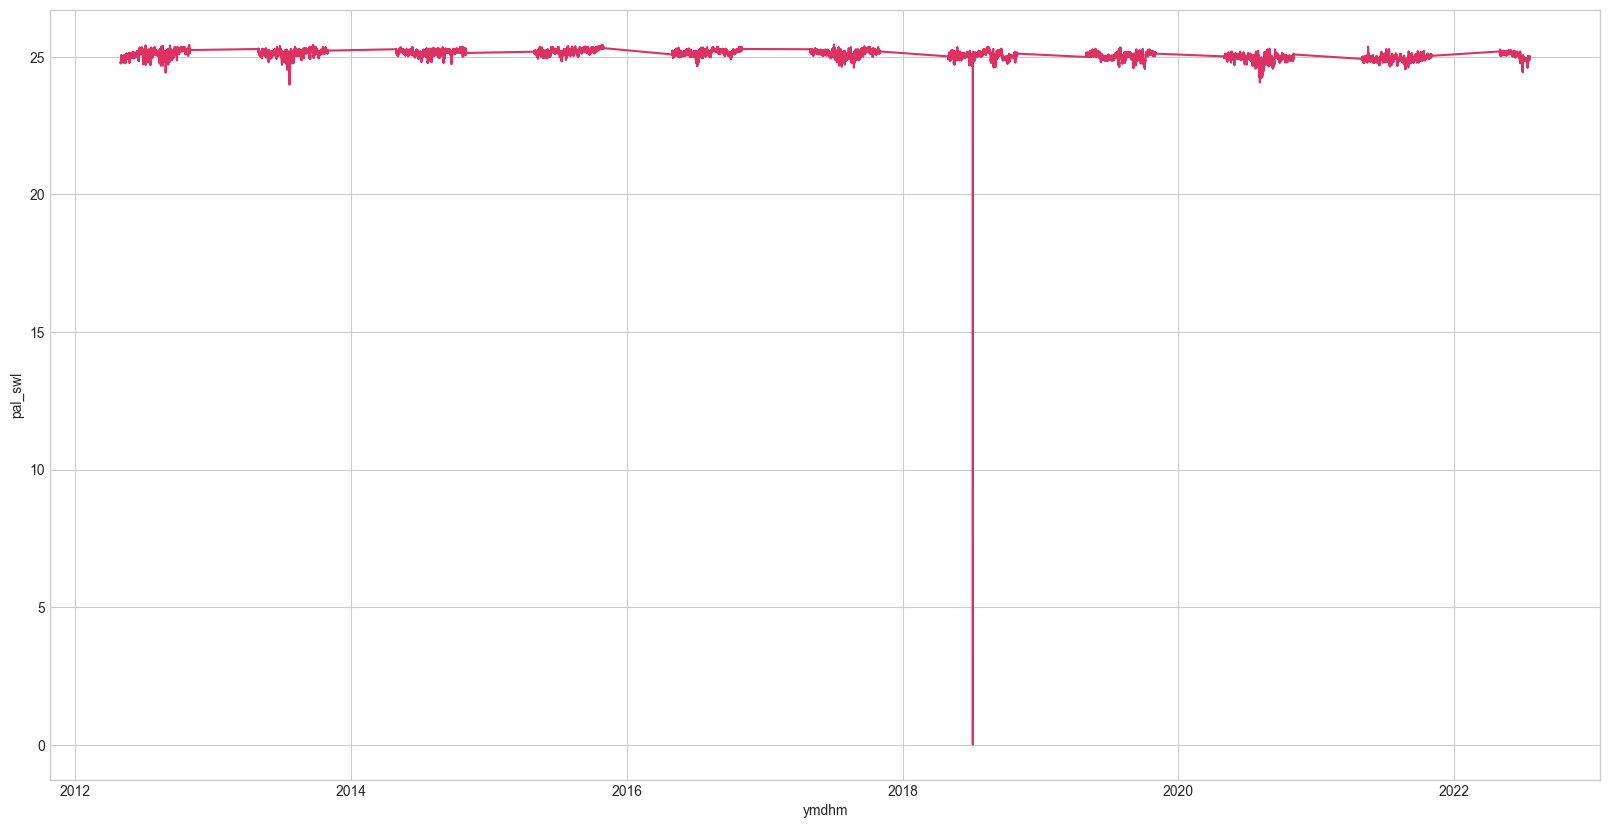

In [16]:
# plotly 그래프 보고싶을만 켜서보는거 추천 
# line_slider(water_df, 'ymdhm', 'pal_swl')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['pal_swl'], ax=ax, color=random.choice(line_color))

In [17]:
# 그래프상 튀는 이유가 데이터값이 0인 데이터 떄문인것으로 확인됨
# 대부분 연속적인 경우보다 비연속적인 경우가 많고 주변데이터와 비교했을때 의아한 데이터인 것으로 확인

water_df[water_df.pal_swl == 0]

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
168436,2018-07-05 16:40:00,0.0,-990.0,-0.01,244.01,-990.0,147.0,369.7,987.08,346.2,349.0,1176.93,330.3,1400.07


In [18]:
# 어짜피 주변 값으로 채워 주어야하니 션하게 0 -> NaN으로 변경
water_df = water_df.replace(0, np.NaN)

In [19]:
water_df[water_df.pal_swl.isnull()]

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
9054,2012-07-02 21:00:00,NaN,NaN,NaN,244.0,NaN,240.0,311.7,476.21,310.2,299.0,1010.22,284.3,652.89
9060,2012-07-02 22:00:00,NaN,NaN,NaN,244.0,NaN,176.0,301.7,407.18,299.2,290.0,326.94,277.3,564.29
9066,2012-07-02 23:00:00,NaN,NaN,NaN,244.0,NaN,122.0,300.7,400.58,294.2,283.0,590.88,266.3,438.33
9072,2012-07-03 00:00:00,NaN,NaN,NaN,244.0,NaN,80.0,295.7,368.42,285.2,277.0,306.19,268.3,460.03
9078,2012-07-03 01:00:00,NaN,NaN,NaN,244.0,NaN,158.0,297.7,381.12,286.2,276.0,184.79,263.3,406.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272217,2022-06-20 09:30:00,NaN,NaN,NaN,NaN,NaN,589.0,NaN,343.69,NaN,NaN,732.92,NaN,438.33
272218,2022-06-20 09:40:00,NaN,NaN,NaN,NaN,NaN,604.0,NaN,302.53,NaN,NaN,749.48,NaN,482.26
272219,2022-06-20 09:50:00,NaN,NaN,NaN,NaN,NaN,616.0,NaN,269.40,NaN,NaN,753.63,NaN,493.58
272220,2022-06-20 10:00:00,NaN,NaN,NaN,NaN,NaN,627.0,NaN,264.07,NaN,NaN,687.37,NaN,493.58


In [20]:
# 주변값으로 채우면될것으로 판단
water_df_pal_swl =  water_df.loc[:, ['ymdhm','pal_swl']]
water_df_pal_swl[9054:9090]

,ymdhm,pal_swl
9054,2012-07-02 21:00:00,NaN
9055,2012-07-02 21:10:00,25.199
9056,2012-07-02 21:20:00,25.210
9057,2012-07-02 21:30:00,25.210
9058,2012-07-02 21:40:00,25.210
9059,2012-07-02 21:50:00,25.210
9060,2012-07-02 22:00:00,NaN
9061,2012-07-02 22:10:00,25.219
9062,2012-07-02 22:20:00,25.218
9063,2012-07-02 22:30:00,25.219


In [21]:
water_df_pal_swl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ymdhm    276336 non-null  datetime64[ns]
 1   pal_swl  275510 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


In [22]:
#결측치 채우기
water_df_pal_swl = water_df_pal_swl.set_index('ymdhm')
water_df_pal_swl = water_df_pal_swl.interpolate(method = 'time')
water_df_pal_swl.reset_index(drop = False, inplace = True)
water_df_pal_swl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ymdhm    276336 non-null  datetime64[ns]
 1   pal_swl  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='pal_swl'>

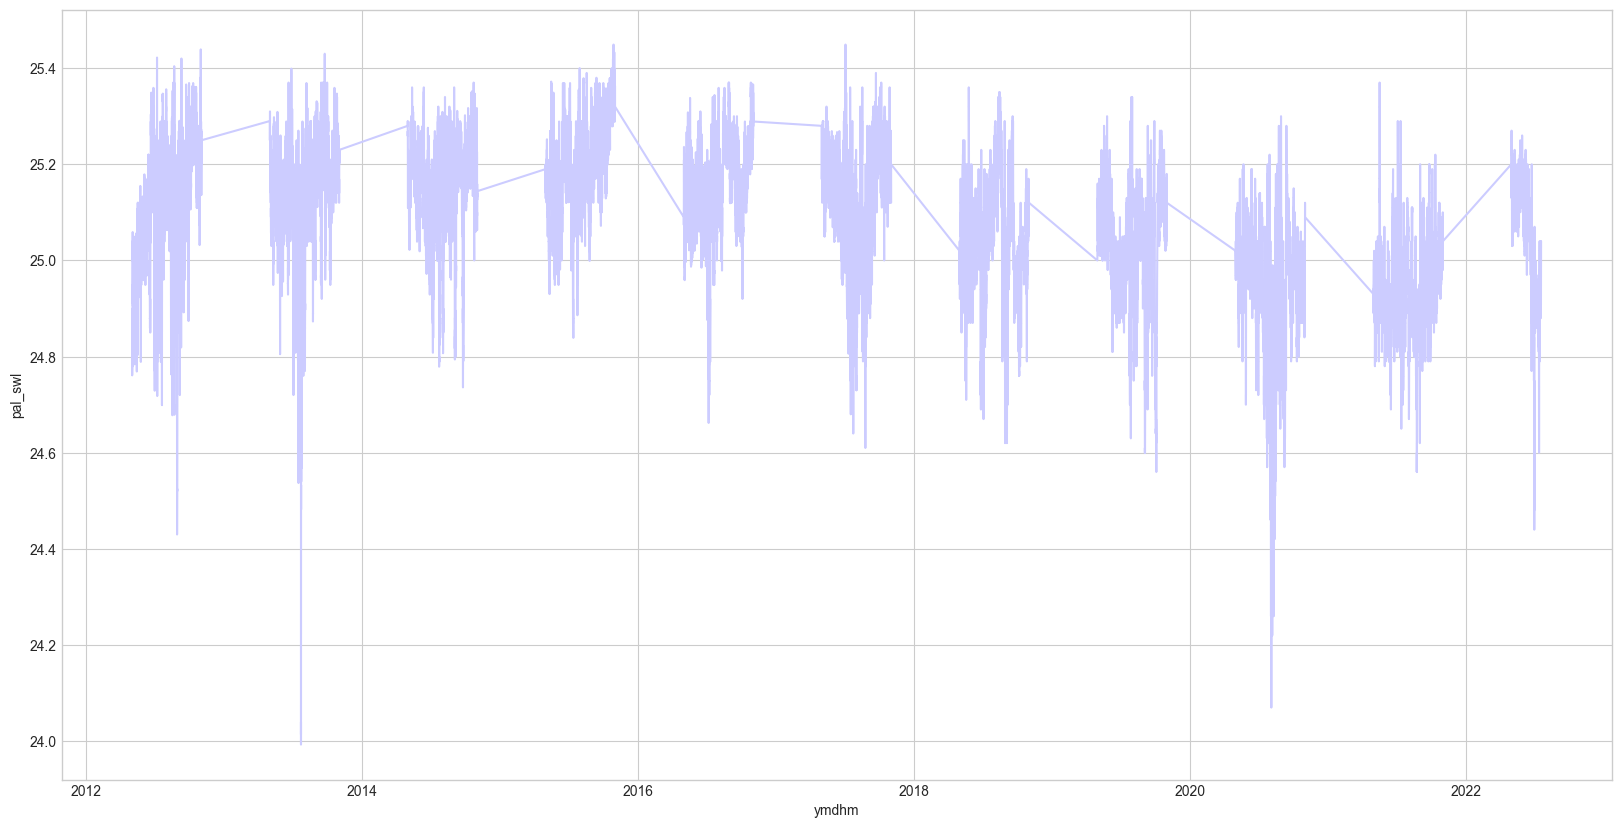

In [23]:
#결측치 처리후 그래프 확인
# line_slider(water_df_pal_swl, 'ymdhm', 'pal_swl')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_pal_swl['ymdhm'], y=water_df_pal_swl['pal_swl'], ax=ax, color=random.choice(line_color))

#### 팔당댐 유입량

<AxesSubplot:xlabel='ymdhm', ylabel='pal_inf'>

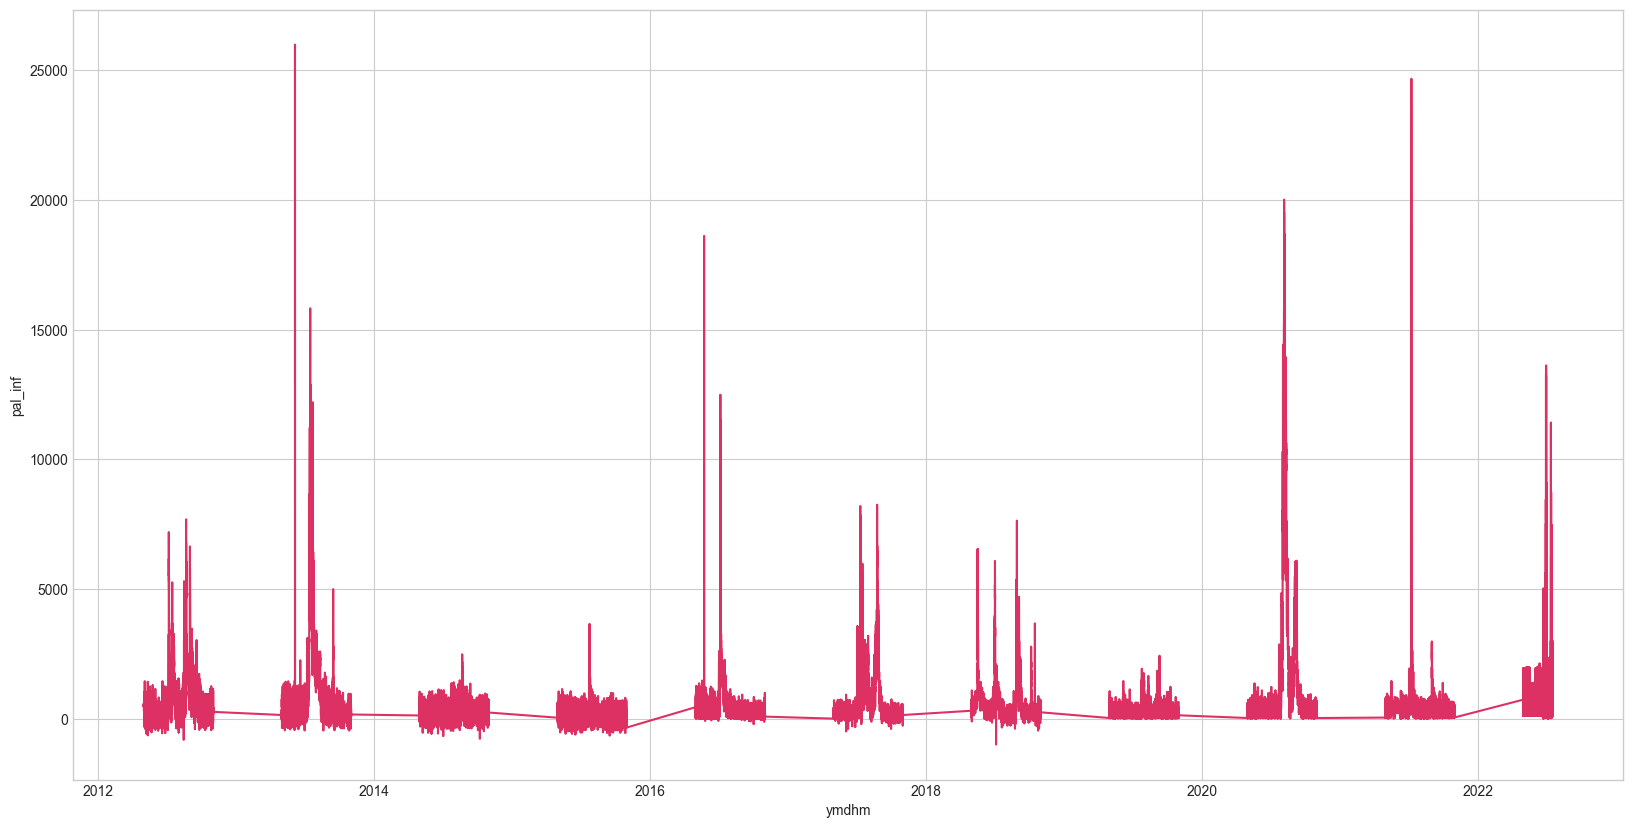

In [24]:
# 결측치 처리전 그래프
# line_slider(water_df, 'ymdhm', 'pal_inf')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['pal_inf'], ax=ax, color=random.choice(line_color))

In [25]:
water_df_pal_inf = water_df.loc[:, ['ymdhm','pal_inf']]
water_df[water_df.pal_inf.isnull()]
# 띄엄띄엄 Nan 값이 있음

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
1824,2012-05-13 16:00:00,24.810,NaN,219.41,24.59,394.00,NaN,304.7,427.30,294.2,283.0,969.83,260.3,376.45
2797,2012-05-20 10:10:00,24.999,NaN,225.97,18.03,NaN,269.0,320.7,543.10,307.2,299.0,863.45,283.3,639.83
2803,2012-05-20 11:10:00,24.990,NaN,225.66,18.34,NaN,203.0,306.7,441.00,296.2,285.0,245.35,276.3,552.17
2804,2012-05-20 11:20:00,24.993,NaN,225.76,18.24,NaN,193.0,306.7,441.00,296.2,285.0,284.51,273.3,516.61
9054,2012-07-02 21:00:00,NaN,NaN,NaN,244.00,NaN,240.0,311.7,476.21,310.2,299.0,1010.22,284.3,652.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276263,2022-07-18 11:50:00,24.880,NaN,207.08,36.92,477.31,495.0,NaN,1991.00,NaN,NaN,-740.23,NaN,2949.74
276269,2022-07-18 12:50:00,24.880,NaN,207.08,36.92,359.87,389.0,NaN,2006.02,NaN,NaN,1580.58,NaN,2700.37
276276,2022-07-18 14:00:00,24.880,NaN,207.08,36.92,255.21,291.0,NaN,1277.94,NaN,NaN,1293.87,NaN,2210.76
276278,2022-07-18 14:20:00,24.880,NaN,207.08,36.92,262.41,266.0,NaN,1172.89,NaN,NaN,1030.25,NaN,2019.53


In [26]:
water_df_pal_inf.describe()

,pal_inf
count,265471.000000
mean,570.135478
std,1128.008563
min,-990.000000
25%,132.200000
50%,260.000000
75%,544.000000
max,25991.500000


In [27]:
# 큰수중 튀는 값이있는 지확인 
water_df_pal_inf[water_df_pal_inf.pal_inf > 18000]


,ymdhm,pal_inf
31595,2013-06-05 09:50:00,25991.50
109249,2016-05-23 16:10:00,18615.26
225989,2020-08-06 08:50:00,18380.00
225990,2020-08-06 09:00:00,19481.00
225991,2020-08-06 09:10:00,19516.00
225998,2020-08-06 10:20:00,18956.00
225999,2020-08-06 10:30:00,19262.00
226000,2020-08-06 10:40:00,18895.00
226001,2020-08-06 10:50:00,19904.00
226002,2020-08-06 11:00:00,20015.00


In [28]:
water_df_pal_inf.loc[31592:31597]

,ymdhm,pal_inf
31592,2013-06-05 09:20:00,665.6
31593,2013-06-05 09:30:00,745.3
31594,2013-06-05 09:40:00,852.0
31595,2013-06-05 09:50:00,25991.5
31596,2013-06-05 10:00:00,656.0
31597,2013-06-05 10:10:00,557.8


In [29]:
water_df_pal_inf.loc[109246:109251]

,ymdhm,pal_inf
109246,2016-05-23 15:40:00,158.08
109247,2016-05-23 15:50:00,NaN
109248,2016-05-23 16:00:00,356.00
109249,2016-05-23 16:10:00,18615.26
109250,2016-05-23 16:20:00,262.59
109251,2016-05-23 16:30:00,262.58


In [30]:
water_df_pal_inf.loc[248468:248472]

,ymdhm,pal_inf
248468,2021-07-09 11:20:00,1158.0
248469,2021-07-09 11:30:00,1158.0
248470,2021-07-09 11:40:00,24675.0
248471,2021-07-09 11:50:00,804.0
248472,2021-07-09 12:00:00,1401.0


In [31]:
# 25991.5, 18615.26,24675.0 -> NaN으로 변경
water_df_pal_inf.pal_inf.at[31595] = np.NaN
water_df_pal_inf.pal_inf.at[109249] = np.NaN
water_df_pal_inf.pal_inf.at[248470] = np.NaN



In [32]:
# 결측치 채우기 
water_df_pal_inf = water_df_pal_inf.set_index('ymdhm')
water_df_pal_inf = water_df_pal_inf.interpolate(method='time')
water_df_pal_inf.reset_index(drop = False, inplace = True)
water_df_pal_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ymdhm    276336 non-null  datetime64[ns]
 1   pal_inf  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


In [33]:
# - 990 튀는값있음
water_df_pal_inf.loc[168433:168439]

,ymdhm,pal_inf
168433,2018-07-05 16:10:00,958.0
168434,2018-07-05 16:20:00,958.0
168435,2018-07-05 16:30:00,1036.0
168436,2018-07-05 16:40:00,-990.0
168437,2018-07-05 16:50:00,1190.0
168438,2018-07-05 17:00:00,1190.0
168439,2018-07-05 17:10:00,1193.0


In [34]:
# 양수로 변경
water_df_pal_inf.pal_inf.at[168436] = 990


In [35]:
#팔당댐 유립량에 음수가 있음, 수문열러서 내보내느라 나가는게 더많을떄인가? 모델 돌리기 전에 어떻게 처리할지 고려해야함
water_df_pal_inf[water_df_pal_inf.pal_inf < 0]

,ymdhm,pal_inf
225,2012-05-02 13:30:00,-26.7
226,2012-05-02 13:40:00,-26.7
227,2012-05-02 13:50:00,-135.5
286,2012-05-02 23:40:00,-34.8
287,2012-05-02 23:50:00,-34.8
...,...,...
185306,2018-10-30 20:20:00,-56.0
185319,2018-10-30 22:30:00,-52.0
185320,2018-10-30 22:40:00,-52.0
185321,2018-10-30 22:50:00,-51.0


<AxesSubplot:xlabel='ymdhm', ylabel='pal_inf'>

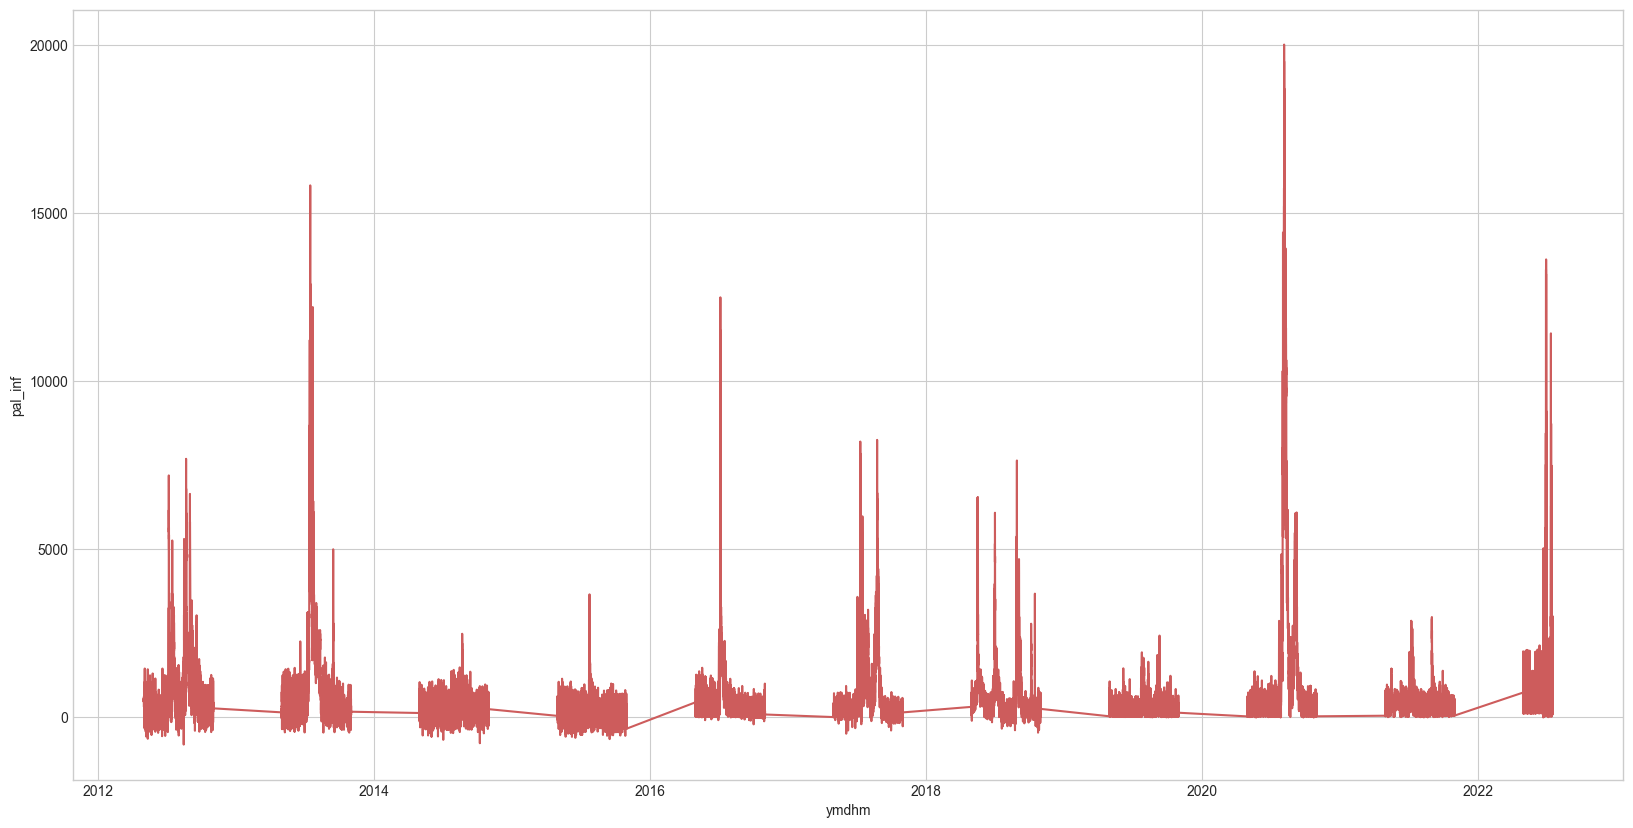

In [36]:
#결측치 처리후 그래프 확인
# line_slider(water_df_pal_inf, 'ymdhm', 'pal_inf')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_pal_inf['ymdhm'], y=water_df_pal_inf['pal_inf'], ax=ax, color=random.choice(line_color))

#### 팔당댐 저수량

<AxesSubplot:xlabel='ymdhm', ylabel='pal_sfw'>

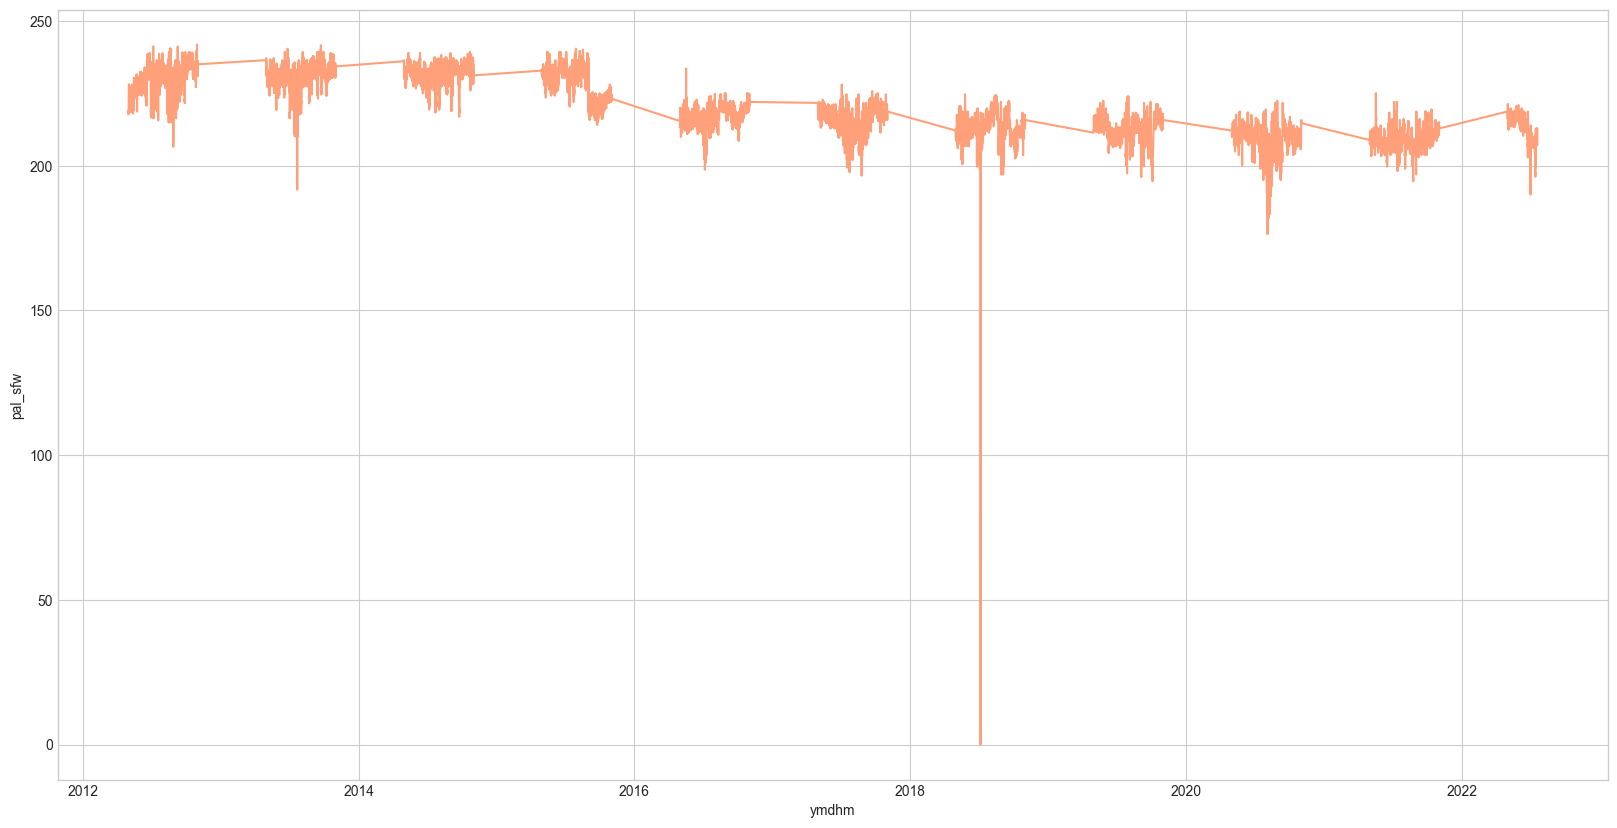

In [37]:
# 결측치 처리 전 그래프
# line_slider(water_df, 'ymdhm', 'pal_sfw')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['pal_sfw'], ax=ax, color=random.choice(line_color))

In [38]:
water_df_pal_sfw = water_df.loc[:, ['ymdhm','pal_sfw']]
water_df_pal_sfw[water_df_pal_sfw.pal_sfw.isnull()]

,ymdhm,pal_sfw
9054,2012-07-02 21:00:00,NaN
9060,2012-07-02 22:00:00,NaN
9066,2012-07-02 23:00:00,NaN
9072,2012-07-03 00:00:00,NaN
9078,2012-07-03 01:00:00,NaN
...,...,...
272217,2022-06-20 09:30:00,NaN
272218,2022-06-20 09:40:00,NaN
272219,2022-06-20 09:50:00,NaN
272220,2022-06-20 10:00:00,NaN


In [39]:

water_df_pal_sfw.describe()

,pal_sfw
count,275511.000000
mean,219.434999
std,9.927986
min,-0.010000
25%,211.770000
50%,217.630000
75%,229.420000
max,241.850000


In [40]:
# 작은수중 튀는 값이있는 지확인 
water_df_pal_sfw[water_df_pal_sfw.pal_sfw < 1]

,ymdhm,pal_sfw
168436,2018-07-05 16:40:00,-0.01


In [41]:
water_df_pal_sfw.loc[168435:168437]

,ymdhm,pal_sfw
168435,2018-07-05 16:30:00,212.14
168436,2018-07-05 16:40:00,-0.01
168437,2018-07-05 16:50:00,211.41


In [42]:
# 저수량 데이터중 이상값인 168436번 데이터-0.01 NaN 값으로 변경
water_df_pal_sfw.at[168436,'pal_sfw'] = np.NAN


In [43]:
# 결측치 채우기 (바로 채워도 문제 없음)
water_df_pal_sfw = water_df_pal_sfw.set_index('ymdhm')
water_df_pal_sfw = water_df_pal_sfw.interpolate(method='time')
water_df_pal_sfw.reset_index(drop = False, inplace = True)
water_df_pal_sfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   ymdhm    276336 non-null  datetime64[ns]
 1   pal_sfw  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='pal_sfw'>

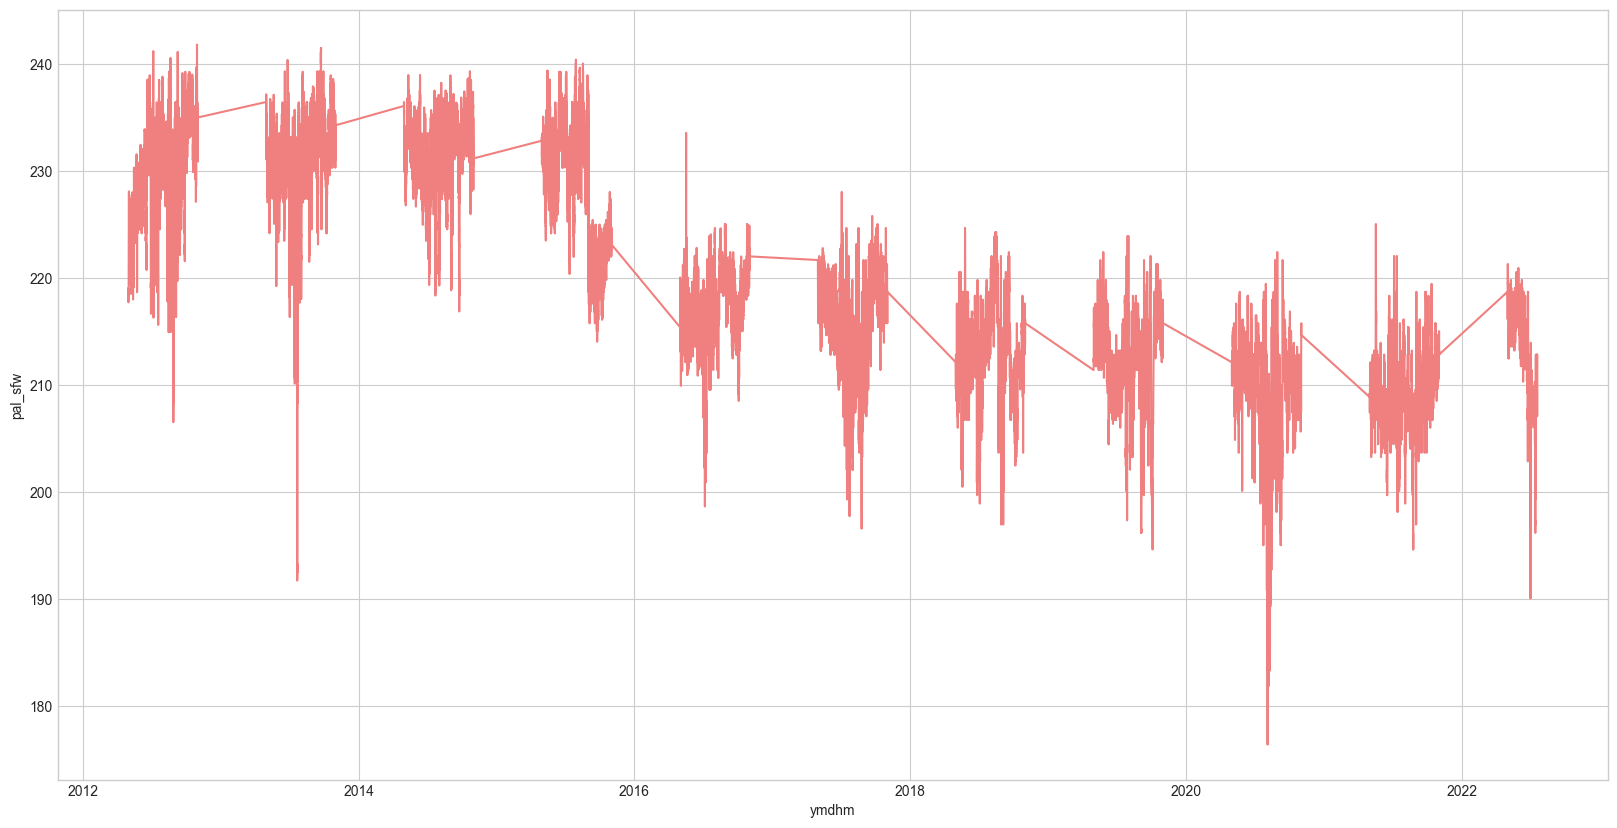

In [44]:
#결측치 처리후 그래프 확인
# line_slider(water_df_pal_sfw, 'ymdhm', 'pal_sfw')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_pal_sfw['ymdhm'], y=water_df_pal_sfw['pal_sfw'], ax=ax, color=random.choice(line_color))

#### 팔당댐 공용량

<AxesSubplot:xlabel='ymdhm', ylabel='pal_ecpc'>

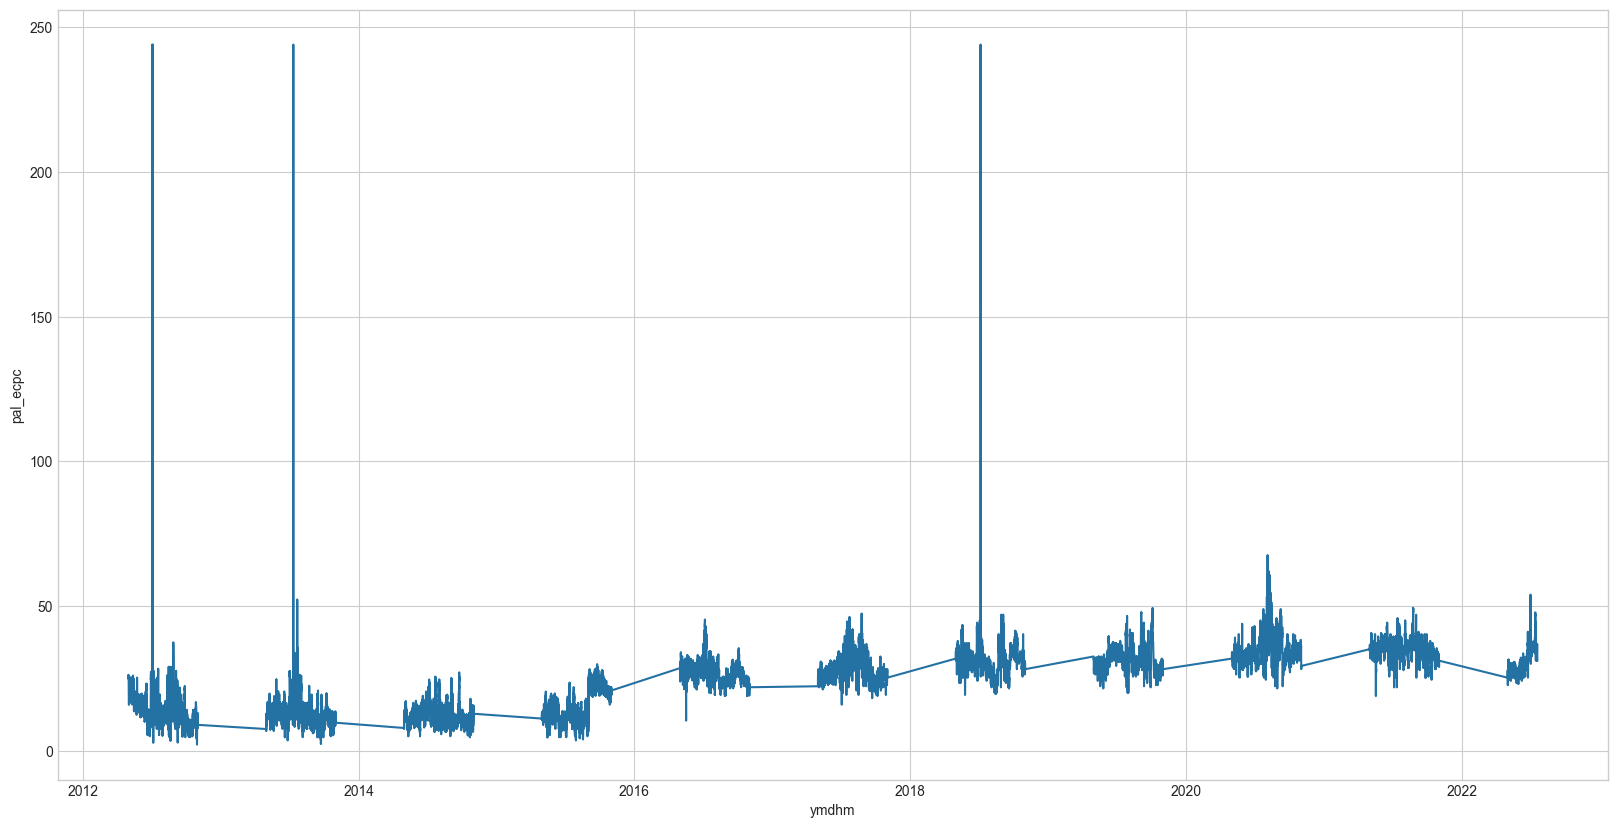

In [45]:
# line_slider(water_df, 'ymdhm', 'pal_ecpc')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['pal_ecpc'], ax=ax, color=random.choice(line_color))

In [46]:
water_df_pal_ecpc =  water_df.loc[:, ['ymdhm','pal_ecpc']]
water_df_pal_ecpc[water_df_pal_ecpc.pal_ecpc.isnull()]


,ymdhm,pal_ecpc
13200,2012-07-31 16:00:00,NaN
68081,2014-08-13 18:50:00,NaN
68083,2014-08-13 19:10:00,NaN
68084,2014-08-13 19:20:00,NaN
68085,2014-08-13 19:30:00,NaN
...,...,...
272217,2022-06-20 09:30:00,NaN
272218,2022-06-20 09:40:00,NaN
272219,2022-06-20 09:50:00,NaN
272220,2022-06-20 10:00:00,NaN


In [47]:
water_df_pal_ecpc.pal_ecpc.describe()

count    275593.000000
mean         24.630877
std          10.623098
min           2.150000
25%          14.600000
50%          26.370000
75%          32.230000
max         244.010000
Name: pal_ecpc, dtype: float64

In [48]:
# 튀는 값 발견 244, 244.01
# pal_ecpc는 팔당 댐의 공용량으로 244값이 어떻게 들어간지는 알 수없으나
# 실제 값은 주변값과 비슷할 것으로 추정
water_df_pal_ecpc[water_df_pal_ecpc.pal_ecpc > 240]


,ymdhm,pal_ecpc
9054,2012-07-02 21:00:00,244.00
9060,2012-07-02 22:00:00,244.00
9066,2012-07-02 23:00:00,244.00
9072,2012-07-03 00:00:00,244.00
9078,2012-07-03 01:00:00,244.00
...,...,...
36888,2013-07-12 04:00:00,244.00
36894,2013-07-12 05:00:00,244.00
36900,2013-07-12 06:00:00,244.00
36906,2013-07-12 07:00:00,244.00


In [49]:
water_df_pal_ecpc.loc[9050:9064]
# 황당해게 튀는 값임을 알 수 있음

,ymdhm,pal_ecpc
9050,2012-07-02 20:20:00,10.42
9051,2012-07-02 20:30:00,10.42
9052,2012-07-02 20:40:00,10.42
9053,2012-07-02 20:50:00,10.55
9054,2012-07-02 21:00:00,244.00
9055,2012-07-02 21:10:00,10.81
9056,2012-07-02 21:20:00,10.42
9057,2012-07-02 21:30:00,10.42
9058,2012-07-02 21:40:00,10.42
9059,2012-07-02 21:50:00,10.42


In [50]:
# 244, 244.01를 Nan 값으로 변경
water_df_pal_ecpc = water_df_pal_ecpc.replace(244, np.NaN)
water_df_pal_ecpc = water_df_pal_ecpc.replace(244.01, np.NaN)
water_df_pal_ecpc[water_df_pal_ecpc.pal_ecpc > 200]


,ymdhm,pal_ecpc


In [51]:
# 결측치 매꾸기
water_df_pal_ecpc = water_df_pal_ecpc.set_index('ymdhm')
water_df_pal_ecpc = water_df_pal_ecpc.interpolate(method='time')
water_df_pal_ecpc.reset_index(drop = False, inplace = True)

<AxesSubplot:xlabel='ymdhm', ylabel='pal_ecpc'>

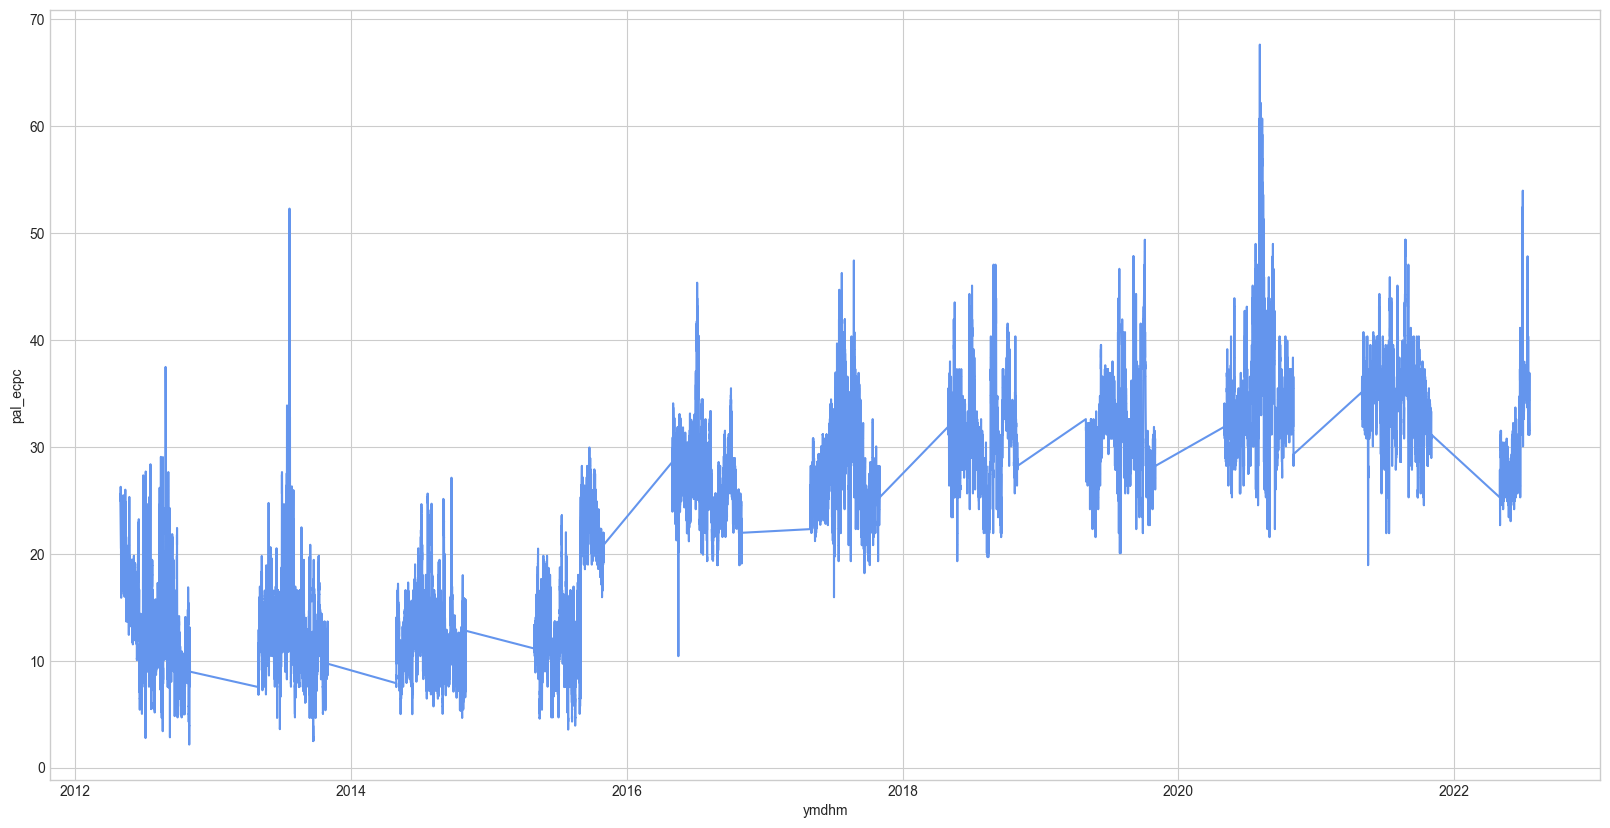

In [52]:
#결측치 처리후 그래프 확인
# line_slider(water_df_pal_ecpc, 'ymdhm', 'pal_ecpc')
# line_slider(water_df, 'ymdhm', 'pal_ecpc')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_pal_ecpc['ymdhm'], y=water_df_pal_ecpc['pal_ecpc'], ax=ax, color=random.choice(line_color))

#### 팔당댐 총 방류량

<AxesSubplot:xlabel='ymdhm', ylabel='pal_tototf'>

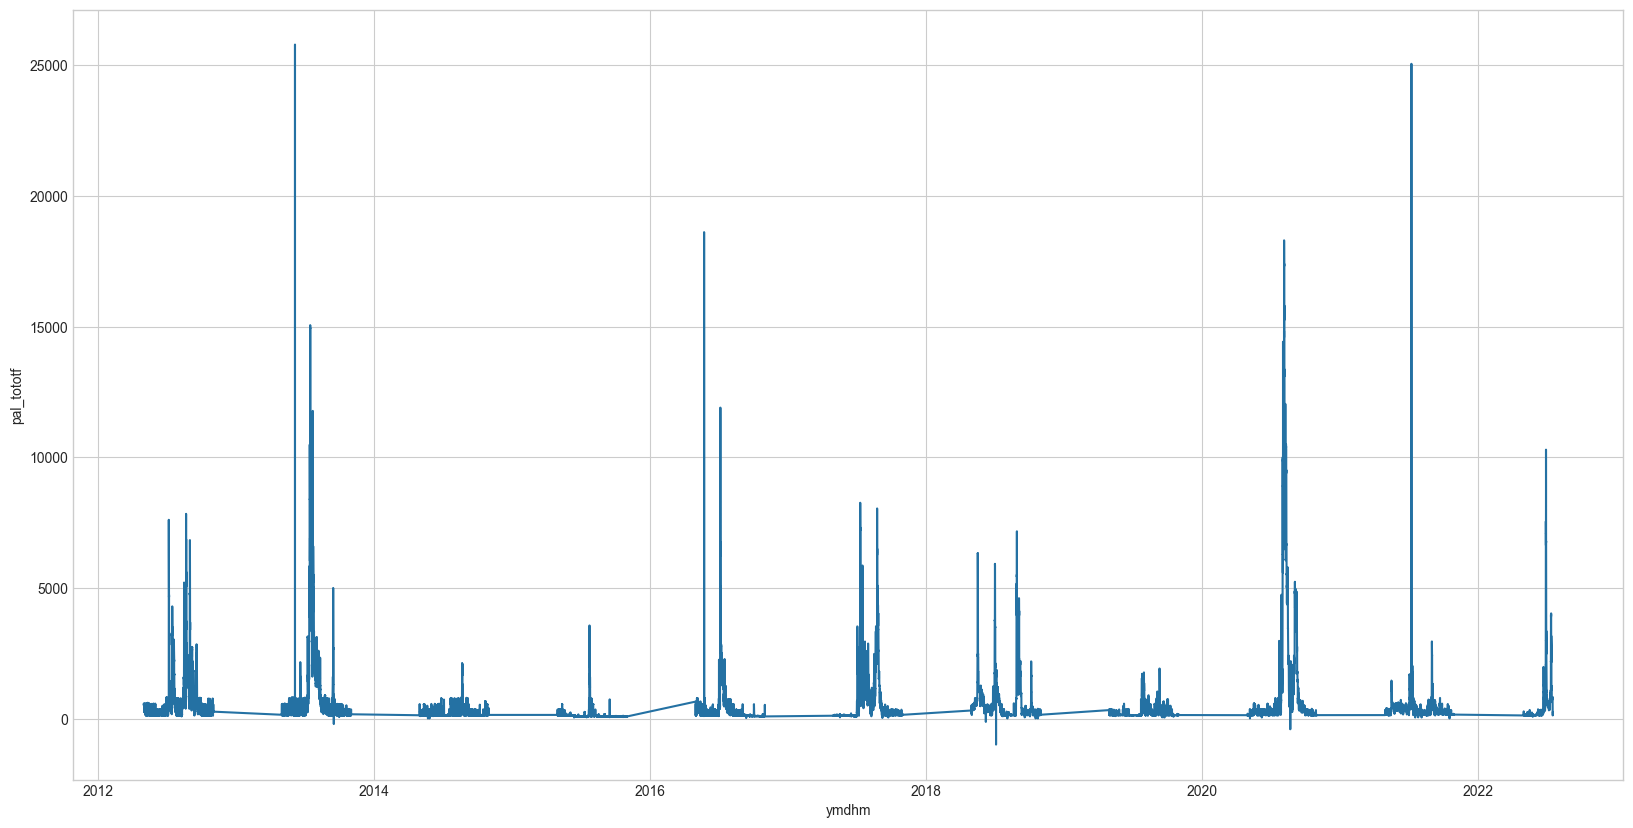

In [53]:
# line_slider(water_df, 'ymdhm', 'pal_tototf')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['pal_tototf'], ax=ax, color=random.choice(line_color))

In [54]:
water_df_pal_tototf =  water_df.loc[:, ['ymdhm','pal_tototf']]
water_df_pal_tototf[water_df_pal_tototf.pal_tototf.isnull()]



,ymdhm,pal_tototf
2791,2012-05-20 09:10:00,NaN
2792,2012-05-20 09:20:00,NaN
2793,2012-05-20 09:30:00,NaN
2794,2012-05-20 09:40:00,NaN
2795,2012-05-20 09:50:00,NaN
...,...,...
272217,2022-06-20 09:30:00,NaN
272218,2022-06-20 09:40:00,NaN
272219,2022-06-20 09:50:00,NaN
272220,2022-06-20 10:00:00,NaN


In [55]:
water_df_pal_tototf.describe()

,pal_tototf
count,275146.000000
mean,543.633435
std,1106.286046
min,-990.000000
25%,132.000000
50%,175.000000
75%,507.207500
max,25791.500000


In [56]:
# NaN 값 특징 살펴보기
water_df_pal_tototf.loc[272210:272257]

,ymdhm,pal_tototf
272210,2022-06-20 08:20:00,167.93
272211,2022-06-20 08:30:00,168.06
272212,2022-06-20 08:40:00,167.98
272213,2022-06-20 08:50:00,156.98
272214,2022-06-20 09:00:00,131.19
272215,2022-06-20 09:10:00,NaN
272216,2022-06-20 09:20:00,NaN
272217,2022-06-20 09:30:00,NaN
272218,2022-06-20 09:40:00,NaN
272219,2022-06-20 09:50:00,NaN


In [57]:
# NaN 값 특징 살펴보기
water_df_pal_tototf.loc[2780:2830]

,ymdhm,pal_tototf
2780,2012-05-20 07:20:00,133.8
2781,2012-05-20 07:30:00,139.9
2782,2012-05-20 07:40:00,139.9
2783,2012-05-20 07:50:00,133.9
2784,2012-05-20 08:00:00,134.0
2785,2012-05-20 08:10:00,176.7
2786,2012-05-20 08:20:00,176.8
2787,2012-05-20 08:30:00,177.2
2788,2012-05-20 08:40:00,177.2
2789,2012-05-20 08:50:00,177.3


In [58]:
# 튀는 값(-마이너스 값) 발견
water_df_pal_tototf[water_df_pal_tototf.pal_tototf < 0]

,ymdhm,pal_tototf
46396,2013-09-16 04:40:00,-203.8
164544,2018-06-08 16:00:00,-122.0
168436,2018-07-05 16:40:00,-990.0
228353,2020-08-22 18:50:00,-404.0
228354,2020-08-22 19:00:00,-222.0


In [59]:
# 특이삾(아미너스)이 Nan값과 붙어있음,
#난 주변값 110, 449 도 주변 데이터에 비해 이상해보임
# 더큰 범위에서 보면 방류량이 점점 늘고있는 상황으로 보임
# water_df_pal_tototf.loc[228300:228430] # 넓은 범위
water_df_pal_tototf.loc[228351:228368]

,ymdhm,pal_tototf
228351,2020-08-22 18:30:00,701.0
228352,2020-08-22 18:40:00,708.0
228353,2020-08-22 18:50:00,-404.0
228354,2020-08-22 19:00:00,-222.0
228355,2020-08-22 19:10:00,NaN
228356,2020-08-22 19:20:00,NaN
228357,2020-08-22 19:30:00,NaN
228358,2020-08-22 19:40:00,NaN
228359,2020-08-22 19:50:00,NaN
228360,2020-08-22 20:00:00,NaN


In [60]:
# -404, -222, 110,449 -> Nan으로 변경
water_df_pal_tototf.pal_tototf.at[228353] = np.NaN
water_df_pal_tototf.pal_tototf.at[228354] = np.NaN
water_df_pal_tototf.pal_tototf.at[228361] = np.NaN
water_df_pal_tototf.pal_tototf.at[228362] = np.NaN
water_df_pal_tototf.loc[228351:228368]

,ymdhm,pal_tototf
228351,2020-08-22 18:30:00,701.0
228352,2020-08-22 18:40:00,708.0
228353,2020-08-22 18:50:00,NaN
228354,2020-08-22 19:00:00,NaN
228355,2020-08-22 19:10:00,NaN
228356,2020-08-22 19:20:00,NaN
228357,2020-08-22 19:30:00,NaN
228358,2020-08-22 19:40:00,NaN
228359,2020-08-22 19:50:00,NaN
228360,2020-08-22 20:00:00,NaN


In [61]:
# 뎅~한 값
water_df_pal_tototf.loc[164542:164546]

,ymdhm,pal_tototf
164542,2018-06-08 15:40:00,314.0
164543,2018-06-08 15:50:00,308.0
164544,2018-06-08 16:00:00,-122.0
164545,2018-06-08 16:10:00,372.0
164546,2018-06-08 16:20:00,258.0


In [62]:
# 특별히 고려해야할 사항 없음, Nan 으로 변경 
water_df_pal_tototf = water_df_pal_tototf.replace(-122., np.NaN)
water_df_pal_tototf.loc[164540:164554]

,ymdhm,pal_tototf
164540,2018-06-08 15:20:00,314.0
164541,2018-06-08 15:30:00,314.0
164542,2018-06-08 15:40:00,314.0
164543,2018-06-08 15:50:00,308.0
164544,2018-06-08 16:00:00,NaN
164545,2018-06-08 16:10:00,372.0
164546,2018-06-08 16:20:00,258.0
164547,2018-06-08 16:30:00,258.0
164548,2018-06-08 16:40:00,253.0
164549,2018-06-08 16:50:00,257.0


In [63]:
# 뎅한값 2
water_df_pal_tototf.loc[46394:46398]

,ymdhm,pal_tototf
46394,2013-09-16 04:20:00,894.0
46395,2013-09-16 04:30:00,931.6
46396,2013-09-16 04:40:00,-203.8
46397,2013-09-16 04:50:00,880.1
46398,2013-09-16 05:00:00,820.0


In [64]:
# 특별히 고려해야할 사항 없음, Nan 으로 변경 
water_df_pal_tototf = water_df_pal_tototf.replace(-203.8, np.NaN)
water_df_pal_tototf.loc[46394:46398]

,ymdhm,pal_tototf
46394,2013-09-16 04:20:00,894.0
46395,2013-09-16 04:30:00,931.6
46396,2013-09-16 04:40:00,NaN
46397,2013-09-16 04:50:00,880.1
46398,2013-09-16 05:00:00,820.0


In [65]:
# 큰수도 한번보자~
water_df_pal_tototf[water_df_pal_tototf.pal_tototf > 20000]
# 딱걸렸네

,ymdhm,pal_tototf
31595,2013-06-05 09:50:00,25791.5
248470,2021-07-09 11:40:00,25056.0


In [66]:
# 잡았다 요놈
water_df_pal_tototf.loc[31593:31597]

,ymdhm,pal_tototf
31593,2013-06-05 09:30:00,545.3
31594,2013-06-05 09:40:00,552.0
31595,2013-06-05 09:50:00,25791.5
31596,2013-06-05 10:00:00,456.0
31597,2013-06-05 10:10:00,557.8


In [67]:
# 바꾸자아
water_df_pal_tototf = water_df_pal_tototf.replace(25791.5, np.NaN)
water_df_pal_tototf.loc[31593:31597]

,ymdhm,pal_tototf
31593,2013-06-05 09:30:00,545.3
31594,2013-06-05 09:40:00,552.0
31595,2013-06-05 09:50:00,NaN
31596,2013-06-05 10:00:00,456.0
31597,2013-06-05 10:10:00,557.8


In [68]:
# 너도 잡았다 
water_df_pal_tototf.loc[248468:248472]

,ymdhm,pal_tototf
248468,2021-07-09 11:20:00,1655.0
248469,2021-07-09 11:30:00,1655.0
248470,2021-07-09 11:40:00,25056.0
248471,2021-07-09 11:50:00,1003.0
248472,2021-07-09 12:00:00,1002.0


In [69]:
# 바꾸자아
water_df_pal_tototf = water_df_pal_tototf.replace(25056.0, np.NaN)
water_df_pal_tototf.loc[248468:248472]

,ymdhm,pal_tototf
248468,2021-07-09 11:20:00,1655.0
248469,2021-07-09 11:30:00,1655.0
248470,2021-07-09 11:40:00,NaN
248471,2021-07-09 11:50:00,1003.0
248472,2021-07-09 12:00:00,1002.0


In [70]:
# 작은수도 보자~
water_df_pal_tototf[water_df_pal_tototf.pal_tototf < 50]
# water_df_pal_tototf[(water_df_pal_tototf.pal_tototf < 50) & (water_df_pal_tototf.pal_tototf > 30) ]

# 쎄에에에해...

,ymdhm,pal_tototf
56226,2014-05-23 11:00:00,9.0
56826,2014-05-27 15:00:00,9.0
85866,2015-06-14 07:00:00,46.0
125298,2016-09-12 03:00:00,25.0
151164,2017-09-07 18:00:00,29.0
153417,2017-09-23 09:30:00,46.0
168436,2018-07-05 16:40:00,-990.0
172756,2018-08-04 16:40:00,9.0
183528,2018-10-18 12:00:00,9.0
184087,2018-10-22 09:10:00,47.0


In [71]:
# -990 먼지 좀 보자아
water_df_pal_tototf.loc[168433:168439]

,ymdhm,pal_tototf
168433,2018-07-05 16:10:00,1059.0
168434,2018-07-05 16:20:00,1059.0
168435,2018-07-05 16:30:00,935.0
168436,2018-07-05 16:40:00,-990.0
168437,2018-07-05 16:50:00,1190.0
168438,2018-07-05 17:00:00,1190.0
168439,2018-07-05 17:10:00,1193.0


In [72]:
#   990으로 바꾸자아
water_df_pal_tototf = water_df_pal_tototf.replace(-990.0, 990)
water_df_pal_tototf.loc[168434:168438]

,ymdhm,pal_tototf
168434,2018-07-05 16:20:00,1059.0
168435,2018-07-05 16:30:00,935.0
168436,2018-07-05 16:40:00,990.0
168437,2018-07-05 16:50:00,1190.0
168438,2018-07-05 17:00:00,1190.0


In [73]:
water_df_pal_tototf.loc[56210:56236]
# .... 쌔하다...

,ymdhm,pal_tototf
56210,2014-05-23 08:20:00,132.9
56211,2014-05-23 08:30:00,133.0
56212,2014-05-23 08:40:00,133.1
56213,2014-05-23 08:50:00,133.1
56214,2014-05-23 09:00:00,127.0
56215,2014-05-23 09:10:00,133.1
56216,2014-05-23 09:20:00,133.1
56217,2014-05-23 09:30:00,133.1
56218,2014-05-23 09:40:00,133.1
56219,2014-05-23 09:50:00,133.1


In [74]:
water_df_pal_tototf.pal_tototf.at[56226] = np.NaN
water_df_pal_tototf.loc[56225:56227]

,ymdhm,pal_tototf
56225,2014-05-23 10:50:00,NaN
56226,2014-05-23 11:00:00,NaN
56227,2014-05-23 11:10:00,169.3


In [75]:
water_df_pal_tototf.loc[56810:56836]
#... 아오?

,ymdhm,pal_tototf
56810,2014-05-27 12:20:00,175.8
56811,2014-05-27 12:30:00,175.9
56812,2014-05-27 12:40:00,175.9
56813,2014-05-27 12:50:00,176.1
56814,2014-05-27 13:00:00,176.0
56815,2014-05-27 13:10:00,176.1
56816,2014-05-27 13:20:00,170.1
56817,2014-05-27 13:30:00,170.1
56818,2014-05-27 13:40:00,176.3
56819,2014-05-27 13:50:00,170.3


In [76]:
water_df_pal_tototf.pal_tototf.at[56826] = np.NaN
water_df_pal_tototf.loc[56825:56827]

,ymdhm,pal_tototf
56825,2014-05-27 14:50:00,NaN
56826,2014-05-27 15:00:00,NaN
56827,2014-05-27 15:10:00,347.0


In [77]:
water_df_pal_tototf.loc[125290:125318]
#... 이건그나마...

,ymdhm,pal_tototf
125290,2016-09-12 01:40:00,125.71
125291,2016-09-12 01:50:00,125.71
125292,2016-09-12 02:00:00,126.00
125293,2016-09-12 02:10:00,NaN
125294,2016-09-12 02:20:00,NaN
125295,2016-09-12 02:30:00,NaN
125296,2016-09-12 02:40:00,NaN
125297,2016-09-12 02:50:00,NaN
125298,2016-09-12 03:00:00,25.00
125299,2016-09-12 03:10:00,120.00


In [78]:
water_df_pal_tototf.pal_tototf.at[125298] = np.NaN
water_df_pal_tototf.loc[125297:125299]

,ymdhm,pal_tototf
125297,2016-09-12 02:50:00,NaN
125298,2016-09-12 03:00:00,NaN
125299,2016-09-12 03:10:00,120.0


In [79]:
water_df_pal_tototf.loc[151155:151180]
#닫았다가 방류하는건아닌거 같은디??

,ymdhm,pal_tototf
151155,2017-09-07 16:30:00,132.0
151156,2017-09-07 16:40:00,132.0
151157,2017-09-07 16:50:00,132.0
151158,2017-09-07 17:00:00,132.0
151159,2017-09-07 17:10:00,132.0
151160,2017-09-07 17:20:00,132.0
151161,2017-09-07 17:30:00,132.0
151162,2017-09-07 17:40:00,132.0
151163,2017-09-07 17:50:00,132.0
151164,2017-09-07 18:00:00,29.0


In [80]:
water_df_pal_tototf.pal_tototf.at[151164] = np.NaN
water_df_pal_tototf.loc[151162:151166]

,ymdhm,pal_tototf
151162,2017-09-07 17:40:00,132.0
151163,2017-09-07 17:50:00,132.0
151164,2017-09-07 18:00:00,NaN
151165,2017-09-07 18:10:00,302.0
151166,2017-09-07 18:20:00,368.0


In [81]:
water_df_pal_tototf.loc[212970:212987]
# 두개 잡았다...

,ymdhm,pal_tototf
212970,2020-05-07 23:00:00,285.0
212971,2020-05-07 23:10:00,285.0
212972,2020-05-07 23:20:00,285.0
212973,2020-05-07 23:30:00,285.0
212974,2020-05-07 23:40:00,285.0
212975,2020-05-07 23:50:00,285.0
212976,2020-05-08 00:00:00,266.0
212977,2020-05-08 00:10:00,10.0
212978,2020-05-08 00:20:00,NaN
212979,2020-05-08 00:30:00,NaN


In [82]:
water_df_pal_tototf.pal_tototf.at[212977] = np.NaN
water_df_pal_tototf.pal_tototf.at[212980] = np.NaN

water_df_pal_tototf.loc[212976:212981]

,ymdhm,pal_tototf
212976,2020-05-08 00:00:00,266.0
212977,2020-05-08 00:10:00,NaN
212978,2020-05-08 00:20:00,NaN
212979,2020-05-08 00:30:00,NaN
212980,2020-05-08 00:40:00,NaN
212981,2020-05-08 00:50:00,154.0


In [83]:
water_df_pal_tototf.loc[262994:263013]


,ymdhm,pal_tototf
262994,2021-10-18 08:20:00,164.0
262995,2021-10-18 08:30:00,164.0
262996,2021-10-18 08:40:00,164.0
262997,2021-10-18 08:50:00,164.0
262998,2021-10-18 09:00:00,158.0
262999,2021-10-18 09:10:00,10.0
263000,2021-10-18 09:20:00,NaN
263001,2021-10-18 09:30:00,NaN
263002,2021-10-18 09:40:00,NaN
263003,2021-10-18 09:50:00,NaN


In [84]:
water_df_pal_tototf.pal_tototf.at[262999] = np.NaN

water_df_pal_tototf.loc[262997:263002]

,ymdhm,pal_tototf
262997,2021-10-18 08:50:00,164.0
262998,2021-10-18 09:00:00,158.0
262999,2021-10-18 09:10:00,NaN
263000,2021-10-18 09:20:00,NaN
263001,2021-10-18 09:30:00,NaN
263002,2021-10-18 09:40:00,NaN


In [85]:
water_df_pal_tototf.loc[85860:85876]
#.. 크으..

,ymdhm,pal_tototf
85860,2015-06-14 06:00:00,121.0
85861,2015-06-14 06:10:00,121.2
85862,2015-06-14 06:20:00,NaN
85863,2015-06-14 06:30:00,NaN
85864,2015-06-14 06:40:00,NaN
85865,2015-06-14 06:50:00,NaN
85866,2015-06-14 07:00:00,46.0
85867,2015-06-14 07:10:00,NaN
85868,2015-06-14 07:20:00,127.4
85869,2015-06-14 07:30:00,127.4


In [86]:
water_df_pal_tototf.pal_tototf.at[85866] = np.NaN

water_df_pal_tototf.loc[85861:85868]

,ymdhm,pal_tototf
85861,2015-06-14 06:10:00,121.2
85862,2015-06-14 06:20:00,NaN
85863,2015-06-14 06:30:00,NaN
85864,2015-06-14 06:40:00,NaN
85865,2015-06-14 06:50:00,NaN
85866,2015-06-14 07:00:00,NaN
85867,2015-06-14 07:10:00,NaN
85868,2015-06-14 07:20:00,127.4


In [87]:
water_df_pal_tototf.loc[153410:153427]
#오...두개...

,ymdhm,pal_tototf
153410,2017-09-23 08:20:00,144.0
153411,2017-09-23 08:30:00,144.0
153412,2017-09-23 08:40:00,144.0
153413,2017-09-23 08:50:00,144.0
153414,2017-09-23 09:00:00,144.0
153415,2017-09-23 09:10:00,144.0
153416,2017-09-23 09:20:00,115.0
153417,2017-09-23 09:30:00,46.0
153418,2017-09-23 09:40:00,93.0
153419,2017-09-23 09:50:00,144.0


In [88]:
water_df_pal_tototf.pal_tototf.at[153417] = np.NaN
water_df_pal_tototf.pal_tototf.at[153418] = np.NaN

water_df_pal_tototf.loc[153415:153420]

,ymdhm,pal_tototf
153415,2017-09-23 09:10:00,144.0
153416,2017-09-23 09:20:00,115.0
153417,2017-09-23 09:30:00,NaN
153418,2017-09-23 09:40:00,NaN
153419,2017-09-23 09:50:00,144.0
153420,2017-09-23 10:00:00,144.0


In [89]:
water_df_pal_tototf.loc[184084:184103]
# 여기도 두개

,ymdhm,pal_tototf
184084,2018-10-22 08:40:00,165.0
184085,2018-10-22 08:50:00,165.0
184086,2018-10-22 09:00:00,165.0
184087,2018-10-22 09:10:00,47.0
184088,2018-10-22 09:20:00,NaN
184089,2018-10-22 09:30:00,NaN
184090,2018-10-22 09:40:00,NaN
184091,2018-10-22 09:50:00,NaN
184092,2018-10-22 10:00:00,NaN
184093,2018-10-22 10:10:00,NaN


In [90]:
water_df_pal_tototf.pal_tototf.at[184087] = np.NaN
water_df_pal_tototf.pal_tototf.at[184100] = np.NaN


In [91]:
water_df_pal_tototf.loc[206590:206596]
#..두개...

,ymdhm,pal_tototf
206590,2019-09-24 15:40:00,153.0
206591,2019-09-24 15:50:00,122.0
206592,2019-09-24 16:00:00,47.0
206593,2019-09-24 16:10:00,46.0
206594,2019-09-24 16:20:00,110.0
206595,2019-09-24 16:30:00,134.0
206596,2019-09-24 16:40:00,222.0


In [92]:
water_df_pal_tototf.pal_tototf.at[206592] = np.NaN
water_df_pal_tototf.pal_tototf.at[206593] = np.NaN

water_df_pal_tototf.loc[206590:206596]

,ymdhm,pal_tototf
206590,2019-09-24 15:40:00,153.0
206591,2019-09-24 15:50:00,122.0
206592,2019-09-24 16:00:00,NaN
206593,2019-09-24 16:10:00,NaN
206594,2019-09-24 16:20:00,110.0
206595,2019-09-24 16:30:00,134.0
206596,2019-09-24 16:40:00,222.0


In [93]:
water_df_pal_tototf.loc[217489:217530]


,ymdhm,pal_tototf
217489,2020-06-08 08:10:00,180.0
217490,2020-06-08 08:20:00,180.0
217491,2020-06-08 08:30:00,180.0
217492,2020-06-08 08:40:00,180.0
217493,2020-06-08 08:50:00,180.0
217494,2020-06-08 09:00:00,180.0
217495,2020-06-08 09:10:00,180.0
217496,2020-06-08 09:20:00,180.0
217497,2020-06-08 09:30:00,180.0
217498,2020-06-08 09:40:00,180.0


In [94]:
water_df_pal_tototf.pal_tototf.at[217499] = np.NaN


In [95]:
water_df_pal_tototf.loc[249906:249914]
#두개... 수문을 바꾸는건가???

,ymdhm,pal_tototf
249906,2021-07-19 11:00:00,132.0
249907,2021-07-19 11:10:00,132.0
249908,2021-07-19 11:20:00,132.0
249909,2021-07-19 11:30:00,87.0
249910,2021-07-19 11:40:00,47.0
249911,2021-07-19 11:50:00,120.0
249912,2021-07-19 12:00:00,145.0
249913,2021-07-19 12:10:00,145.0
249914,2021-07-19 12:20:00,145.0


In [96]:
water_df_pal_tototf.pal_tototf.at[249909] = np.NaN
water_df_pal_tototf.pal_tototf.at[249910] = np.NaN

water_df_pal_tototf.loc[249908:249911]

,ymdhm,pal_tototf
249908,2021-07-19 11:20:00,132.0
249909,2021-07-19 11:30:00,NaN
249910,2021-07-19 11:40:00,NaN
249911,2021-07-19 11:50:00,120.0


In [97]:
water_df_pal_tototf.loc[252343:252349]
#..

,ymdhm,pal_tototf
252343,2021-08-05 09:10:00,170.0
252344,2021-08-05 09:20:00,170.0
252345,2021-08-05 09:30:00,170.0
252346,2021-08-05 09:40:00,47.0
252347,2021-08-05 09:50:00,132.0
252348,2021-08-05 10:00:00,169.0
252349,2021-08-05 10:10:00,169.0


In [98]:
water_df_pal_tototf.pal_tototf.at[252346] = np.NaN
water_df_pal_tototf.pal_tototf.at[252347] = np.NaN

water_df_pal_tototf.loc[252343:252349]


,ymdhm,pal_tototf
252343,2021-08-05 09:10:00,170.0
252344,2021-08-05 09:20:00,170.0
252345,2021-08-05 09:30:00,170.0
252346,2021-08-05 09:40:00,NaN
252347,2021-08-05 09:50:00,NaN
252348,2021-08-05 10:00:00,169.0
252349,2021-08-05 10:10:00,169.0


In [99]:
# 나머지 값이 9인 데이터 한번에 바꾸지
water_df_pal_tototf.pal_tototf.at[172756] = np.NaN
water_df_pal_tototf.pal_tototf.at[183528] = np.NaN
water_df_pal_tototf.pal_tototf.at[184386] = np.NaN


In [100]:
water_df_pal_tototf.describe()

,pal_tototf
count,275116.000000
mean,543.513142
std,1104.293182
min,51.500000
25%,132.007500
50%,175.000000
75%,507.810000
max,18615.260000


In [101]:
# 결측치 매꾸기
water_df_pal_tototf = water_df_pal_tototf.set_index('ymdhm')
water_df_pal_tototf = water_df_pal_tototf.interpolate(method='time')
water_df_pal_tototf.reset_index(drop = False, inplace = True)
water_df_pal_tototf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ymdhm       276336 non-null  datetime64[ns]
 1   pal_tototf  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='pal_tototf'>

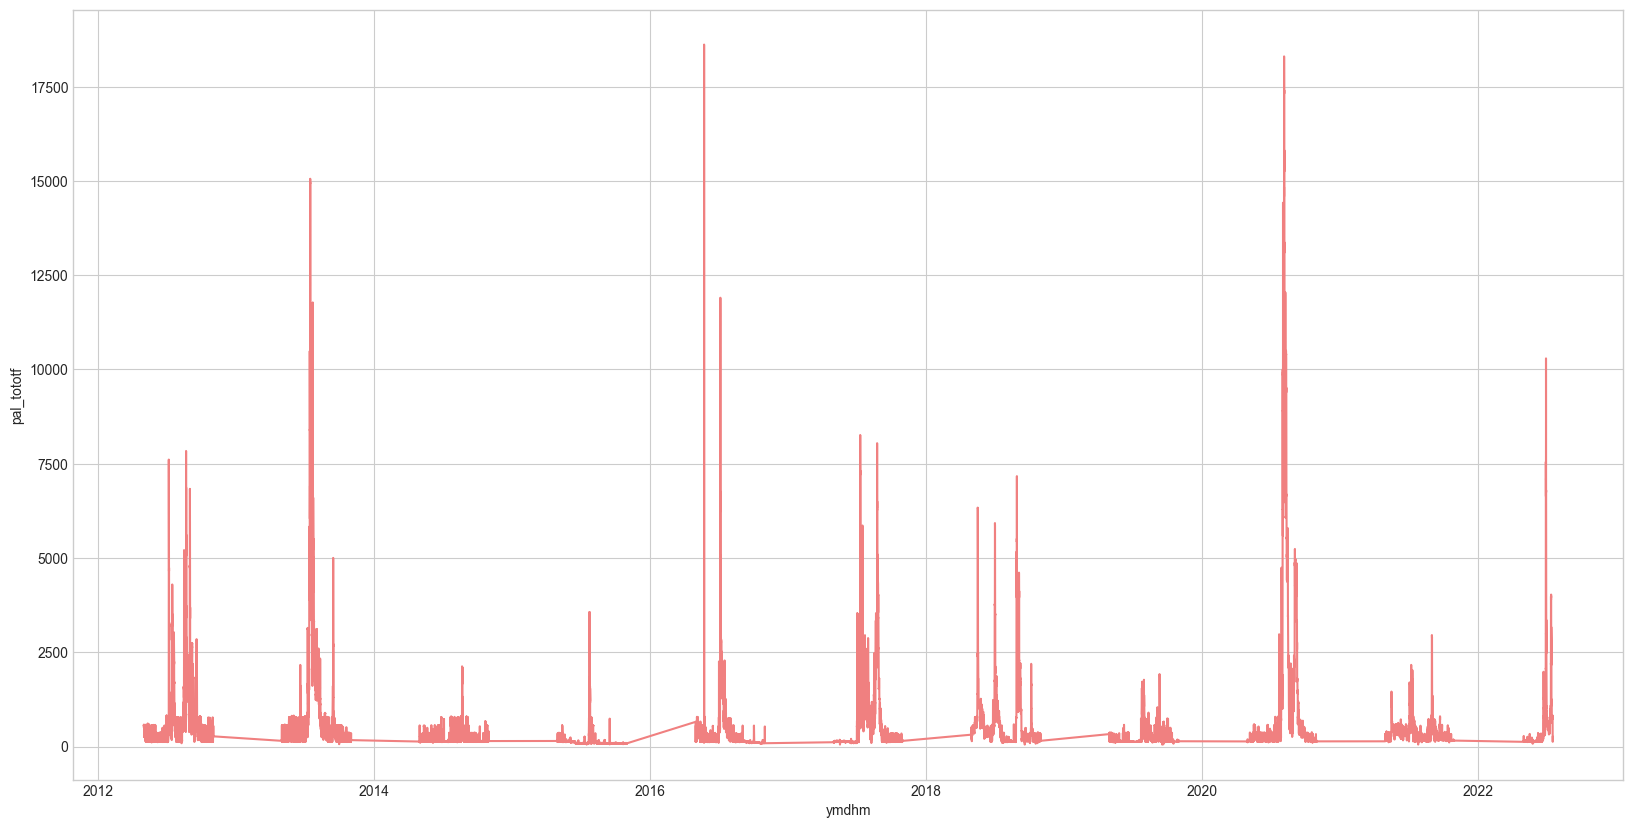

In [102]:
#결측치 처리후 그래프 확인
# line_slider(water_df_pal_tototf, 'ymdhm', 'pal_tototf')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_pal_tototf['ymdhm'], y=water_df_pal_tototf['pal_tototf'], ax=ax, color=random.choice(line_color))

#### 강화대교 조위

<AxesSubplot:xlabel='ymdhm', ylabel='gangwha_tide_level'>

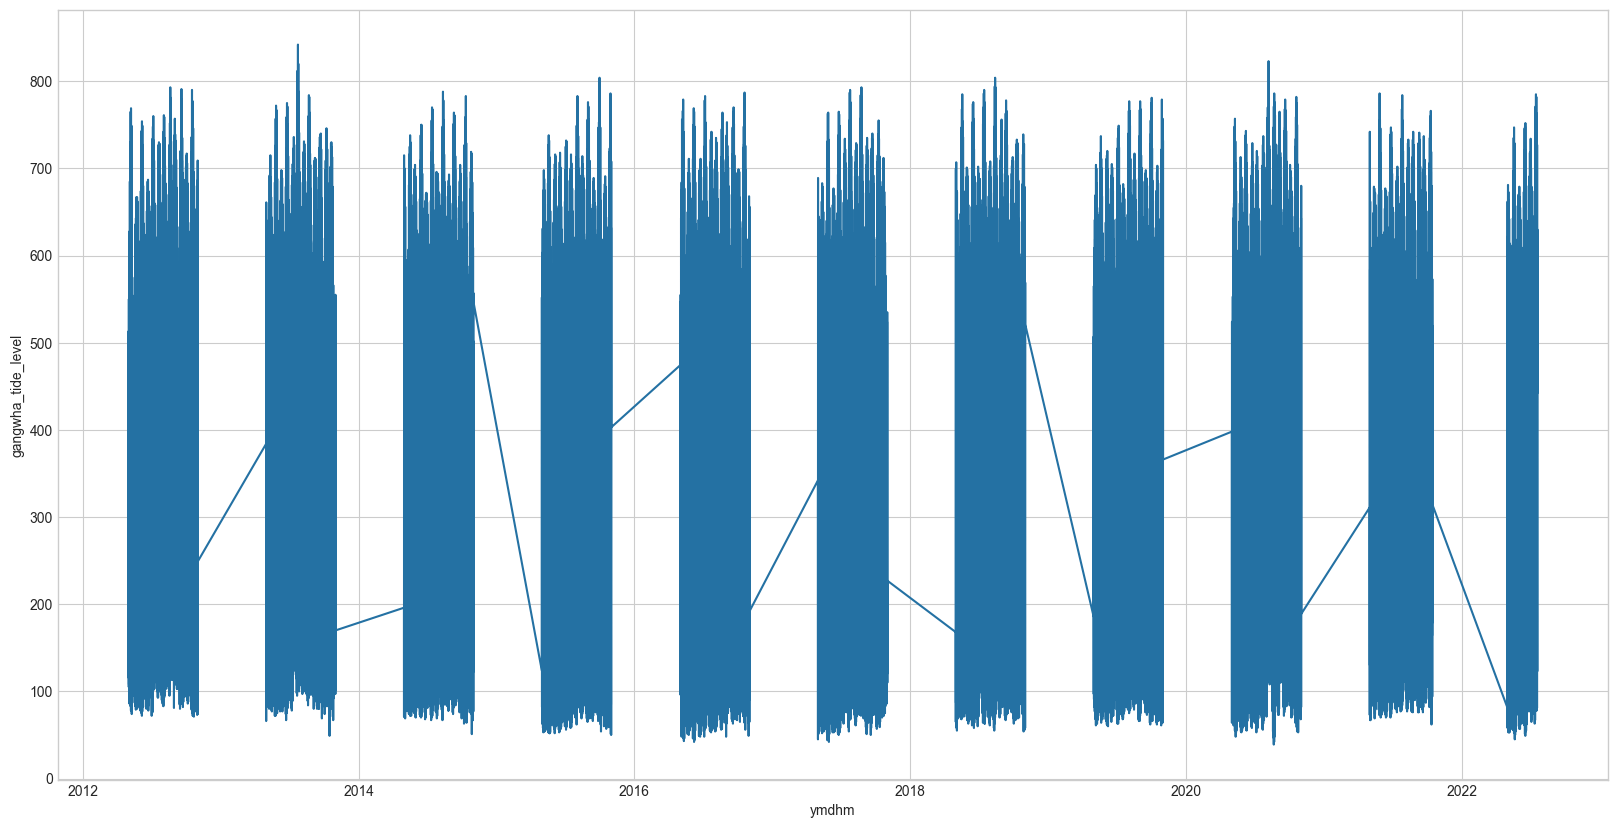

In [103]:
# line_slider(water_df, 'ymdhm', 'gangwha_tide_level')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['gangwha_tide_level'], ax=ax, color=random.choice(line_color))

In [104]:
water_df_gangwha_tide_level =  water_df.loc[:, ['ymdhm','gangwha_tide_level']]
water_df_gangwha_tide_level[water_df_gangwha_tide_level.gangwha_tide_level.isnull()]
# 2017-6-27 길게 결측치가 있음 아마 수치계 고장 또는 수리인듯? 시간순으로 결측처리

,ymdhm,gangwha_tide_level
193,2012-05-02 08:10:00,NaN
307,2012-05-03 03:10:00,NaN
1359,2012-05-10 10:30:00,NaN
1377,2012-05-10 13:30:00,NaN
1378,2012-05-10 13:40:00,NaN
...,...,...
267172,2022-05-16 08:40:00,NaN
270004,2022-06-05 00:40:00,NaN
270383,2022-06-07 15:50:00,NaN
272504,2022-06-22 09:20:00,NaN


In [105]:
water_df_gangwha_tide_level.describe()
# 튀어보이는 값 없음

,gangwha_tide_level
count,271409.000000
mean,347.219024
std,174.542578
min,39.000000
25%,193.000000
50%,328.000000
75%,489.000000
max,842.000000


In [106]:
# 마이너스 값 없음
water_df_gangwha_tide_level[water_df_gangwha_tide_level.gangwha_tide_level < 0]

,ymdhm,gangwha_tide_level


In [107]:
#결측치 채우기
water_df_gangwha_tide_level = water_df_gangwha_tide_level.set_index('ymdhm')
water_df_gangwha_tide_level = water_df_gangwha_tide_level.interpolate(method='time')
water_df_gangwha_tide_level.reset_index(drop = False, inplace = True)
water_df_gangwha_tide_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ymdhm               276336 non-null  datetime64[ns]
 1   gangwha_tide_level  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='gangwha_tide_level'>

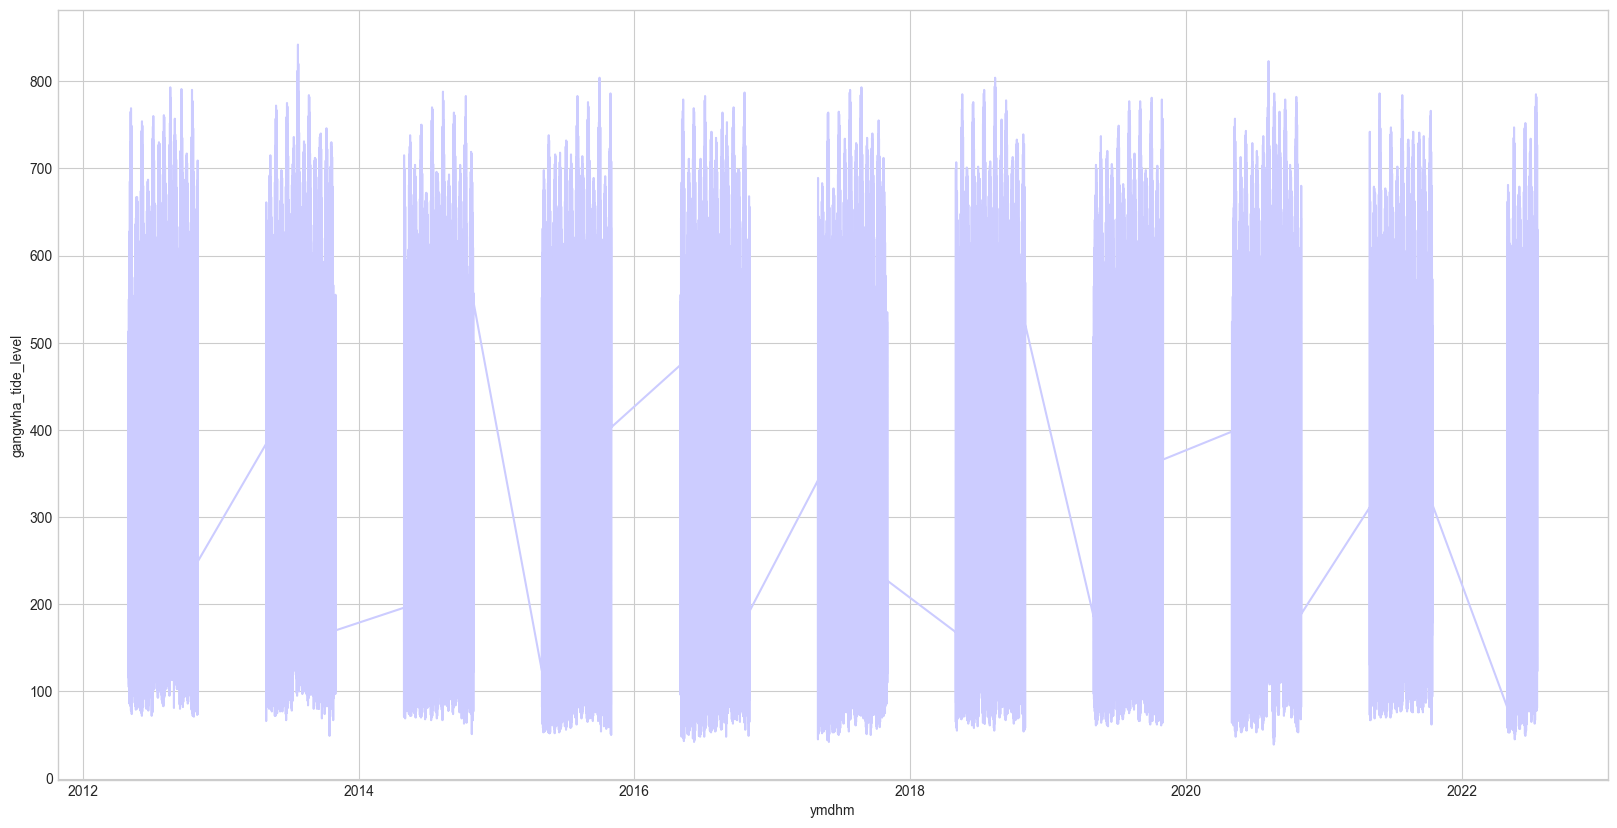

In [108]:
#결측치 처리후 그래프 확인
# line_slider(water_df_gangwha_tide_level, 'ymdhm', 'gangwha_tide_level')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_gangwha_tide_level['ymdhm'], y=water_df_gangwha_tide_level['gangwha_tide_level'], ax=ax, color=random.choice(line_color))

#### 청담대교 수위

<AxesSubplot:xlabel='ymdhm', ylabel='wl_chungdam'>

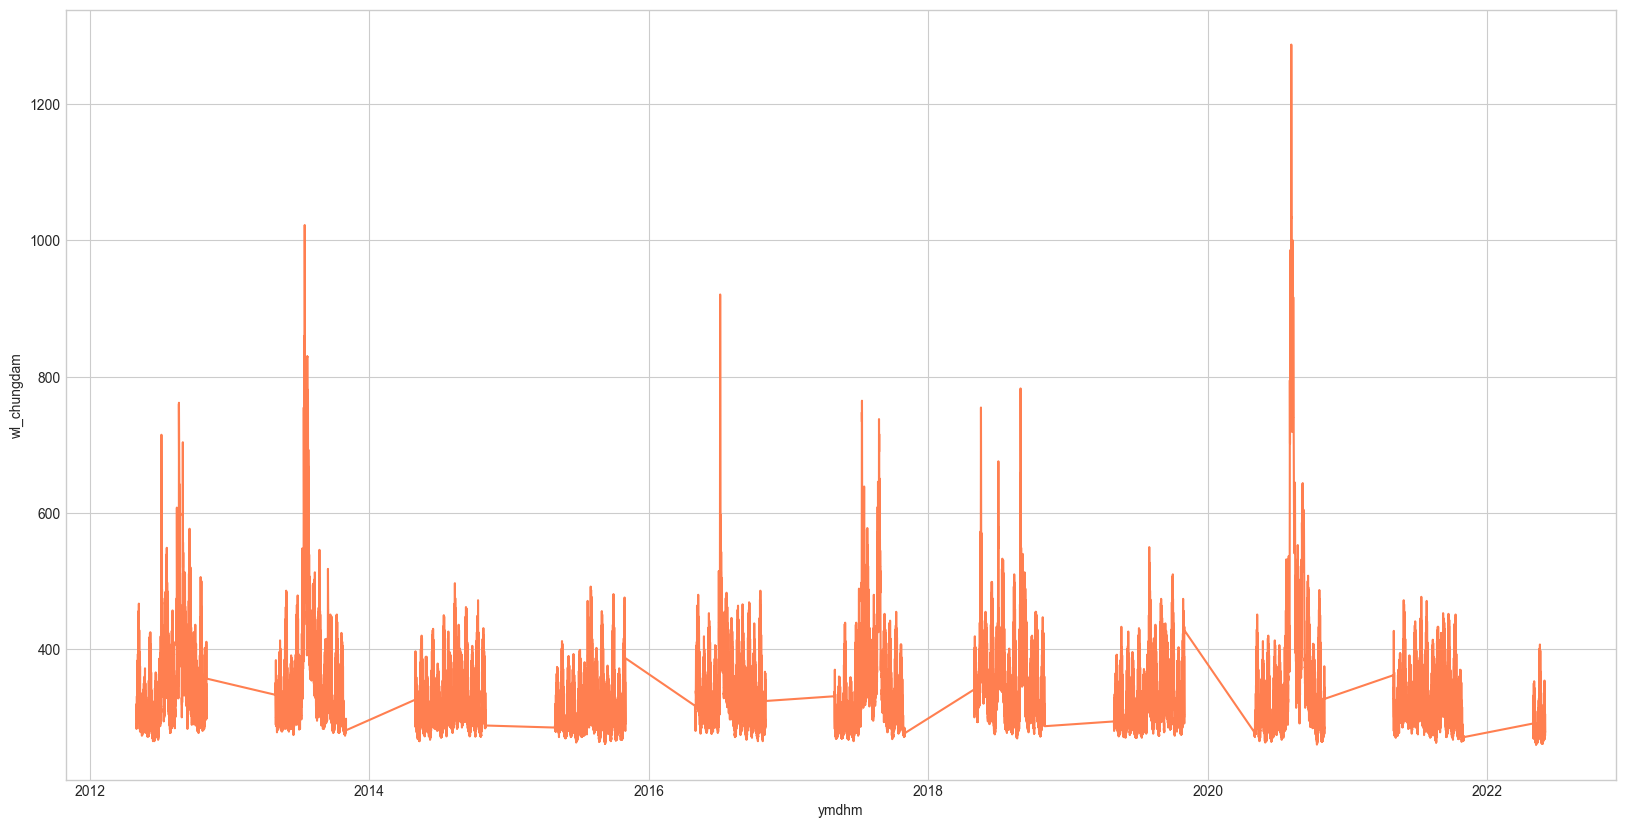

In [109]:
# line_slider(water_df, 'ymdhm', 'wl_chungdam')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['wl_chungdam'], ax=ax, color=random.choice(line_color))

In [110]:
water_df_wl_chungdam =  water_df.loc[:, ['ymdhm','wl_chungdam']]
water_df_wl_chungdam[water_df_wl_chungdam.wl_chungdam.isnull()]
#2017-06-36 연속적인 NaN 값(아마 계측기 고장이나 수리?)외에 특이사항 없음.

,ymdhm,wl_chungdam
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
...,...,...
276331,2022-07-18 23:10:00,NaN
276332,2022-07-18 23:20:00,NaN
276333,2022-07-18 23:30:00,NaN
276334,2022-07-18 23:40:00,NaN


In [111]:
water_df_wl_chungdam.describe()

,wl_chungdam
count,269365.000000
mean,329.081794
std,76.033203
min,259.700000
25%,287.700000
50%,307.700000
75%,342.700000
max,1287.700000


In [112]:
# 마이너스 값 없음, 0 없음
water_df_wl_chungdam[water_df_wl_chungdam.wl_chungdam < 0]


,ymdhm,wl_chungdam


In [113]:
# 큰수도 연속적입 값들로 문제 없어 보임
water_df_wl_chungdam[water_df_wl_chungdam.wl_chungdam > 1000]

,ymdhm,wl_chungdam
37418,2013-07-15 20:20:00,1001.7
37419,2013-07-15 20:30:00,1005.7
37420,2013-07-15 20:40:00,1007.7
37421,2013-07-15 20:50:00,1009.7
37422,2013-07-15 21:00:00,1014.7
...,...,...
226157,2020-08-07 12:50:00,1002.7
226158,2020-08-07 13:00:00,1000.7
226478,2020-08-09 18:20:00,1000.7
226479,2020-08-09 18:30:00,1000.7


In [114]:
#결측치 채우기
water_df_wl_chungdam = water_df_wl_chungdam.set_index('ymdhm')
water_df_wl_chungdam = water_df_wl_chungdam.interpolate(method='time')
water_df_wl_chungdam.reset_index(drop = False, inplace = True)
water_df_wl_chungdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        276336 non-null  datetime64[ns]
 1   wl_chungdam  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='wl_chungdam'>

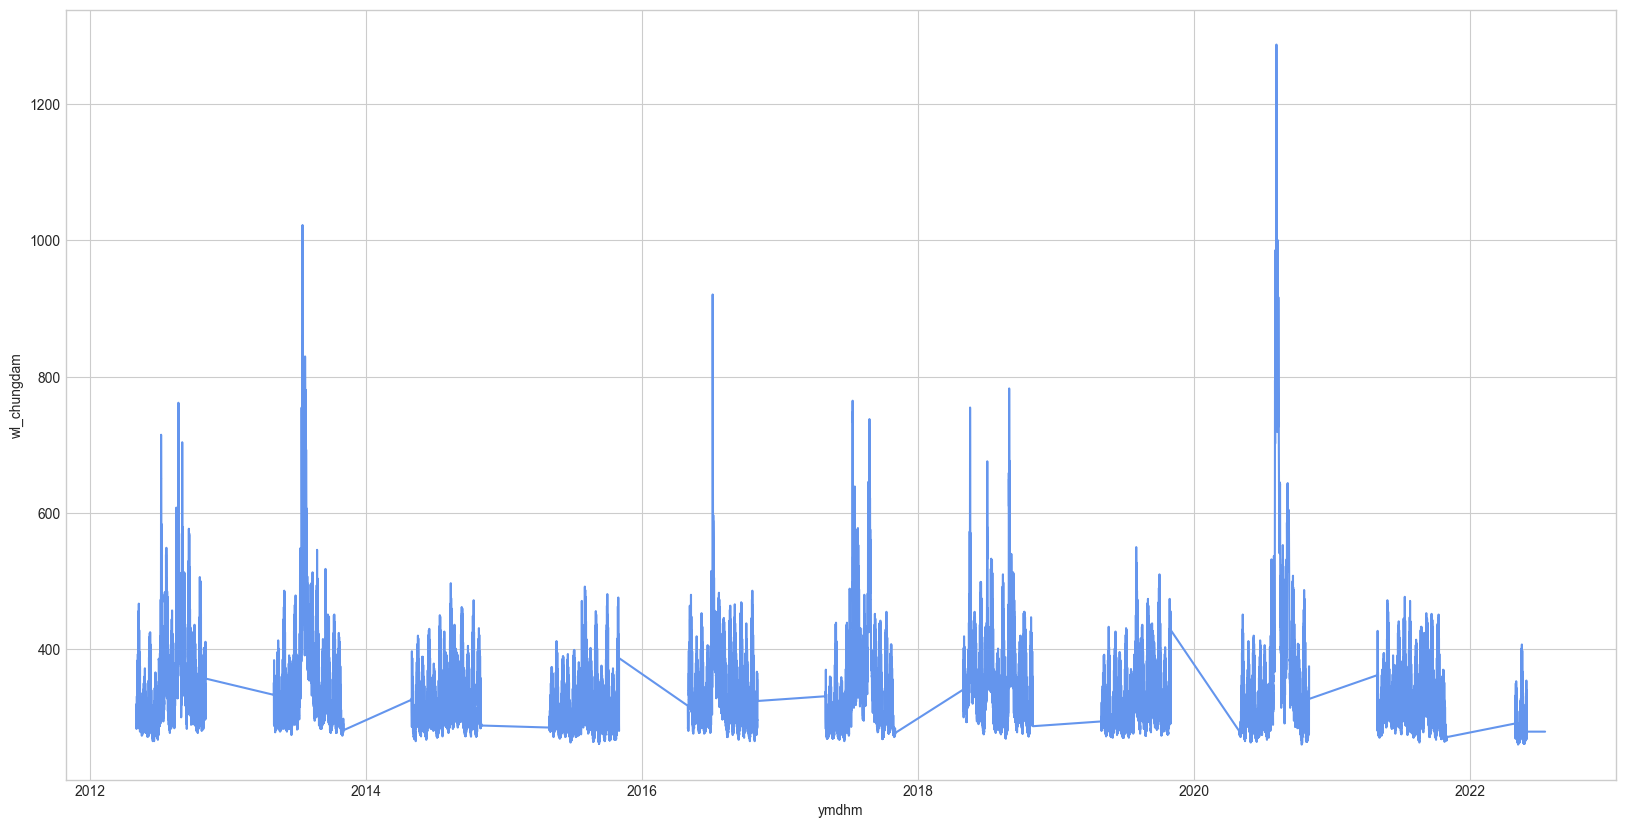

In [115]:
#결측치 처리후 그래프 확인

# line_slider(water_df_wl_chungdam, 'ymdhm', 'wl_chungdam')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_wl_chungdam['ymdhm'], y=water_df_wl_chungdam['wl_chungdam'], ax=ax, color=random.choice(line_color))

#### 청담대교 유량

<AxesSubplot:xlabel='ymdhm', ylabel='fw_chungdam'>

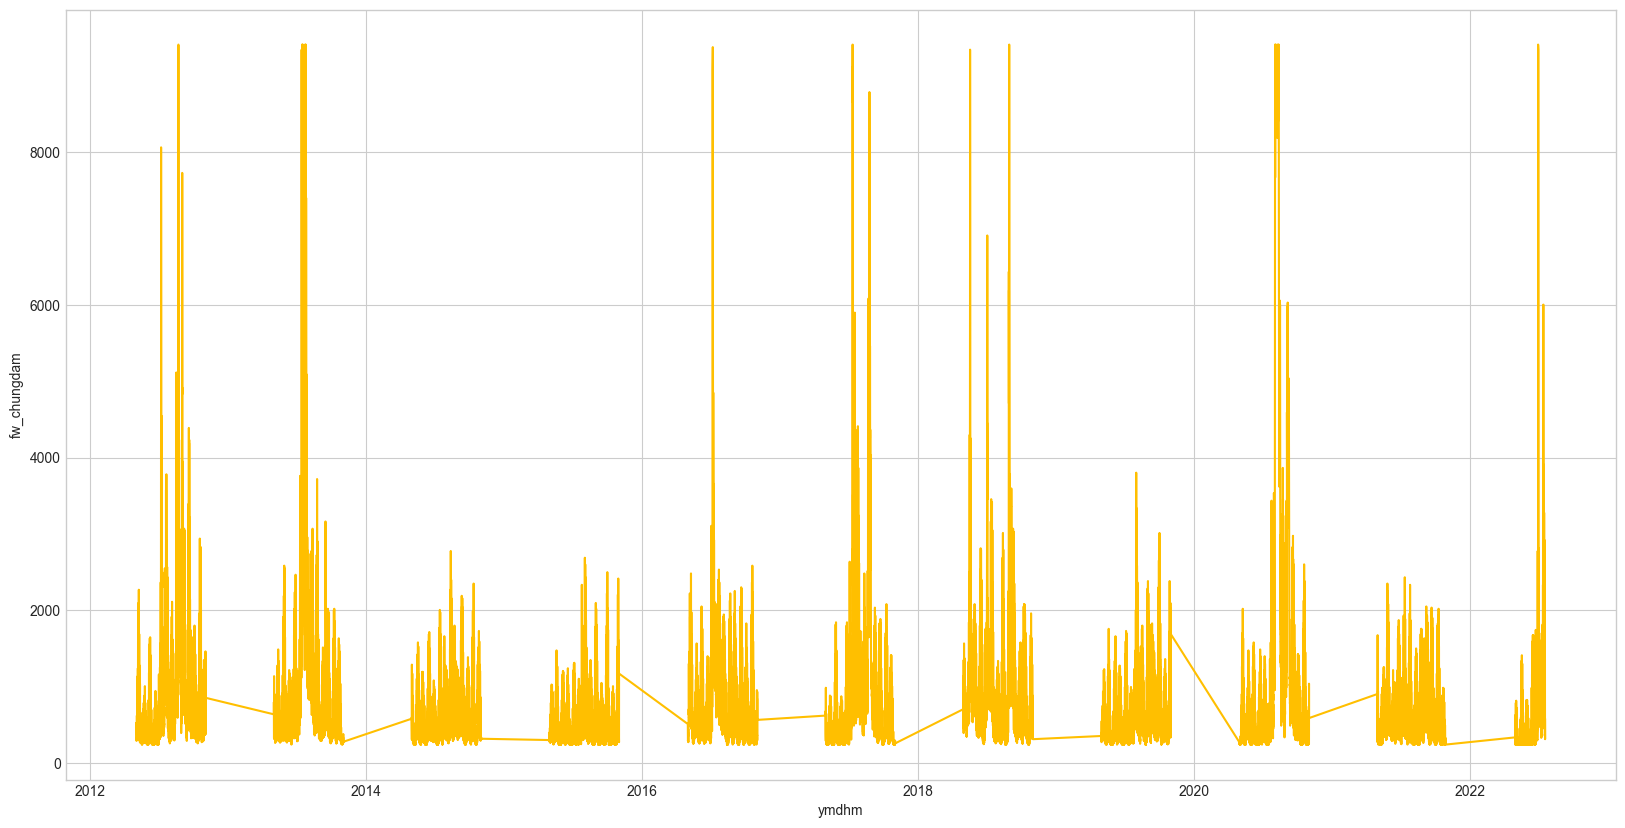

In [116]:
# line_slider(water_df, 'ymdhm', 'fw_chungdam')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['fw_chungdam'], ax=ax, color=random.choice(line_color))

In [117]:
water_df_fw_chungdam =  water_df.loc[:, ['ymdhm','fw_chungdam']]
water_df_fw_chungdam[water_df_fw_chungdam.fw_chungdam.isnull()]

,ymdhm,fw_chungdam
80994,2015-05-11 11:00:00,NaN
80995,2015-05-11 11:10:00,NaN
80996,2015-05-11 11:20:00,NaN
80997,2015-05-11 11:30:00,NaN
80998,2015-05-11 11:40:00,NaN
...,...,...
273775,2022-07-01 05:10:00,NaN
273776,2022-07-01 05:20:00,NaN
273777,2022-07-01 05:30:00,NaN
273778,2022-07-01 05:40:00,NaN


In [118]:
water_df_fw_chungdam.describe()

,fw_chungdam
count,259956.000000
mean,727.126354
std,897.191749
min,243.290000
25%,337.640000
50%,461.960000
75%,743.640000
max,9405.640000


In [119]:
# 마이너스 값 없음, 0 없음
water_df_fw_chungdam[water_df_fw_chungdam.fw_chungdam == 0]

,ymdhm,fw_chungdam


In [120]:
# 큰수도 연속적입 값들로 문제 없어 보임

water_df_fw_chungdam[water_df_fw_chungdam.fw_chungdam > 9000]


,ymdhm,fw_chungdam
16158,2012-08-21 05:00:00,9075.73
16159,2012-08-21 05:10:00,9339.17
16160,2012-08-21 05:20:00,9339.17
16161,2012-08-21 05:30:00,9405.64
16162,2012-08-21 05:40:00,9405.64
...,...,...
273669,2022-06-30 11:30:00,9272.95
273670,2022-06-30 11:40:00,9405.64
273780,2022-07-01 06:00:00,9339.17
273781,2022-07-01 06:10:00,9174.06


In [121]:
#결측치 채우기
water_df_fw_chungdam = water_df_fw_chungdam.set_index('ymdhm')
water_df_fw_chungdam = water_df_fw_chungdam.interpolate(method='time')
water_df_fw_chungdam.reset_index(drop = False, inplace = True)
water_df_fw_chungdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        276336 non-null  datetime64[ns]
 1   fw_chungdam  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='fw_chungdam'>

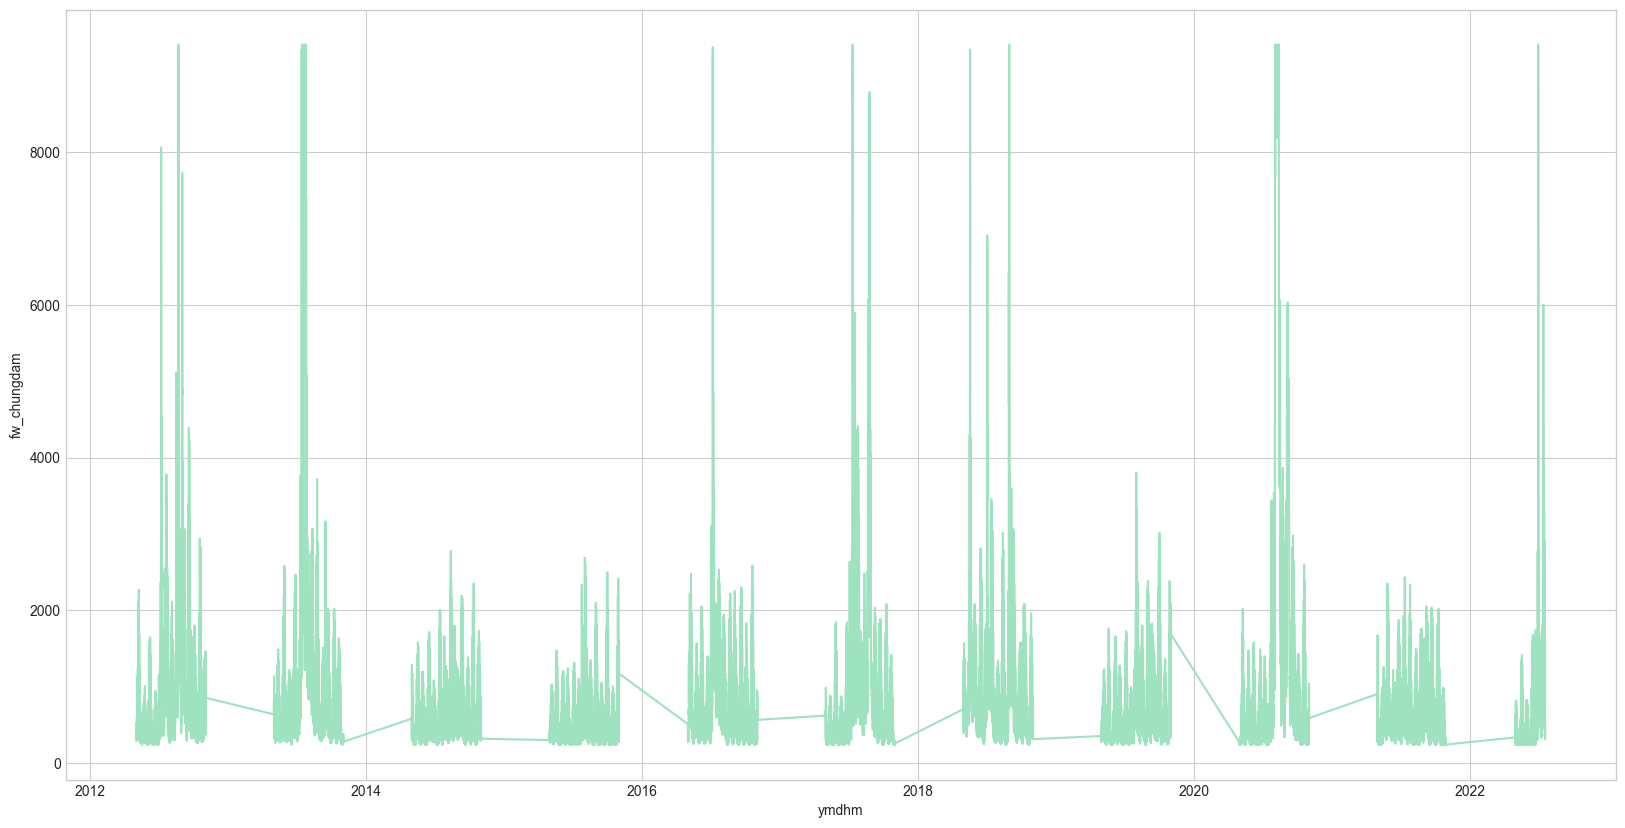

In [122]:
#결측치 처리후 그래프 확인
# line_slider(water_df_fw_chungdam, 'ymdhm', 'fw_chungdam')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_fw_chungdam['ymdhm'], y=water_df_fw_chungdam['fw_chungdam'], ax=ax, color=random.choice(line_color))

#### 잠수교 수위

<AxesSubplot:xlabel='ymdhm', ylabel='wl_jamsu'>

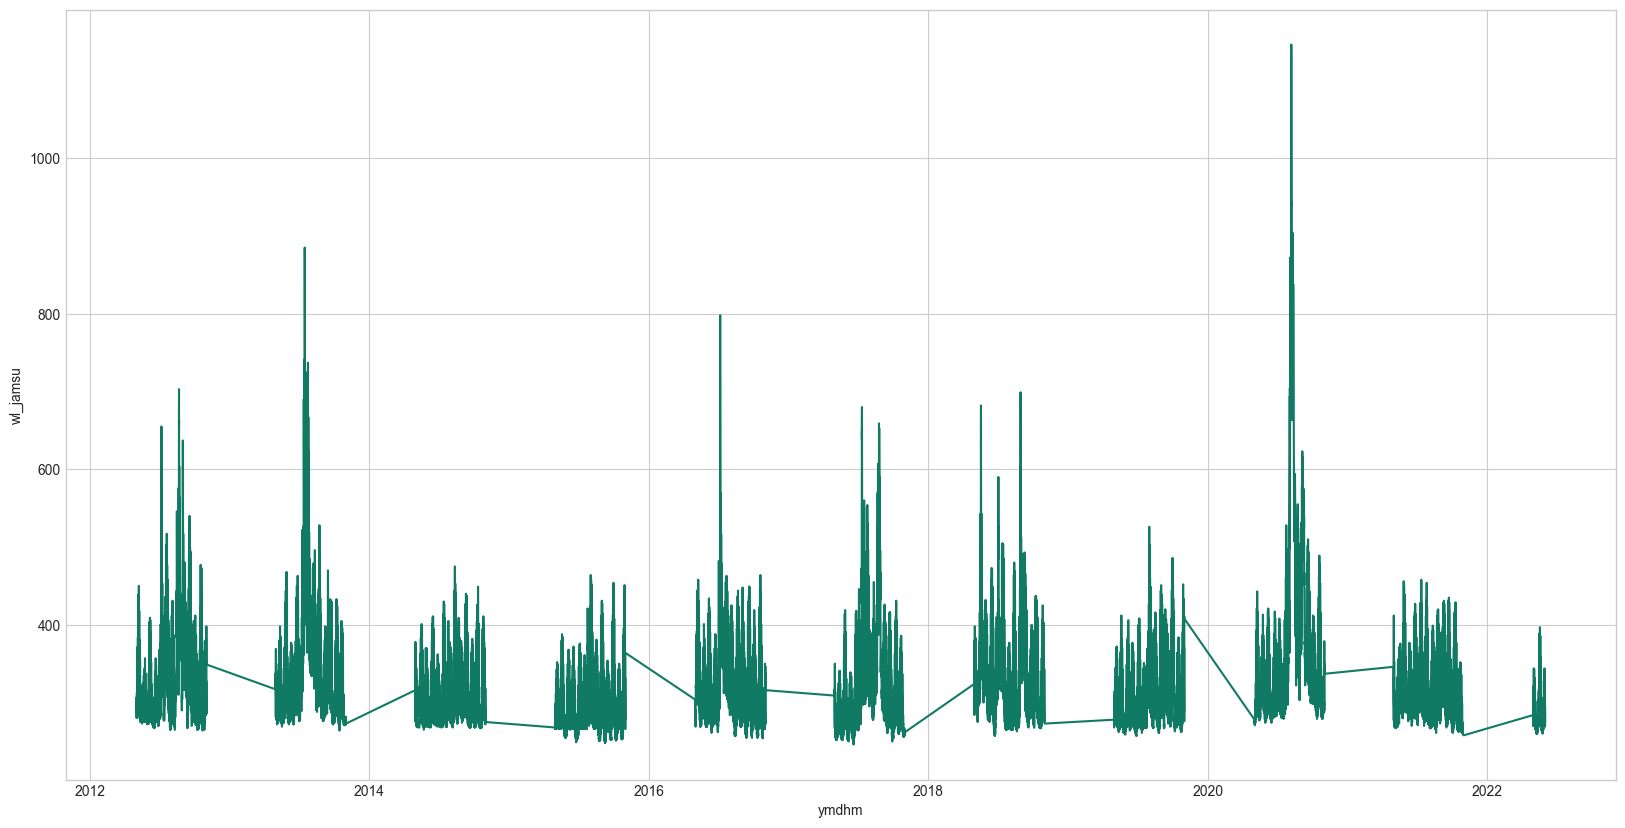

In [123]:
# line_slider(water_df, 'ymdhm', 'wl_jamsu')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['wl_jamsu'], ax=ax, color=random.choice(line_color))

In [124]:
water_df_wl_jamsu =  water_df.loc[:, ['ymdhm','wl_jamsu']]
water_df_wl_jamsu[water_df_wl_jamsu.wl_jamsu.isnull()]
#2017-06-26 이날 수늘 날인가봄 이외에 이상없어보임

,ymdhm,wl_jamsu
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
...,...,...
276331,2022-07-18 23:10:00,NaN
276332,2022-07-18 23:20:00,NaN
276333,2022-07-18 23:30:00,NaN
276334,2022-07-18 23:40:00,NaN


In [125]:
water_df_wl_jamsu.describe()


,wl_jamsu
count,269365.000000
mean,315.837039
std,67.132736
min,246.200000
25%,278.200000
50%,297.200000
75%,329.200000
max,1146.200000


In [126]:
# 마이너스 값 없음, 0 없음
water_df_wl_jamsu[water_df_wl_jamsu.wl_jamsu < 0]


,ymdhm,wl_jamsu


In [127]:

# 큰수도 연속적인 값들로 문제 없어 보임
water_df_wl_jamsu[water_df_wl_jamsu.wl_jamsu > 1000]

,ymdhm,wl_jamsu
225986,2020-08-06 08:20:00,1002.2
225987,2020-08-06 08:30:00,1011.2
225988,2020-08-06 08:40:00,1019.2
225989,2020-08-06 08:50:00,1028.2
225990,2020-08-06 09:00:00,1037.2
...,...,...
226105,2020-08-07 04:10:00,1018.2
226106,2020-08-07 04:20:00,1014.2
226107,2020-08-07 04:30:00,1007.2
226108,2020-08-07 04:40:00,1006.2


In [128]:
#결측치 채우기
water_df_wl_jamsu = water_df_wl_jamsu.set_index('ymdhm')
water_df_wl_jamsu = water_df_wl_jamsu.interpolate(method='time')
water_df_wl_jamsu.reset_index(drop = False, inplace = True)
water_df_wl_jamsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ymdhm     276336 non-null  datetime64[ns]
 1   wl_jamsu  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='wl_jamsu'>

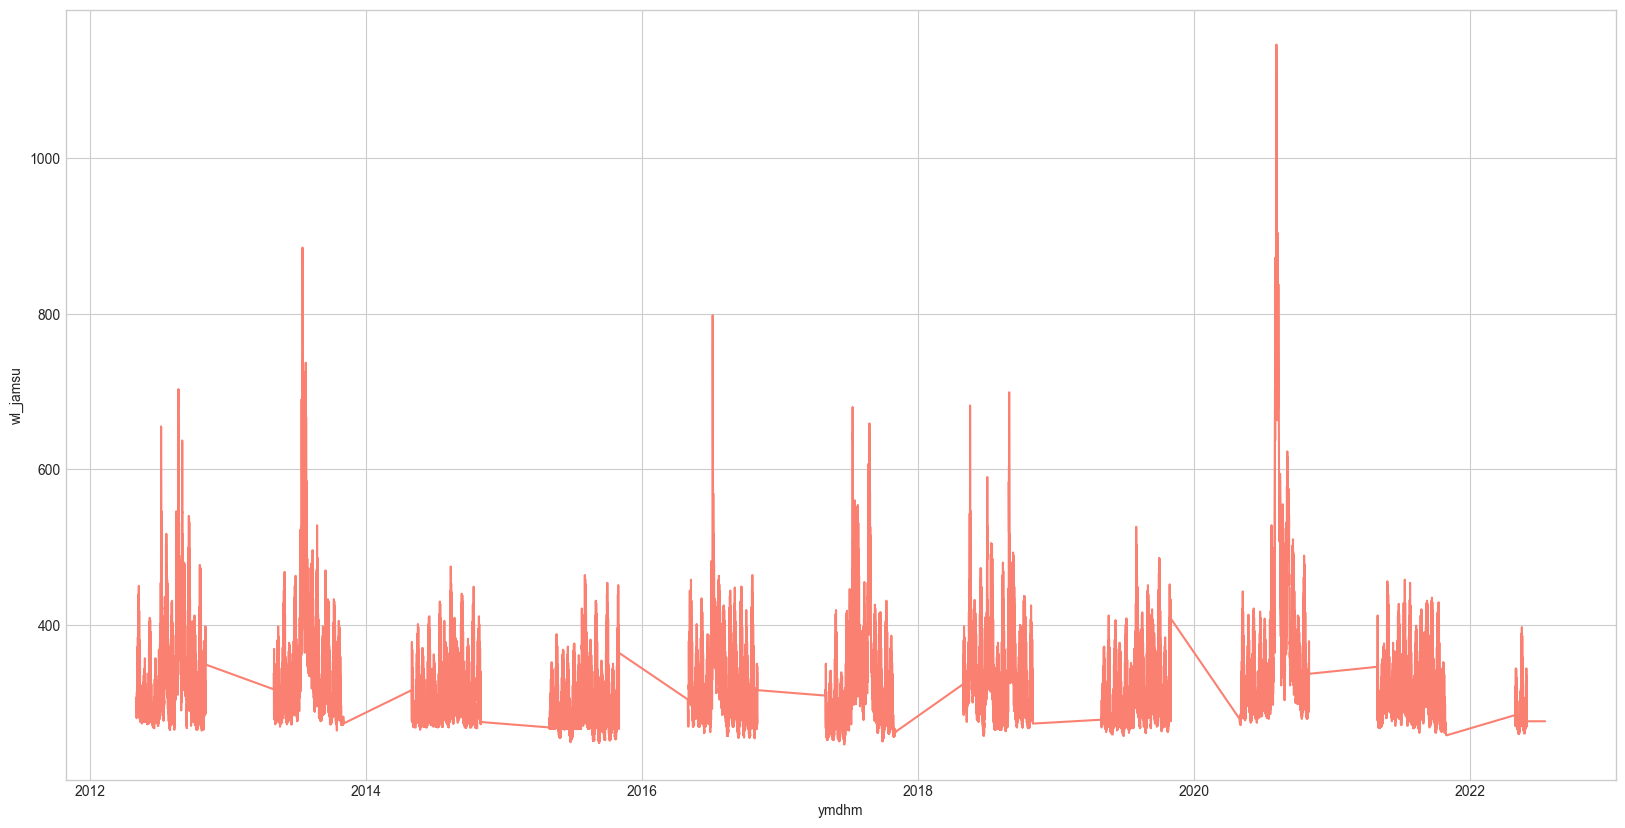

In [129]:
#결측치 처리후 그래프 확인
# line_slider(water_df_wl_jamsu, 'ymdhm', 'wl_jamsu')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_wl_jamsu['ymdhm'], y=water_df_wl_jamsu['wl_jamsu'], ax=ax, color=random.choice(line_color))

#### 한강대교 수위

<AxesSubplot:xlabel='ymdhm', ylabel='wl_hangang'>

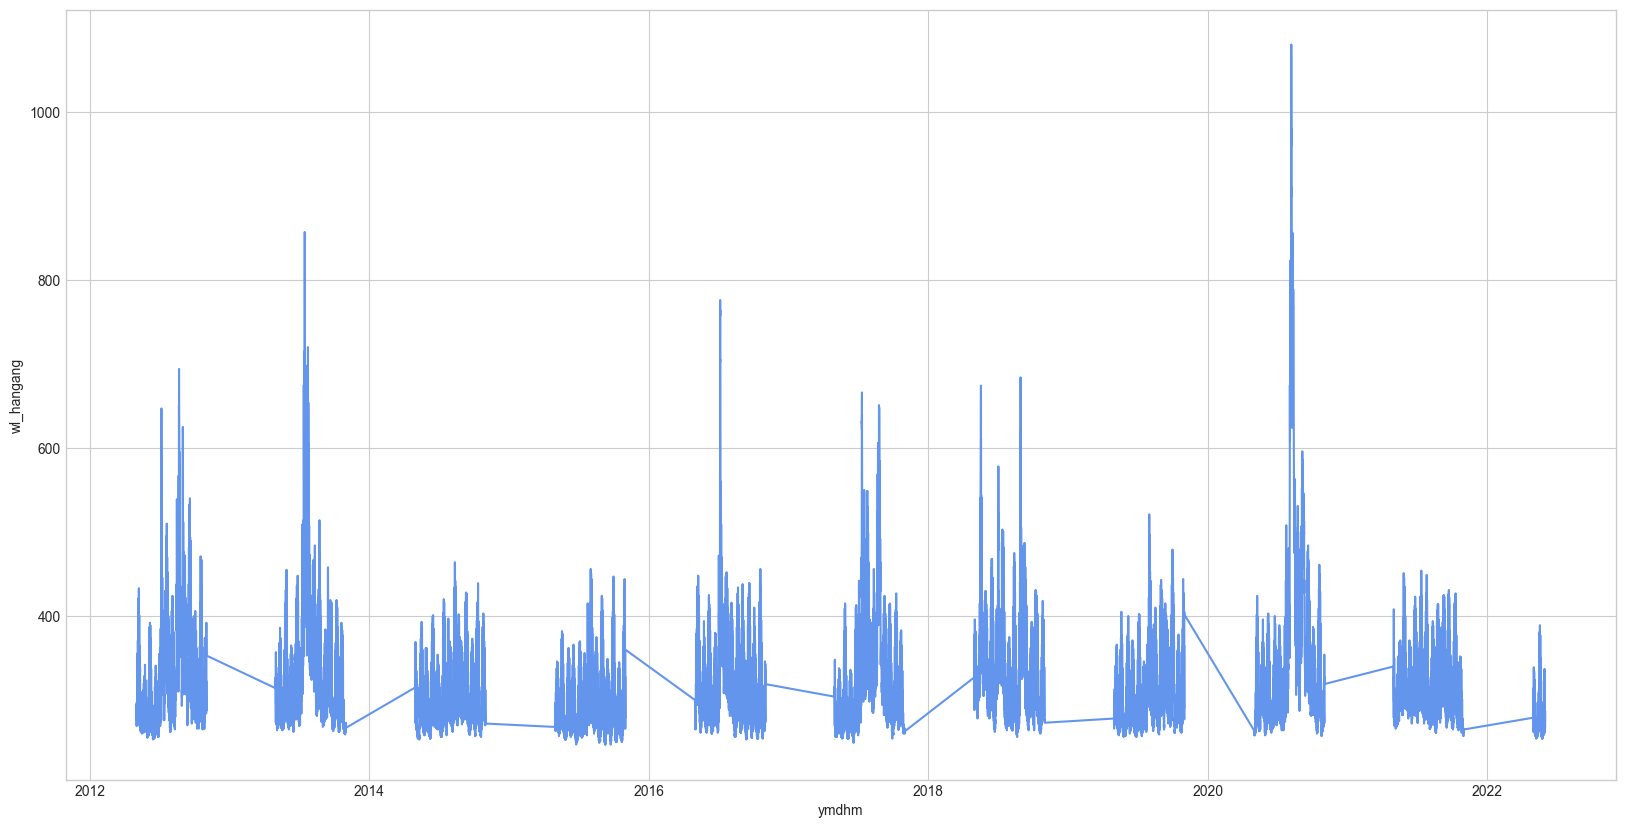

In [130]:
# line_slider(water_df, 'ymdhm', 'wl_hangang')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['wl_hangang'], ax=ax, color=random.choice(line_color))

In [131]:
water_df_wl_hangang =  water_df.loc[:, ['ymdhm','wl_hangang']]
water_df_wl_hangang[water_df_wl_hangang.wl_hangang.isnull()]
#2017-06-26 정전이라도 일어났는가?

,ymdhm,wl_hangang
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
...,...,...
276331,2022-07-18 23:10:00,NaN
276332,2022-07-18 23:20:00,NaN
276333,2022-07-18 23:30:00,NaN
276334,2022-07-18 23:40:00,NaN


In [132]:
water_df_wl_hangang.describe()


,wl_hangang
count,269365.000000
mean,312.397253
std,63.498719
min,247.000000
25%,275.000000
50%,295.000000
75%,327.000000
max,1080.000000


In [133]:
# 마이너스 값 없음, 0 없음
water_df_wl_hangang[water_df_wl_hangang.wl_hangang < 0]

,ymdhm,wl_hangang


In [134]:
# 큰수도 연속적인 값들로 문제 없어 보임
water_df_wl_hangang[water_df_wl_hangang.wl_hangang > 900]

,ymdhm,wl_hangang
225980,2020-08-06 07:20:00,911.0
225982,2020-08-06 07:40:00,921.0
225983,2020-08-06 07:50:00,909.0
225984,2020-08-06 08:00:00,915.0
225985,2020-08-06 08:10:00,925.0
...,...,...
226119,2020-08-07 06:30:00,902.0
226120,2020-08-07 06:40:00,910.0
226122,2020-08-07 07:00:00,910.0
226124,2020-08-07 07:20:00,910.0


In [135]:
#결측치 채우기
water_df_wl_hangang = water_df_wl_hangang.set_index('ymdhm')
water_df_wl_hangang = water_df_wl_hangang.interpolate(method='time')
water_df_wl_hangang.reset_index(drop = False, inplace = True)
water_df_wl_hangang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ymdhm       276336 non-null  datetime64[ns]
 1   wl_hangang  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='wl_hangang'>

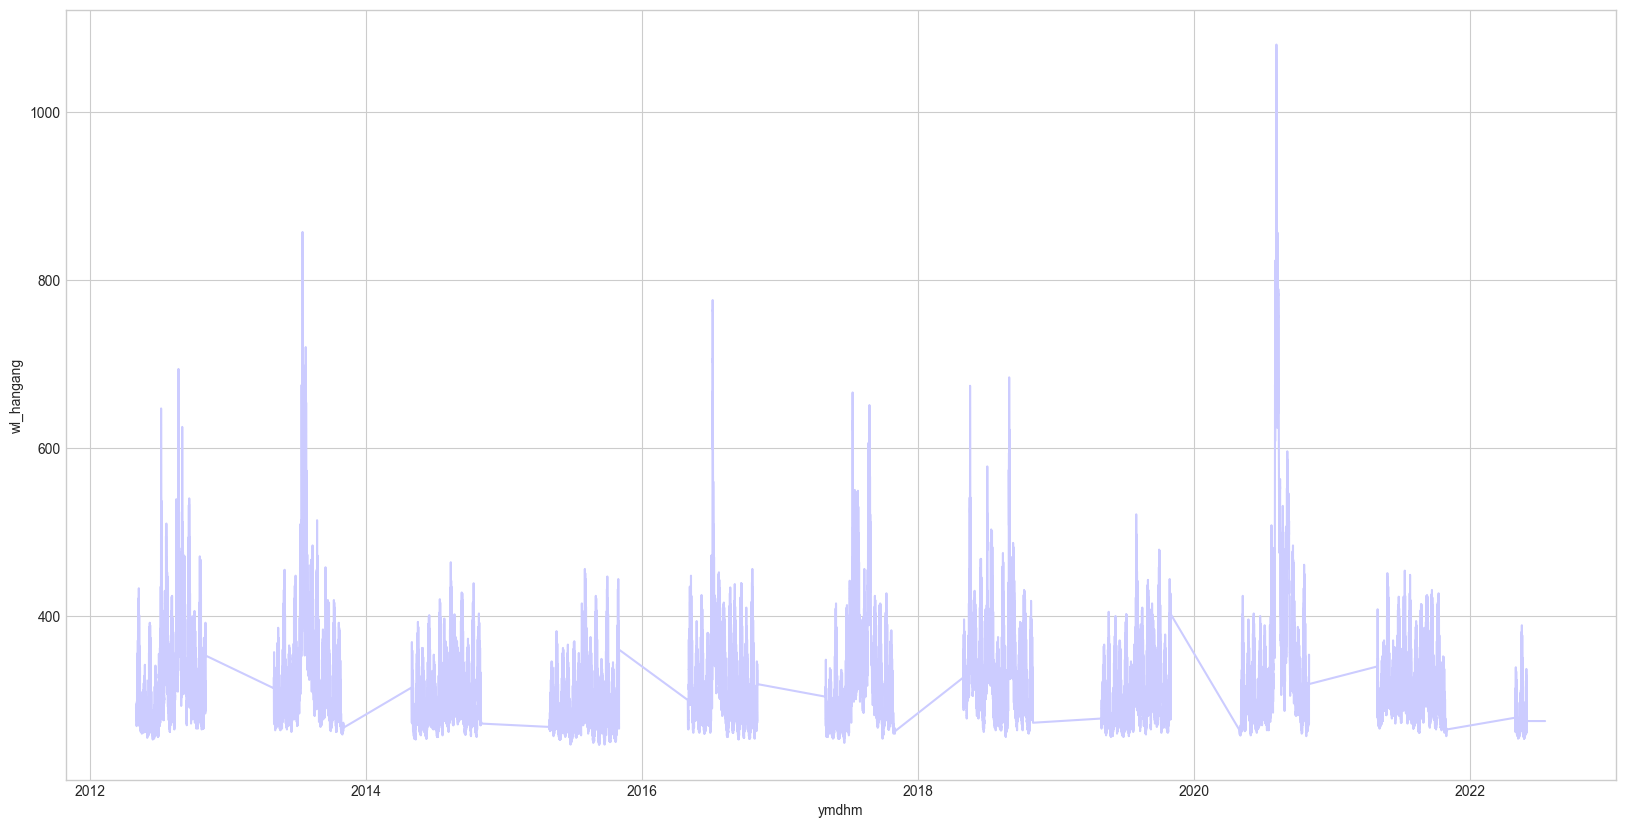

In [136]:
#결측치 처리후 그래프 확인
# line_slider(water_df_wl_hangang, 'ymdhm', 'wl_hangang')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_wl_hangang['ymdhm'], y=water_df_wl_hangang['wl_hangang'], ax=ax, color=random.choice(line_color))

#### 한강대교 유량

<AxesSubplot:xlabel='ymdhm', ylabel='fw_hangang'>

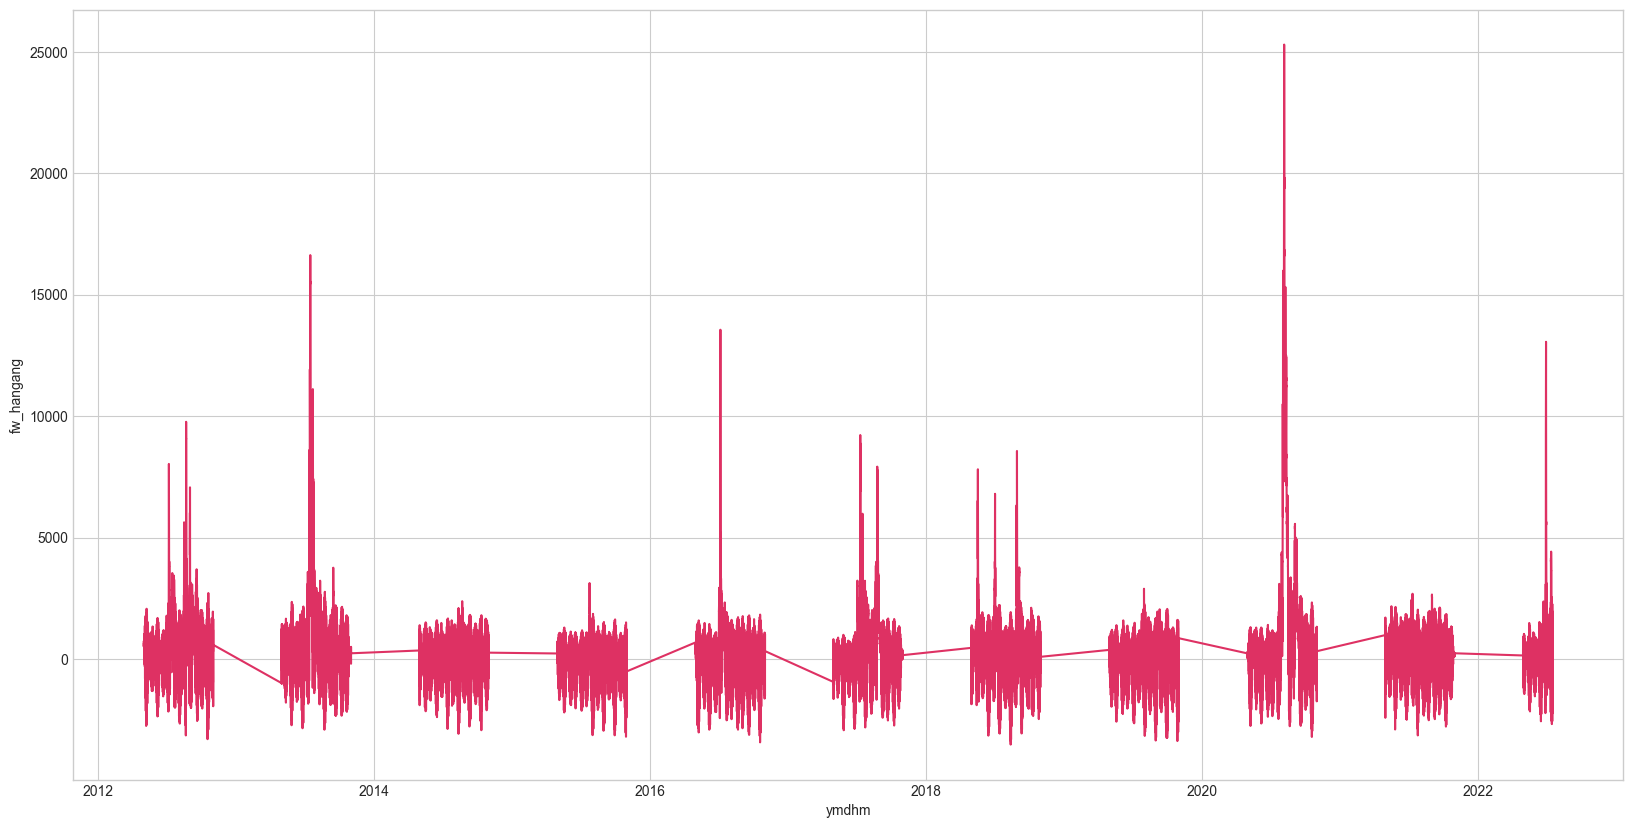

In [137]:
# line_slider(water_df, 'ymdhm', 'fw_hangang')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['fw_hangang'], ax=ax, color=random.choice(line_color))

In [138]:
water_df_fw_hangang =  water_df.loc[:, ['ymdhm','fw_hangang']]
water_df_fw_hangang[water_df_fw_hangang.fw_hangang.isnull()]
# 다른 컬럼들에비해 결측치가 연속적으로 길게 발생하는 경향이있음 일단 시계열로 채우겠으나 다시살펴봐야할듯

,ymdhm,fw_hangang
28871,2013-05-17 11:50:00,NaN
29628,2013-05-22 18:00:00,NaN
30375,2013-05-27 22:30:00,NaN
34479,2013-06-25 10:30:00,NaN
36702,2013-07-10 21:00:00,NaN
...,...,...
271584,2022-06-16 00:00:00,NaN
272223,2022-06-20 10:30:00,NaN
272314,2022-06-21 01:40:00,NaN
272369,2022-06-21 10:50:00,NaN


In [139]:
water_df_fw_hangang.describe()
#마이너스 발견!

,fw_hangang
count,274874.000000
mean,602.361547
std,1380.161367
min,-3522.710000
25%,205.290000
50%,356.040000
75%,710.140000
max,25289.170000


In [140]:

# 마이너스 값 이있으나 연속된 수로 의미있는 수일것으로 파악
water_df_fw_hangang[water_df_fw_hangang.fw_hangang < -3000]


,ymdhm,fw_hangang
16036,2012-08-20 08:40:00,-3140.85
16037,2012-08-20 08:50:00,-3145.54
24313,2012-10-16 20:10:00,-3065.91
24314,2012-10-16 20:20:00,-3299.97
67877,2014-08-12 08:50:00,-3079.52
...,...,...
211514,2019-10-28 20:20:00,-3149.93
211809,2019-10-30 21:30:00,-3007.05
236573,2020-10-18 20:50:00,-3046.68
236574,2020-10-18 21:00:00,-3207.98


In [141]:
# 큰수도 연속적인 값들로 문제 없어 보임
water_df_fw_hangang[water_df_fw_hangang.fw_hangang > 20000]

,ymdhm,fw_hangang
225990,2020-08-06 09:00:00,20160.67
225991,2020-08-06 09:10:00,20394.00
225992,2020-08-06 09:20:00,20232.21
225993,2020-08-06 09:30:00,20311.11
225994,2020-08-06 09:40:00,20496.22
...,...,...
226088,2020-08-07 01:20:00,20062.37
226089,2020-08-07 01:30:00,20179.41
226090,2020-08-07 01:40:00,20121.27
226093,2020-08-07 02:10:00,20010.50


In [142]:
#결측치 채우기
water_df_fw_hangang = water_df_fw_hangang.set_index('ymdhm')
water_df_fw_hangang = water_df_fw_hangang.interpolate(method='time')
water_df_fw_hangang.reset_index(drop = False, inplace = True)
water_df_fw_hangang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ymdhm       276336 non-null  datetime64[ns]
 1   fw_hangang  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='fw_hangang'>

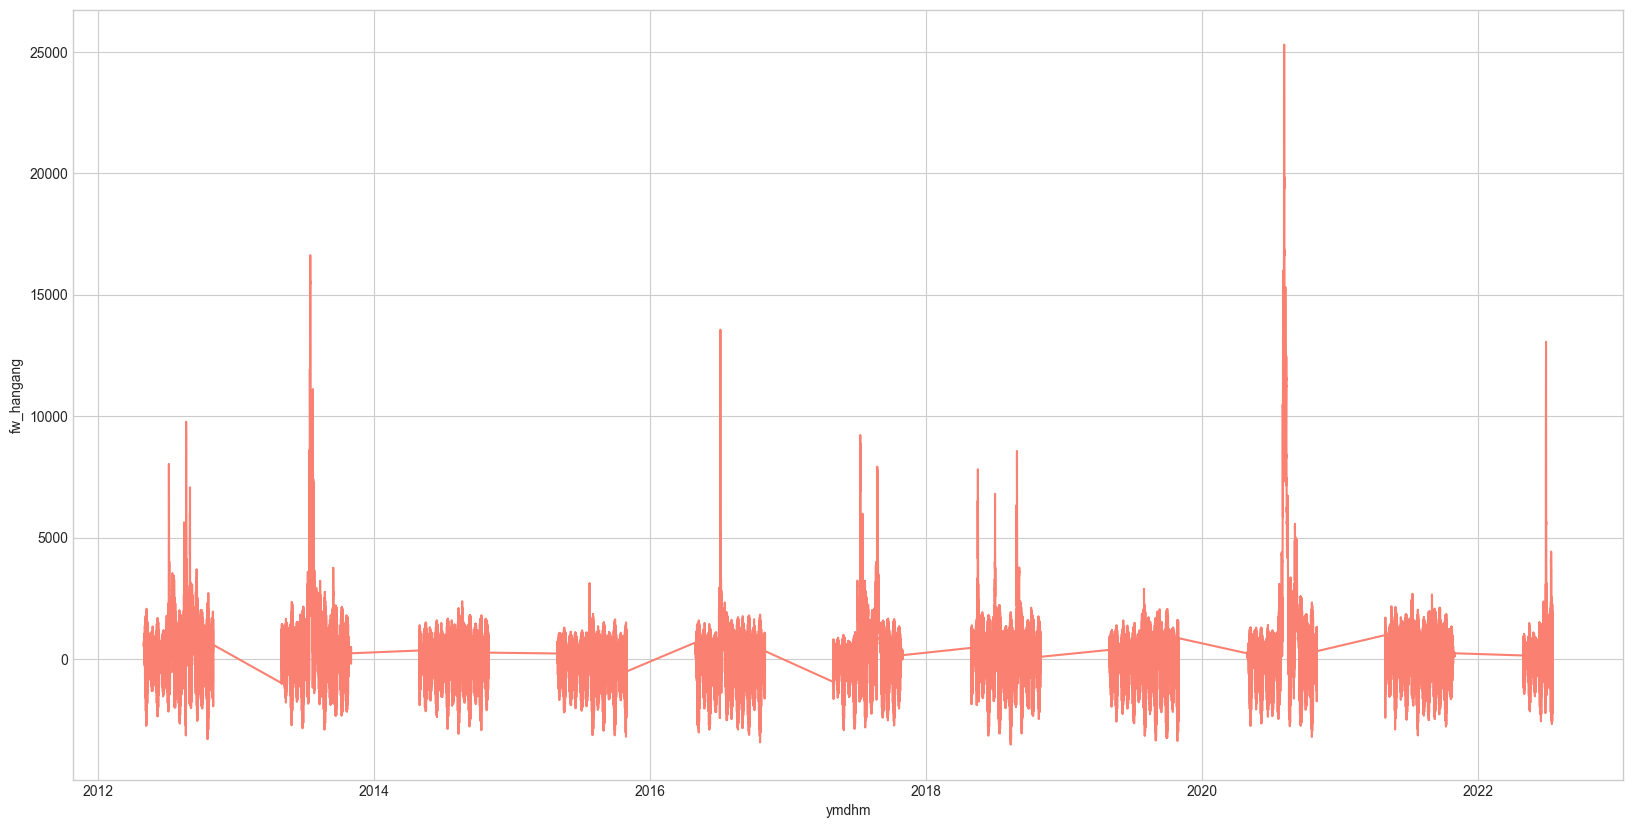

In [143]:
#결측치 처리후 그래프 확인
# line_slider(water_df_fw_hangang, 'ymdhm', 'fw_hangang')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_fw_hangang['ymdhm'], y=water_df_fw_hangang['fw_hangang'], ax=ax, color=random.choice(line_color))

#### 행주대교 수위

<AxesSubplot:xlabel='ymdhm', ylabel='wl_hangju'>

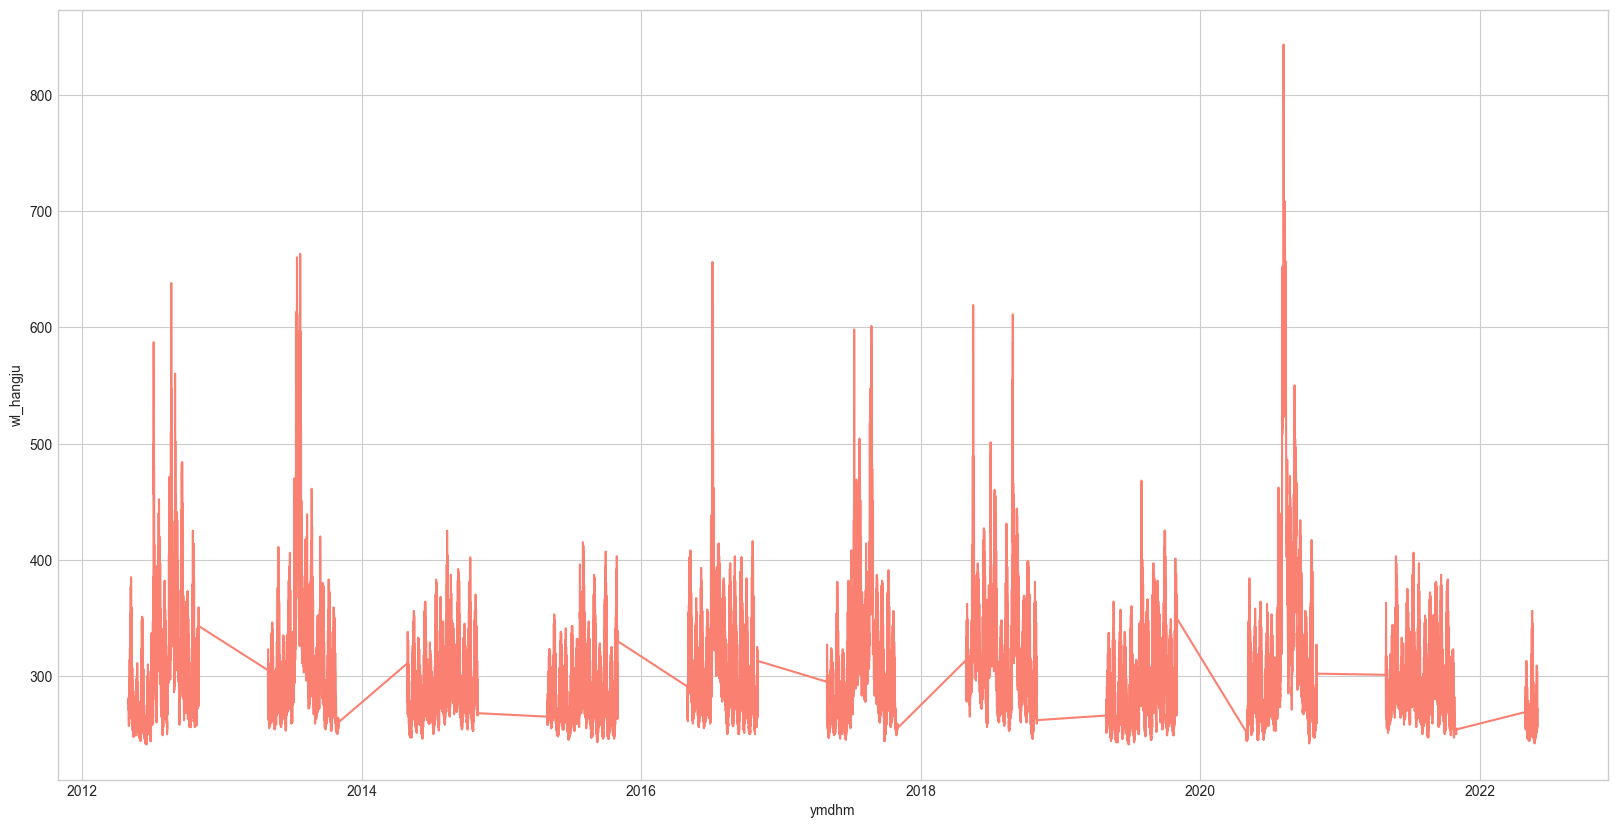

In [144]:
# line_slider(water_df, 'ymdhm', 'wl_hangju')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['wl_hangju'], ax=ax, color=random.choice(line_color))

In [145]:
water_df_wl_hangju =  water_df.loc[:, ['ymdhm','wl_hangju']]
water_df_wl_hangju[water_df_wl_hangju.wl_hangju.isnull()]
#2017-06-26 동일 현상

,ymdhm,wl_hangju
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
...,...,...
276331,2022-07-18 23:10:00,NaN
276332,2022-07-18 23:20:00,NaN
276333,2022-07-18 23:30:00,NaN
276334,2022-07-18 23:40:00,NaN


In [146]:
water_df_wl_hangju.describe()


,wl_hangju
count,269365.000000
mean,299.899358
std,51.168294
min,241.300000
25%,267.300000
50%,286.300000
75%,316.300000
max,843.300000


In [147]:
# 마이너스 값 없음, 0 없음
water_df_wl_hangju[water_df_wl_hangju.wl_hangju < 0]

,ymdhm,wl_hangju


In [148]:

# 큰수도 연속적인 값들로 문제 없어 보임
water_df_wl_hangju[water_df_wl_hangju.wl_hangju > 800]

,ymdhm,wl_hangju
225990,2020-08-06 09:00:00,805.3
225991,2020-08-06 09:10:00,811.3
225992,2020-08-06 09:20:00,816.3
225993,2020-08-06 09:30:00,818.3
225994,2020-08-06 09:40:00,819.3
...,...,...
226072,2020-08-06 22:40:00,804.3
226073,2020-08-06 22:50:00,803.3
226074,2020-08-06 23:00:00,803.3
226075,2020-08-06 23:10:00,801.3


In [149]:
#결측치 채우기
water_df_wl_hangju = water_df_wl_hangju.set_index('ymdhm')
water_df_wl_hangju = water_df_wl_hangju.interpolate(method='time')
water_df_wl_hangju.reset_index(drop = False, inplace = True)
water_df_wl_hangju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ymdhm      276336 non-null  datetime64[ns]
 1   wl_hangju  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='wl_hangju'>

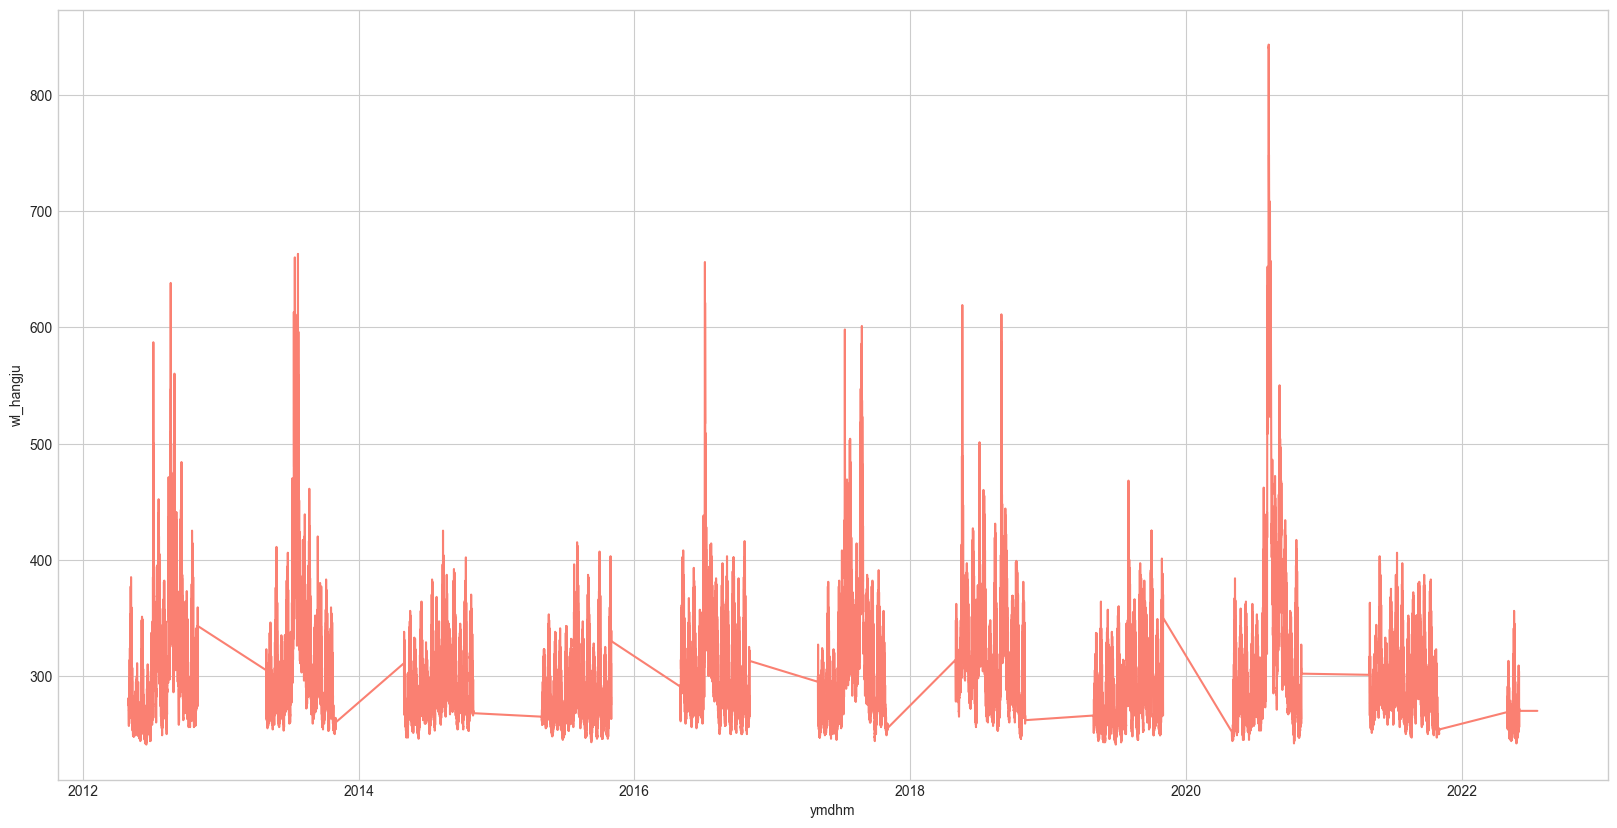

In [150]:
#결측치 처리후 그래프 확인
# line_slider(water_df_wl_hangju, 'ymdhm', 'wl_hangju')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_wl_hangju['ymdhm'], y=water_df_wl_hangju['wl_hangju'], ax=ax, color=random.choice(line_color))

#### 행주대교 유량

<AxesSubplot:xlabel='ymdhm', ylabel='fw_hangju'>

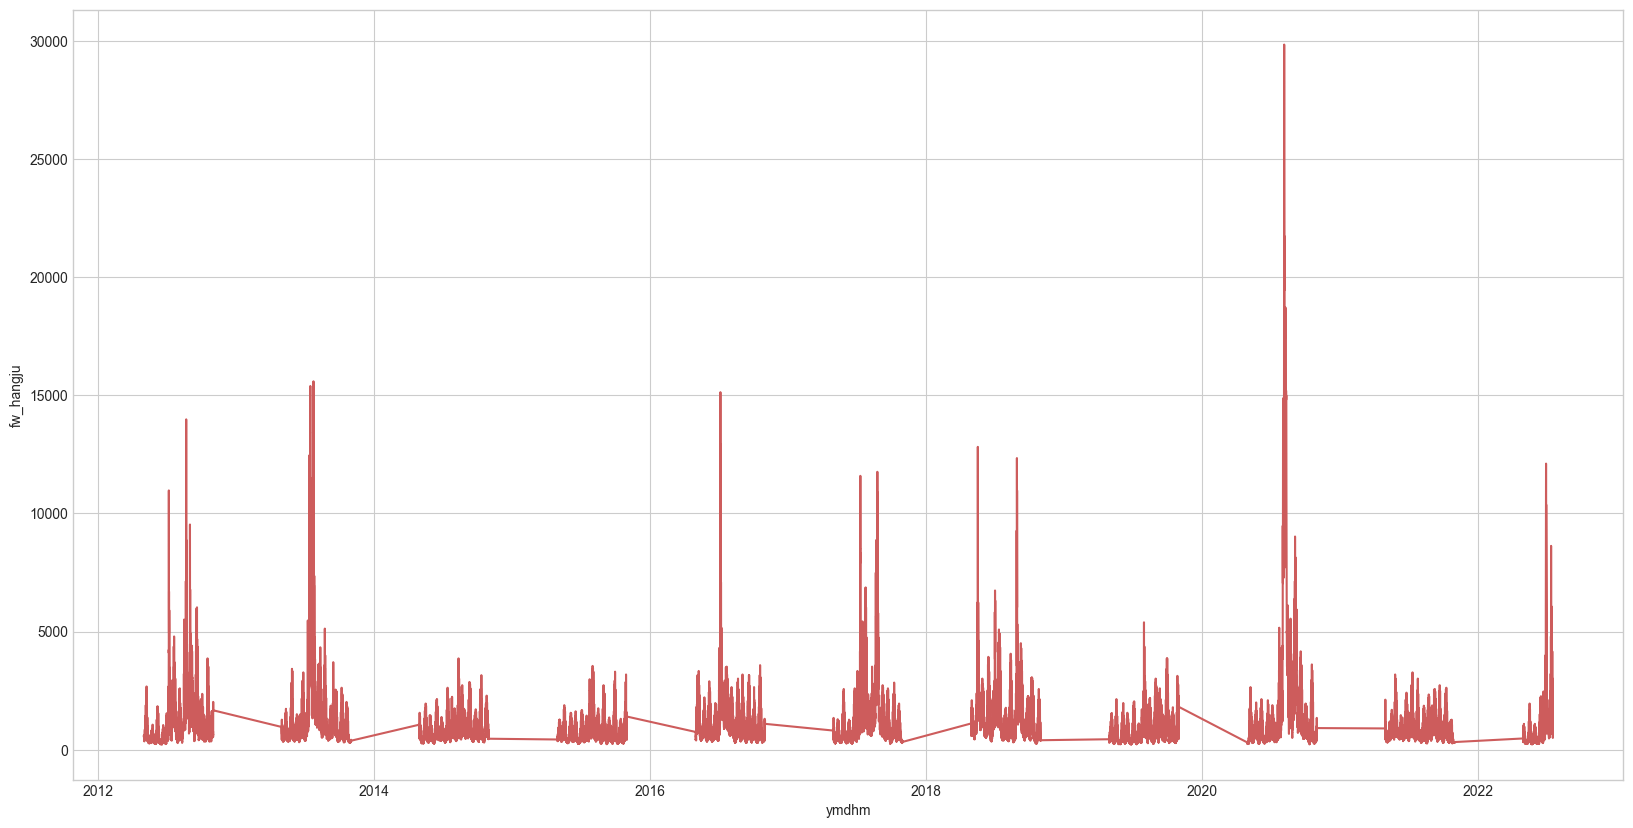

In [151]:
# line_slider(water_df, 'ymdhm', 'fw_hangju')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df['ymdhm'], y=water_df['fw_hangju'], ax=ax, color=random.choice(line_color))

In [152]:
water_df_fw_hangju =  water_df.loc[:, ['ymdhm','fw_hangju']]
water_df_fw_hangju[water_df_fw_hangju.fw_hangju.isnull()]
# 2017-06-26

,ymdhm,fw_hangju
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [153]:
water_df_fw_hangju.describe()


,fw_hangju
count,276277.000000
mean,1056.638736
std,1428.376321
min,212.040000
25%,449.120000
50%,679.420000
75%,1142.220000
max,29854.120000


In [154]:
# 마이너스 값 없음, 0 없음
water_df_fw_hangju[water_df_fw_hangju.fw_hangju < 0]

,ymdhm,fw_hangju


In [155]:
# 큰수도 연속적인 값들로 문제 없어 보임
water_df_fw_hangju[water_df_fw_hangju.fw_hangju > 20000]

,ymdhm,fw_hangju
225983,2020-08-06 07:50:00,20890.40
225984,2020-08-06 08:00:00,21902.22
225985,2020-08-06 08:10:00,22857.87
225986,2020-08-06 08:20:00,23752.19
225987,2020-08-06 08:30:00,24580.39
...,...,...
226148,2020-08-07 11:20:00,20813.58
226149,2020-08-07 11:30:00,20660.37
226150,2020-08-07 11:40:00,20507.74
226151,2020-08-07 11:50:00,20355.69


In [156]:
#결측치 채우기
water_df_fw_hangju = water_df_fw_hangju.set_index('ymdhm')
water_df_fw_hangju = water_df_fw_hangju.interpolate(method='time')
water_df_fw_hangju.reset_index(drop = False, inplace = True)
water_df_fw_hangju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ymdhm      276336 non-null  datetime64[ns]
 1   fw_hangju  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='ymdhm', ylabel='fw_hangju'>

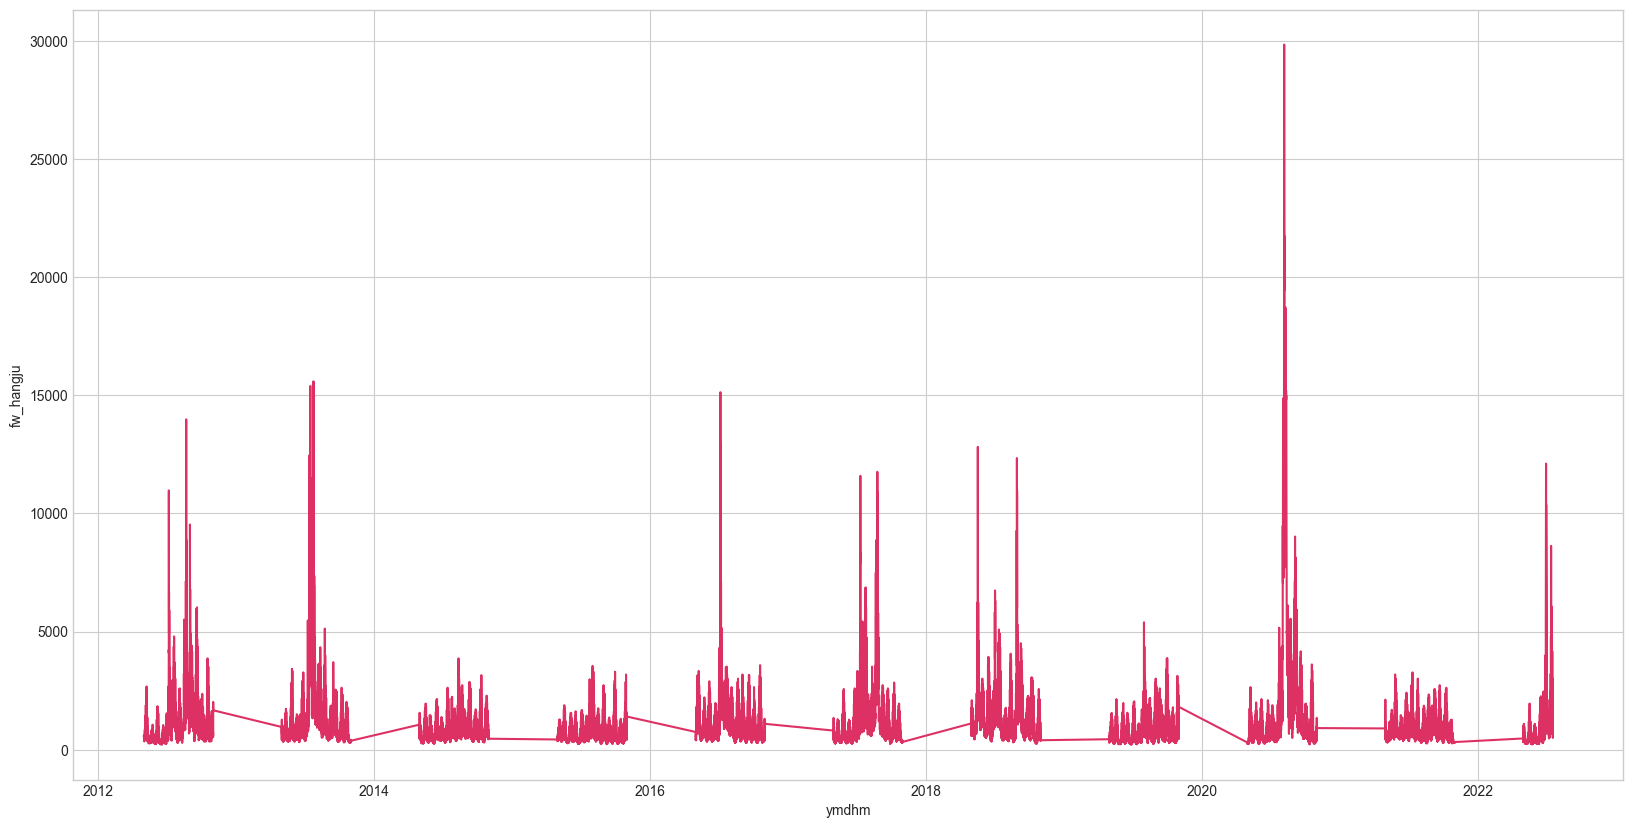

In [157]:
#결측치 처리후 그래프 확인
# line_slider(water_df_fw_hangju, 'ymdhm', 'fw_hangju')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=water_df_fw_hangju['ymdhm'], y=water_df_fw_hangju['fw_hangju'], ax=ax, color=random.choice(line_color))

#### 대곡교, 진관교, 송정교 수위데이터는 결측치 없음

In [158]:
rain_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ymdhm        276336 non-null  datetime64[ns]
 1   rf_deagok    276336 non-null  float64       
 2   rf_jingwan   276336 non-null  float64       
 3   rf_songjung  276336 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.4 MB


In [159]:
rain_df.describe()
#특이 데이터도 없어보임

,rf_deagok,rf_jingwan,rf_songjung
count,276336.000000,276336.000000,276336.000000
mean,0.034074,0.038265,0.035985
std,0.338607,0.370553,0.360769
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,24.000000,21.000000,24.000000


<AxesSubplot:xlabel='ymdhm', ylabel='rf_deagok'>

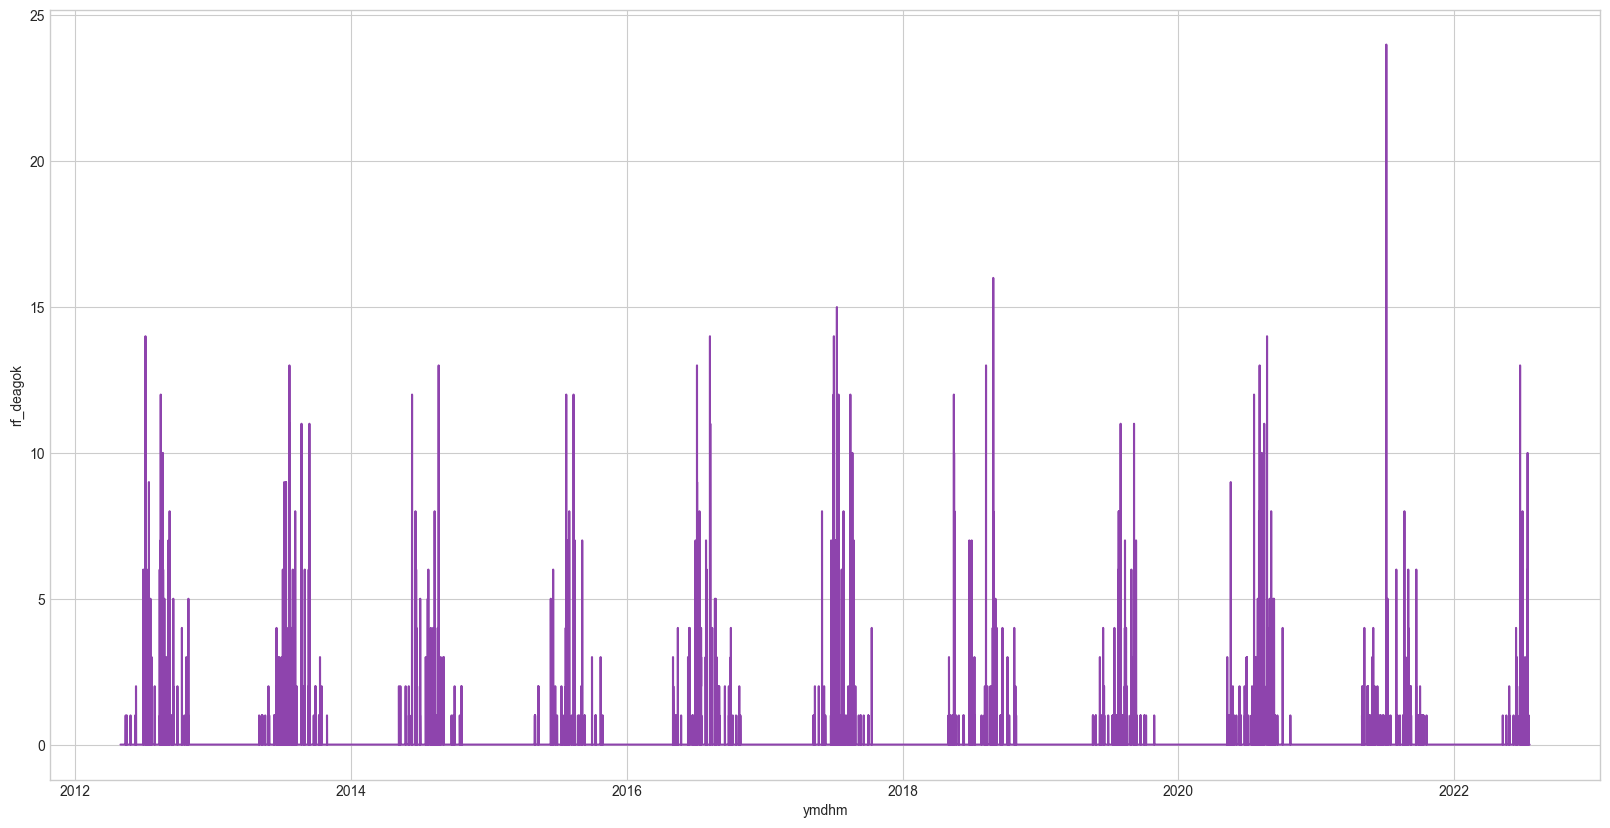

In [160]:
# 강수량 그래프 확인해보고싶으면 실행
# line_slider(rain_df, 'ymdhm', 'rf_deagok')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=rain_df['ymdhm'], y=rain_df['rf_deagok'], ax=ax, color=random.choice(line_color))

<AxesSubplot:xlabel='ymdhm', ylabel='rf_jingwan'>

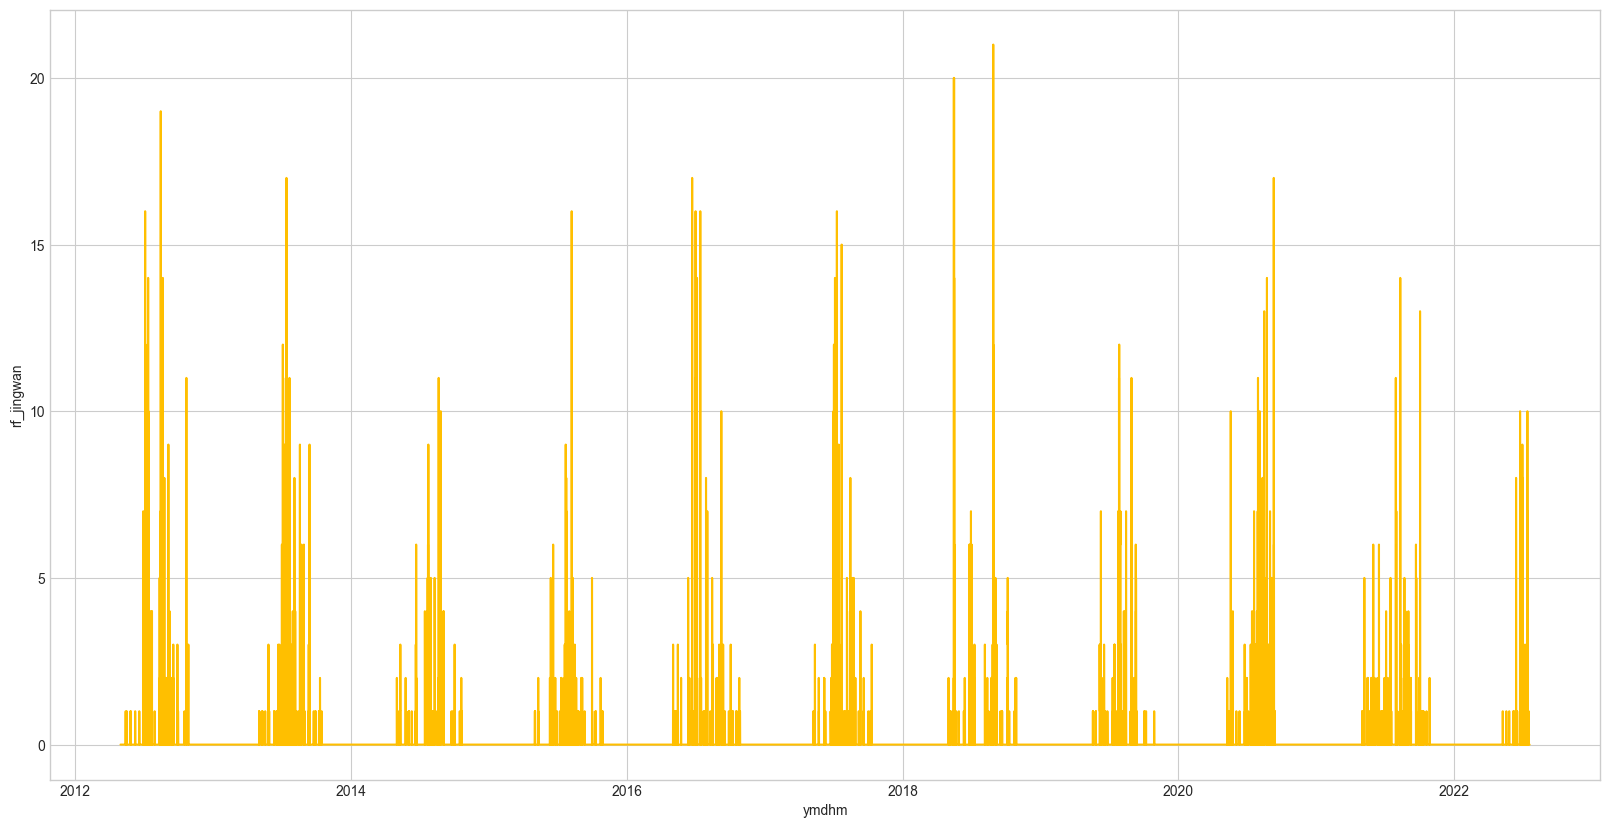

In [161]:
# line_slider(rain_df, 'ymdhm', 'rf_jingwan')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=rain_df['ymdhm'], y=rain_df['rf_jingwan'], ax=ax, color=random.choice(line_color))

<AxesSubplot:xlabel='ymdhm', ylabel='rf_songjung'>

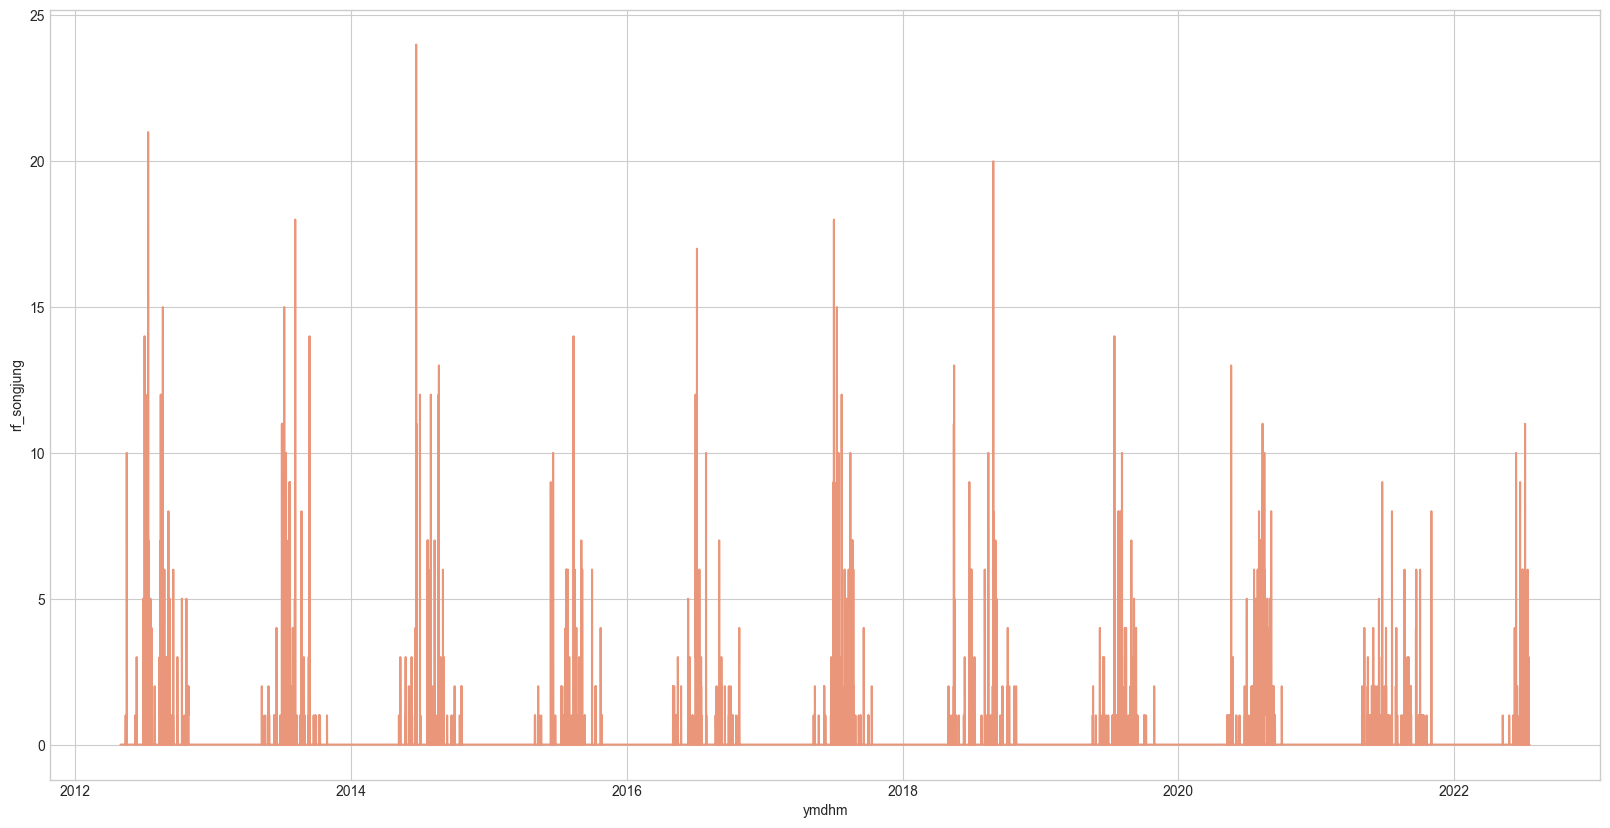

In [162]:
# line_slider(rain_df, 'ymdhm', 'rf_songjung')
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x=rain_df['ymdhm'], y=rain_df['rf_songjung'], ax=ax, color=random.choice(line_color))

### 수위 데이터와 강수량 데이터 합치기

In [163]:
# 1번파일 제외하고 ymdhm 컬럼 드랍
water_df_pal_inf = water_df_pal_inf.drop(['ymdhm'], axis=1)
water_df_pal_sfw = water_df_pal_sfw.drop(['ymdhm'], axis=1)
water_df_pal_ecpc = water_df_pal_ecpc.drop(['ymdhm'], axis=1)
water_df_pal_tototf = water_df_pal_tototf.drop(['ymdhm'], axis=1)
water_df_gangwha_tide_level = water_df_gangwha_tide_level.drop(['ymdhm'], axis=1)
water_df_wl_chungdam = water_df_wl_chungdam.drop(['ymdhm'], axis=1)
water_df_fw_chungdam = water_df_fw_chungdam.drop(['ymdhm'], axis=1)
water_df_wl_jamsu = water_df_wl_jamsu.drop(['ymdhm'], axis=1)
water_df_wl_hangang = water_df_wl_hangang.drop(['ymdhm'], axis=1)
water_df_fw_hangang = water_df_fw_hangang.drop(['ymdhm'], axis=1)
water_df_wl_hangju = water_df_wl_hangju.drop(['ymdhm'], axis=1)
water_df_fw_hangju = water_df_fw_hangju.drop(['ymdhm'], axis=1)


In [164]:
# 잠수교 유량(데이터없음) 제외하고 합체!
new_water_df = pd.concat( [water_df_pal_swl, water_df_pal_inf, water_df_pal_sfw, water_df_pal_ecpc, water_df_pal_tototf, water_df_gangwha_tide_level, water_df_wl_chungdam, water_df_fw_chungdam, water_df_wl_jamsu, water_df_wl_hangang, water_df_fw_hangang, water_df_wl_hangju, water_df_fw_hangju] ,axis=1)
new_water_df.head()

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18
2,2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,290.0,726.42,275.3,540.18
3,2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,290.0,726.42,276.3,552.17
4,2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,291.0,707.17,277.3,564.29


In [165]:
new_water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ymdhm               276336 non-null  datetime64[ns]
 1   pal_swl             276336 non-null  float64       
 2   pal_inf             276336 non-null  float64       
 3   pal_sfw             276336 non-null  float64       
 4   pal_ecpc            276336 non-null  float64       
 5   pal_tototf          276336 non-null  float64       
 6   gangwha_tide_level  276336 non-null  float64       
 7   wl_chungdam         276336 non-null  float64       
 8   fw_chungdam         276336 non-null  float64       
 9   wl_jamsu            276336 non-null  float64       
 10  wl_hangang          276336 non-null  float64       
 11  fw_hangang          276336 non-null  float64       
 12  wl_hangju           276336 non-null  float64       
 13  fw_hangju           276336 no

In [166]:
# 결측치 처리 파일과 강수량 파일 합체
temp_rain_df = rain_df.drop(['ymdhm'], axis=1)
df_origin = pd.concat([new_water_df, temp_rain_df] ,axis=1)
df_origin.head(2)

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju,rf_deagok,rf_jingwan,rf_songjung
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18,0.0,0.0,0.0


### Date feature 추가

In [167]:
# .dt.data → YYYY-MM-DD (문자)
# .dt.time → HH:MM:SS(문자)

df_origin.ymdhm = pd.to_datetime(df_origin['ymdhm'])
df_origin['year'] = df_origin.ymdhm.dt.year   
df_origin['month'] = df_origin.ymdhm.dt.month # .dt.month_name 월(문자)
df_origin['day'] = df_origin.ymdhm.dt.day
df_origin['hour'] = df_origin.ymdhm.dt.hour   
df_origin['minute'] = df_origin.ymdhm.dt.minute
df_origin['dow'] = df_origin.ymdhm.dt.dayofweek  # = .dt.weekday  → 0 - 월, 1 - 화

### 광진교 수위 데이터 추가

In [168]:
#광진교 데이터
path_gj = './data/wl_gwangjin/'

wl_gwangjin = os.listdir(path_gj)
wl_gwangjin_py = [file for file in wl_gwangjin if file.endswith('.csv')] 

In [169]:
wl_gwangjin_df = pd.DataFrame()
for i in wl_gwangjin_py:
    data3 = pd.read_csv(path_gj + i)
    wl_gwangjin_df = pd.concat([wl_gwangjin_df,data3])
    
df_gwangjin = wl_gwangjin_df.reset_index(drop = True)

#### 수위데이터만 사용

In [170]:
df_gwangjin = df_gwangjin[['ymdhm','wl']]
df_gwangjin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ymdhm   276336 non-null  object
 1   wl      276336 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


#### 데이터 타입변경

In [171]:
df_gwangjin['wl'] = pd.to_numeric(df_gwangjin['wl'], errors='coerce')
df_gwangjin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ymdhm   276336 non-null  object 
 1   wl      276277 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.2+ MB


#### OVERVIEW

In [172]:
df_gwangjin.describe()

,wl
count,276277.000000
mean,1.167963
std,0.348819
min,0.780000
25%,1.040000
50%,1.110000
75%,1.190000
max,8.220000


#### 결측치확인

In [173]:
df_gwangjin.isnull().sum()


ymdhm     0
wl       59
dtype: int64

In [174]:
df_gwangjin[df_gwangjin.wl.isnull()]
#연속적인 58개의 결측치와
#비 연속적인 1개의 결측치 확인

,ymdhm,wl
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [175]:
# 따로 떨어져있는 결측지 먼저 확인
df_gwangjin.loc[236075:236085]

,ymdhm,wl
236075,2020-10-15 09:50:00,1.07
236076,2020-10-15 10:00:00,1.07
236077,2020-10-15 10:10:00,1.07
236078,2020-10-15 10:20:00,1.07
236079,2020-10-15 10:30:00,1.07
236080,2020-10-15 10:40:00,NaN
236081,2020-10-15 10:50:00,1.07
236082,2020-10-15 11:00:00,1.07
236083,2020-10-15 11:10:00,1.07
236084,2020-10-15 11:20:00,1.07


In [176]:
# 결측치 채우기
df_gwangjin.loc[236080, 'wl'] = 1.07

In [177]:
# 연속된 결측치 주변 데이터 확인
df_gwangjin.loc[140609:140674]

,ymdhm,wl
140609,2017-06-26 10:50:00,0.98
140610,2017-06-26 11:00:00,0.98
140611,2017-06-26 11:10:00,0.98
140612,2017-06-26 11:20:00,0.98
140613,2017-06-26 11:30:00,NaN
...,...,...
140670,2017-06-26 21:00:00,NaN
140671,2017-06-26 21:10:00,0.99
140672,2017-06-26 21:20:00,0.99
140673,2017-06-26 21:30:00,0.99


In [178]:
# 남은 결측치 채우기
df_gwangjin.ymdhm = pd.to_datetime(df_gwangjin['ymdhm'])
df_gwangjin = df_gwangjin.set_index('ymdhm')
df_gwangjin = df_gwangjin.interpolate(method='time')
df_gwangjin.reset_index(drop = False, inplace = True)
df_gwangjin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ymdhm   276336 non-null  datetime64[ns]
 1   wl      276336 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 MB


### 기존 데이터에 광진교 수위 데이터 합치기

In [179]:
df_added_gwangjin = pd.concat([df_origin, df_gwangjin.wl], axis=1)
df_added_gwangjin.head(2)

,ymdhm,pal_swl,pal_inf,pal_sfw,pal_ecpc,pal_tototf,gangwha_tide_level,wl_chungdam,fw_chungdam,wl_jamsu,wl_hangang,fw_hangang,wl_hangju,fw_hangju,rf_deagok,rf_jingwan,rf_songjung,year,month,day,hour,minute,dow,wl
0,2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18,0.0,0.0,0.0,2012,5,1,0,0,1,1.2
1,2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18,0.0,0.0,0.0,2012,5,1,0,10,1,1.2


### 결측치 처리한 데이터 스케일링 준비
- 가장 점수가 좋은 MIMMAX 스케일링 사용

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = pd.read_csv('./data/df_origin.csv')
df_g = pd.read_csv('./data/df_gwangjin_added.csv')

### 평가지표 준비

In [181]:
def metric(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    if r2 < 0:
        r2 = 999
    return rmse / r2

evaluation_metric = metric

## 모델선택, 학습 및 파라메터 튜닝

- 모델선택 및 파레메터 튜닝은 파이캐럿, 옵튜나, 딥러닝, 커스텀파라메터를 이용해 좀더 나은 성능을 내는 모델과 파라메터를 선택하는 방향으로 진행하였음

### 청담대교

- 모델 : 랜덤포레스트, 모델특성상 학습할때마다 점수가 조금씩 차이남
- 꽤 여러 파라메터 값 시도하였으나 default 값이 가장 좋은점수를 기록
- 잠수교, 한강대교에 비해 초반 점수가 좋게 나온관계로 테스트 사이즈 값을 제외하고 상대적으로 파라메터 튜닝의 방향성을 잡을 시간이 부족했음
- 테스트 사이즈 값에따라 성능이 크게 차이남 0.19(사용) 와 0.002가 가장 좋은 점수집단을 기록
- 팔당댐 현재수위, 유립량, 저수량, 공용량, 총방류량 데이터 DROP
- 광진교 수위 데이터 추가
- 각 예측시간 10분 ~ 90분전 데이터까지 학습에 이용해 80분 단위로 예측 
- colab 사용


In [182]:
# 청담 제출은 이거
bridge = 'wl_chungdam'
model_nm = 'RandomForestRegressor'
model = RandomForestRegressor()
str_idx  = 269423
gap_num = 8
empty_df = pd.DataFrame()

try:
    while str_idx < 276335:
        print(str_idx)
        X = df_g.drop(columns = ['pal_swl',    'pal_inf',  'pal_sfw',  'pal_ecpc', 'pal_tototf','wl_chungdam','wl_hangju',    'fw_hangju'])
        y = df_g[['ymdhm', 'wl_chungdam']] 
        X1 = X.drop(columns = 'ymdhm')
        y1 = X.ymdhm
        X_scaler = scaler.fit_transform(X1)
        X_sc = pd.DataFrame(X_scaler) # column 명 없음
        X_sc = pd.DataFrame(X_scaler) # column 명 없음
        X_sc.columns = [ 'gangwha_tide_level',  
                  'fw_chungdam',  'wl_jamsu', 'wl_hangang',   'fw_hangang',   
                  'rf_deagok',    'rf_jingwan',   'rf_songjung', 'wl_gwangjin',
                  'year', 'month',    'day',  'hour', 'minute',   'dow']                
        X = pd.concat([y1, X_sc], axis=1)
        X_tv = X.loc[0:str_idx]
        X_test = X.loc[str_idx + 1:str_idx + gap_num]
        y_tv = y.loc[0:str_idx]
        y_test = y.loc[str_idx + 1:str_idx + gap_num]
        X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.19,
                                                          random_state=42)
        X_train = X_train.drop(columns = ['ymdhm'])
        y_train = y_train.drop(columns = ['ymdhm'])
        X_val = X_val.drop(columns = ['ymdhm'])
        y_val = y_val.drop(columns = ['ymdhm'])
        print("\nFitting RandomForestRegressor()...")
        model.fit(X_train, y_train)
        print("Prediction")
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        train_score = evaluation_metric(y_train, pred_train)
        val_score = evaluation_metric(y_val, pred_val)

        print("Train Score : %.4f" % train_score)
        print("Val Score : %.4f" % val_score)
        print("Test Prediction")
        X_test = X_test.drop(columns='ymdhm')
        pred_test = model.predict(X_test)
        y_test = y_test.drop(columns='ymdhm')
        test_score = evaluation_metric(y_test, pred_test)
        print("Test Score : %.4f" % test_score)
        preds_chung = pd.DataFrame(pred_test)
        preds_chung.rename(columns={0:'wl_1018662'}, inplace=True)

        k = pd.concat([preds_chung, y_test.reset_index(drop=True)], axis=1)
        empty_df = pd.concat((empty_df,k),sort=False)
        print(empty_df.reset_index(drop=True))

        total_test_score = evaluation_metric(empty_df.wl_chungdam, empty_df.wl_1018662  )
        print("total_Test Score : %.4f" % total_test_score)


        str_idx += gap_num
except:
    pass
        
empty_df.to_csv(f'./data/pred_tests/{bridge}_{total_test_score}_{model_nm}_pred_test_code.csv' , index = False)
joblib.dump(model, f'./data/models/{bridge}_{total_test_score}_{model_nm}_code.pkl')

269423

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1402
Val Score : 0.3875
Test Prediction
Test Score : 0.3077
   wl_1018662  wl_chungdam
0       278.7        279.0
1       280.7        281.0
2       283.7        284.0
3       284.7        285.0
4       283.7        284.0
5       283.7        284.0
6       283.7        284.0
7       281.7        282.0
total_Test Score : 0.3077
269431

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1382
Val Score : 0.3762
Test Prediction
Test Score : 0.3060
    wl_1018662  wl_chungdam
0       278.70        279.0
1       280.70        281.0
2       283.70        284.0
3       284.70        285.0
4       283.70        284.0
5       283.70        284.0
6       283.70        284.0
7       281.70        282.0
8       280.76        281.0
9       279.70        280.0
10      277.70        278.0
11      275.70        276.0
12      274.69        275.0
13      273.65        274.0
14      274.70        275.0
15      274.70        2


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1403
Val Score : 0.3524
Test Prediction
Test Score : 0.3065
    wl_1018662  wl_chungdam
0        278.7        279.0
1        280.7        281.0
2        283.7        284.0
3        284.7        285.0
4        283.7        284.0
..         ...          ...
75       311.7        312.0
76       311.7        312.0
77       308.7        309.0
78       308.7        309.0
79       306.7        307.0

[80 rows x 2 columns]
total_Test Score : 1.3393
269503

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1419
Val Score : 0.3553
Test Prediction
Test Score : 0.2927
    wl_1018662  wl_chungdam
0        278.7        279.0
1        280.7        281.0
2        283.7        284.0
3        284.7        285.0
4        283.7        284.0
..         ...          ...
83       300.7        301.0
84       296.7        297.0
85       296.7        297.0
86       293.7        294.0
87       291.7        292.0

[88 rows x 2 columns]
tot


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1400
Val Score : 0.3683
Test Prediction
Test Score : 0.1923
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
203     296.877        297.0
204     307.700        308.0
205     311.790        312.0
206     320.700        321.0
207     326.763        327.0

[208 rows x 2 columns]
total_Test Score : 0.9662
269631

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1364
Val Score : 0.3716
Test Prediction
Test Score : 0.2735
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
211     344.700        345.0
212     345.829        346.0
213     342.700        343.0
214     339.700        340.0
215     335.700        336.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1398
Val Score : 0.3713
Test Prediction
Test Score : 0.0010
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
331     267.607        268.0
332     267.534        269.0
333     267.614        269.0
334     267.798        267.0
335     268.298        267.0

[336 rows x 2 columns]
total_Test Score : 0.9710
269759

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1426
Val Score : 0.3600
Test Prediction
Test Score : 2.1828
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
339     274.814        276.0
340     274.824        276.0
341     276.910        277.0
342     277.997        278.0
343     277.997        278.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1402
Val Score : 0.3709
Test Prediction
Test Score : 3.1324
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
459     271.176        271.0
460     271.641        271.0
461     271.695        272.0
462     271.470        272.0
463     271.427        272.0

[464 rows x 2 columns]
total_Test Score : 0.9214
269887

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1416
Val Score : 0.3780
Test Prediction
Test Score : 1.8667
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
467     268.342        270.0
468     268.396        268.0
469     268.197        267.0
470     268.052        266.0
471     268.083        267.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1425
Val Score : 0.3663
Test Prediction
Test Score : 0.0009
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
587     272.217        272.0
588     271.912        272.0
589     271.663        273.0
590     273.024        273.0
591     272.994        274.0

[592 rows x 2 columns]
total_Test Score : 0.9871
270015

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1398
Val Score : 0.3807
Test Prediction
Test Score : 2.6559
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
595     277.000        277.0
596     272.229        275.0
597     271.500        274.0
598     270.894        272.0
599     270.559        271.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1415
Val Score : 0.3755
Test Prediction
Test Score : 0.0012
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
715     270.018        271.0
716     269.877        271.0
717     269.146        271.0
718     269.113        271.0
719     269.196        270.0

[720 rows x 2 columns]
total_Test Score : 1.1606
270143

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1420
Val Score : 0.3773
Test Prediction
Test Score : 0.0022
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
723     270.740        268.0
724     270.572        269.0
725     270.423        271.0
726     269.327        273.0
727     269.753        273.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1398
Val Score : 0.3677
Test Prediction
Test Score : 0.0021
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
843     265.770        265.0
844     266.068        264.0
845     265.273        264.0
846     266.238        265.0
847     266.128        265.0

[848 rows x 2 columns]
total_Test Score : 1.3084
270271

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1384
Val Score : 0.3739
Test Prediction
Test Score : 0.0014
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
851     264.776        265.0
852     264.863        263.0
853     264.975        263.0
854     264.998        263.0
855     264.975        263.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1420
Val Score : 0.3879
Test Prediction
Test Score : 9.3855
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
971     272.042        272.0
972     272.215        270.0
973     272.421        269.0
974     272.501        268.0
975     272.120        267.0

[976 rows x 2 columns]
total_Test Score : 1.4126
270399

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1424
Val Score : 0.3601
Test Prediction
Test Score : 0.0017
     wl_1018662  wl_chungdam
0       278.700        279.0
1       280.700        281.0
2       283.700        284.0
3       284.700        285.0
4       283.700        284.0
..          ...          ...
979     271.033        269.0
980     270.907        270.0
981     270.797        270.0
982     270.504        270.0
983     270.188        269.0




Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1420
Val Score : 0.3739
Test Prediction
Test Score : 0.3558
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1099     289.985        290.0
1100     292.946        293.0
1101     292.946        293.0
1102     290.997        291.0
1103     288.973        289.0

[1104 rows x 2 columns]
total_Test Score : 1.5057
270527

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1432
Val Score : 0.3647
Test Prediction
Test Score : 0.5270
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1107     282.916        283.0
1108     275.991        276.0
1109     271.068        270.0
1110     271.134        271.0
1111  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1406
Val Score : 0.3913
Test Prediction
Test Score : 6.9127
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1227     270.082        269.0
1228     269.387        267.0
1229     269.270        267.0
1230     269.359        267.0
1231     269.213        267.0

[1232 rows x 2 columns]
total_Test Score : 1.5299
270655

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1414
Val Score : 0.3743
Test Prediction
Test Score : 0.0034
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1235     266.248        272.0
1236     266.237        272.0
1237     267.194        271.0
1238     267.773        269.0
1239  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1451
Val Score : 0.3723
Test Prediction
Test Score : 1.6627
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1355     270.582        273.0
1356     269.394        272.0
1357     267.540        268.0
1358     270.181        268.0
1359     268.074        268.0

[1360 rows x 2 columns]
total_Test Score : 1.5076
270783

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1441
Val Score : 0.3725
Test Prediction
Test Score : 0.9450
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
1363       277.0        277.0
1364       277.0        277.0
1365       278.0        278.0
1366       277.0        277.0
1367  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1445
Val Score : 0.3864
Test Prediction
Test Score : 0.6410
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1483     285.991        286.0
1484     282.000        282.0
1485     277.000        277.0
1486     272.248        274.0
1487     273.380        273.0

[1488 rows x 2 columns]
total_Test Score : 1.5424
270911

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1391
Val Score : 0.3844
Test Prediction
Test Score : 0.7640
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1491     284.000        284.0
1492     284.000        284.0
1493     287.000        287.0
1494     288.904        289.0
1495  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1434
Val Score : 0.3726
Test Prediction
Test Score : 0.0011
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1611     263.318        264.0
1612     263.814        264.0
1613     263.944        264.0
1614     264.334        264.0
1615     264.214        264.0

[1616 rows x 2 columns]
total_Test Score : 1.5666
271039

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1388
Val Score : 0.3771
Test Prediction
Test Score : 6.7936
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1619     267.878        264.0
1620     270.268        264.0
1621     271.405        264.0
1622     273.572        272.0
1623  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1439
Val Score : 0.4013
Test Prediction
Test Score : 0.0012
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1739     272.125        273.0
1740     272.283        274.0
1741     271.918        273.0
1742     272.214        274.0
1743     270.950        272.0

[1744 rows x 2 columns]
total_Test Score : 1.5905
271167

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1426
Val Score : 0.3783
Test Prediction
Test Score : 0.0013
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1747     273.866        275.0
1748     273.336        274.0
1749     273.864        275.0
1750     273.841        275.0
1751  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1422
Val Score : 0.3927
Test Prediction
Test Score : 0.0523
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1867     296.976        297.0
1868     294.910        295.0
1869     293.928        294.0
1870     291.988        292.0
1871     289.994        290.0

[1872 rows x 2 columns]
total_Test Score : 1.5325
271295

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1437
Val Score : 0.3838
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
1875       284.0        284.0
1876       284.0        284.0
1877       284.0        284.0
1878       285.0        285.0
1879  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1424
Val Score : 0.3901
Test Prediction
Test Score : 0.1853
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
1995     307.757        308.0
1996     313.700        314.0
1997     317.700        318.0
1998     321.862        322.0
1999     323.874        324.0

[2000 rows x 2 columns]
total_Test Score : 1.4816
271423

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1436
Val Score : 0.3730
Test Prediction
Test Score : 0.2040
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2003     314.859        315.0
2004     309.703        310.0
2005     301.850        302.0
2006     297.970        298.0
2007  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1413
Val Score : 0.3781
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2123       290.0        290.0
2124       290.0        290.0
2125       289.0        289.0
2126       288.0        288.0
2127       287.0        287.0

[2128 rows x 2 columns]
total_Test Score : 1.4338
271551

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1442
Val Score : 0.3506
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2131       286.0        286.0
2132       286.0        286.0
2133       285.0        285.0
2134       284.0        284.0
2135  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1446
Val Score : 0.3868
Test Prediction
Test Score : 0.1811
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2251     320.805        321.0
2252     318.880        319.0
2253     317.970        318.0
2254     315.880        316.0
2255     313.829        314.0

[2256 rows x 2 columns]
total_Test Score : 1.3914
271679

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1411
Val Score : 0.3806
Test Prediction
Test Score : 0.0764
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2259     306.991        307.0
2260     305.955        306.0
2261     303.970        304.0
2262     297.976        298.0
2263  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1399
Val Score : 0.3992
Test Prediction
Test Score : 0.2404
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2379     379.700        380.0
2380     372.889        373.0
2381     366.700        367.0
2382     362.745        363.0
2383     359.700        360.0

[2384 rows x 2 columns]
total_Test Score : 1.3531
271807

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1399
Val Score : 0.3772
Test Prediction
Test Score : 0.1912
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2387     351.817        352.0
2388     347.877        348.0
2389     344.781        345.0
2390     340.880        341.0
2391  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1432
Val Score : 0.3715
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2507       290.0        290.0
2508       290.0        290.0
2509       287.0        287.0
2510       285.0        285.0
2511       293.0        293.0

[2512 rows x 2 columns]
total_Test Score : 1.3182
271935

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1431
Val Score : 0.4010
Test Prediction
Test Score : 0.1931
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2515     354.988        355.0
2516     365.763        366.0
2517     375.799        376.0
2518     383.700        384.0
2519  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1459
Val Score : 0.3843
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2635       279.0        279.0
2636       278.0        278.0
2637       278.0        278.0
2638       278.0        278.0
2639       278.0        278.0

[2640 rows x 2 columns]
total_Test Score : 1.2857
272063

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1418
Val Score : 0.3858
Test Prediction
Test Score : 0.0021
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
2643     278.000        278.0
2644     277.000        277.0
2645     277.000        277.0
2646     276.000        276.0
2647  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1413
Val Score : 0.3960
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2763       291.0        291.0
2764       289.0        289.0
2765       287.0        287.0
2766       284.0        284.0
2767       283.0        283.0

[2768 rows x 2 columns]
total_Test Score : 1.2622
272191

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1439
Val Score : 0.3721
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2771       282.0        282.0
2772       282.0        282.0
2773       282.0        282.0
2774       282.0        282.0
2775  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1424
Val Score : 0.3608
Test Prediction
Test Score : 0.5450
      wl_1018662  wl_chungdam
0         278.70        279.0
1         280.70        281.0
2         283.70        284.0
3         284.70        285.0
4         283.70        284.0
...          ...          ...
2891      275.93        276.0
2892      280.00        280.0
2893      287.00        287.0
2894      291.00        291.0
2895      293.00        293.0

[2896 rows x 2 columns]
total_Test Score : 1.2361
272319

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1405
Val Score : 0.3960
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
2899       282.0        282.0
2900       278.0        278.0
2901       276.0        276.0
2902       275.0        275.0
2903  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1437
Val Score : 0.3751
Test Prediction
Test Score : 0.2707
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3019     273.872        274.0
3020     274.871        275.0
3021     273.606        274.0
3022     273.660        274.0
3023     273.020        273.0

[3024 rows x 2 columns]
total_Test Score : 1.2159
272447

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1431
Val Score : 0.4163
Test Prediction
Test Score : 0.0010
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3027     271.447        273.0
3028     271.393        272.0
3029     271.370        272.0
3030     270.828        272.0
3031  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1429
Val Score : 0.3679
Test Prediction
Test Score : 0.0021
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3147     269.697        268.0
3148     269.788        268.0
3149     269.468        269.0
3150     269.371        270.0
3151     268.901        270.0

[3152 rows x 2 columns]
total_Test Score : 1.2383
272575

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1390
Val Score : 0.3949
Test Prediction
Test Score : 0.0021
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3155     268.473        270.0
3156     268.580        271.0
3157     268.350        271.0
3158     266.724        270.0
3159  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1421
Val Score : 0.3795
Test Prediction
Test Score : 0.1071
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3275     321.982        322.0
3276     320.715        321.0
3277     319.976        320.0
3278     321.979        322.0
3279     322.973        323.0

[3280 rows x 2 columns]
total_Test Score : 1.2289
272703

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1438
Val Score : 0.3820
Test Prediction
Test Score : 0.1781
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3283     339.829        340.0
3284     342.727        343.0
3285     345.736        346.0
3286     349.820        350.0
3287  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1418
Val Score : 0.4030
Test Prediction
Test Score : 0.0877
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3403     385.907        386.0
3404     385.907        386.0
3405     384.889        385.0
3406     385.910        386.0
3407     382.979        383.0

[3408 rows x 2 columns]
total_Test Score : 1.2049
272831

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1420
Val Score : 0.4200
Test Prediction
Test Score : 0.0869
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3411     381.868        382.0
3412     381.868        382.0
3413     379.865        380.0
3414     376.946        377.0
3415  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1421
Val Score : 0.3779
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
3531       301.0        301.0
3532       299.0        299.0
3533       298.0        298.0
3534       297.0        297.0
3535       297.0        297.0

[3536 rows x 2 columns]
total_Test Score : 1.1830
272959

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1403
Val Score : 0.3976
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
3539       298.0        298.0
3540       300.0        300.0
3541       299.0        299.0
3542       300.0        300.0
3543  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1434
Val Score : 0.3807
Test Prediction
Test Score : 0.0190
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3659     314.976        315.0
3660     314.970        315.0
3661     311.000        311.0
3662     308.000        308.0
3663     305.000        305.0

[3664 rows x 2 columns]
total_Test Score : 1.1621
273087

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1424
Val Score : 0.3731
Test Prediction
Test Score : 0.0090
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
3667       306.0        306.0
3668       304.0        304.0
3669       304.0        304.0
3670       303.0        303.0
3671  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1423
Val Score : 0.3784
Test Prediction
Test Score : 0.0952
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3787     331.913        332.0
3788     337.952        338.0
3789     343.940        344.0
3790     347.787        348.0
3791     350.883        351.0

[3792 rows x 2 columns]
total_Test Score : 1.1424
273215

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1427
Val Score : 0.3770
Test Prediction
Test Score : 0.1081
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
3795     365.979        366.0
3796     363.940        364.0
3797     360.982        361.0
3798     355.997        356.0
3799  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1399
Val Score : 0.3909
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
3915       288.0        288.0
3916       288.0        288.0
3917       288.0        288.0
3918       288.0        288.0
3919       288.0        288.0

[3920 rows x 2 columns]
total_Test Score : 1.1235
273343

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1435
Val Score : 0.3996
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
3923       287.0        287.0
3924       288.0        288.0
3925       287.0        287.0
3926       288.0        288.0
3927  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1418
Val Score : 0.3876
Test Prediction
Test Score : 0.0634
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4043     332.904        333.0
4044     332.889        333.0
4045     331.988        332.0
4046     331.988        332.0
4047     331.985        332.0

[4048 rows x 2 columns]
total_Test Score : 1.1057
273471

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1452
Val Score : 0.3865
Test Prediction
Test Score : 0.0098
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4051     332.985        333.0
4052     332.985        333.0
4053     331.994        332.0
4054     331.994        332.0
4055  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1441
Val Score : 0.3785
Test Prediction
Test Score : 0.1054
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4171     389.901        390.0
4172     390.994        391.0
4173     390.994        391.0
4174     389.904        390.0
4175     390.994        391.0

[4176 rows x 2 columns]
total_Test Score : 1.0887
273599

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1443
Val Score : 0.3623
Test Prediction
Test Score : 0.0346
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4179     388.970        389.0
4180     387.955        388.0
4181     387.955        388.0
4182     386.958        387.0
4183  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1482
Val Score : 0.3605
Test Prediction
Test Score : 12.2585
      wl_1018662  wl_chungdam
0         278.70        279.0
1         280.70        281.0
2         283.70        284.0
3         284.70        285.0
4         283.70        284.0
...          ...          ...
4299      867.52        872.0
4300      871.54        879.0
4301      874.99        884.0
4302      877.75        887.0
4303      882.55        891.0

[4304 rows x 2 columns]
total_Test Score : 1.2070
273727

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1410
Val Score : 0.3952
Test Prediction
Test Score : 0.0086
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4307     905.173        909.0
4308     901.240        911.0
4309     904.590        915.0
4310     913.670        915.0
4311 


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1469
Val Score : 0.3823
Test Prediction
Test Score : 0.2990
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4427     510.700        511.0
4428     507.700        508.0
4429     505.700        506.0
4430     504.718        505.0
4431     502.700        503.0

[4432 rows x 2 columns]
total_Test Score : 1.4160
273855

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1464
Val Score : 0.3934
Test Prediction
Test Score : 0.2771
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4435     494.757        495.0
4436     492.772        493.0
4437     490.700        491.0
4438     488.700        489.0
4439  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1460
Val Score : 0.3963
Test Prediction
Test Score : 0.0843
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4555     389.958        390.0
4556     388.000        388.0
4557     386.000        386.0
4558     383.859        384.0
4559     380.985        381.0

[4560 rows x 2 columns]
total_Test Score : 1.3963
273983

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1465
Val Score : 0.4004
Test Prediction
Test Score : 0.0835
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4563     372.979        373.0
4564     370.883        371.0
4565     368.979        369.0
4566     365.997        366.0
4567  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1478
Val Score : 0.3850
Test Prediction
Test Score : 0.0319
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4683     403.000        403.0
4684     396.940        397.0
4685     391.943        392.0
4686     388.000        388.0
4687     385.988        386.0

[4688 rows x 2 columns]
total_Test Score : 1.3771
274111

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1476
Val Score : 0.3686
Test Prediction
Test Score : 0.0703
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4691     375.943        376.0
4692     374.859        375.0
4693     372.994        373.0
4694     369.994        370.0
4695  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1483
Val Score : 0.3926
Test Prediction
Test Score : 0.0024
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4811     330.000        330.0
4812     330.000        330.0
4813     330.000        330.0
4814     328.994        329.0
4815     334.000        334.0

[4816 rows x 2 columns]
total_Test Score : 1.3587
274239

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1481
Val Score : 0.3938
Test Prediction
Test Score : 0.1032
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
4819     394.904        395.0
4820     403.000        403.0
4821     410.000        410.0
4822     415.874        416.0
4823  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1458
Val Score : 0.3715
Test Prediction
Test Score : 0.0011
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
4939       319.0        319.0
4940       319.0        319.0
4941       318.0        318.0
4942       318.0        318.0
4943       318.0        318.0

[4944 rows x 2 columns]
total_Test Score : 1.3410
274367

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1485
Val Score : 0.3858
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
4947       317.0        317.0
4948       318.0        318.0
4949       318.0        318.0
4950       318.0        318.0
4951  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1511
Val Score : 0.3913
Test Prediction
Test Score : 0.0011
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5067       325.0        325.0
5068       324.0        324.0
5069       324.0        324.0
5070       323.0        323.0
5071       323.0        323.0

[5072 rows x 2 columns]
total_Test Score : 1.3240
274495

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1468
Val Score : 0.3830
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5075       322.0        322.0
5076       321.0        321.0
5077       321.0        321.0
5078       321.0        321.0
5079  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1482
Val Score : 0.3956
Test Prediction
Test Score : 0.0056
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
5195     338.997        339.0
5196     341.000        341.0
5197     339.997        340.0
5198     338.997        339.0
5199     336.000        336.0

[5200 rows x 2 columns]
total_Test Score : 1.3076
274623

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1480
Val Score : 0.3876
Test Prediction
Test Score : 0.0018
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
5203     330.000        330.0
5204     330.000        330.0
5205     328.997        329.0
5206     328.997        329.0
5207  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1471
Val Score : 0.3901
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5323       311.0        311.0
5324       311.0        311.0
5325       311.0        311.0
5326       311.0        311.0
5327       311.0        311.0

[5328 rows x 2 columns]
total_Test Score : 1.2918
274751

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1464
Val Score : 0.3849
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5331       310.0        310.0
5332       310.0        310.0
5333       310.0        310.0
5334       310.0        310.0
5335  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1534
Val Score : 0.3743
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5451       299.0        299.0
5452       299.0        299.0
5453       299.0        299.0
5454       299.0        299.0
5455       298.0        298.0

[5456 rows x 2 columns]
total_Test Score : 1.2766
274879

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1472
Val Score : 0.3935
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5459       299.0        299.0
5460       299.0        299.0
5461       299.0        299.0
5462       299.0        299.0
5463  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1471
Val Score : 0.4086
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5579       298.0        298.0
5580       298.0        298.0
5581       298.0        298.0
5582       298.0        298.0
5583       299.0        299.0

[5584 rows x 2 columns]
total_Test Score : 1.2618
275007

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1469
Val Score : 0.3776
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5587       300.0        300.0
5588       299.0        299.0
5589       298.0        298.0
5590       298.0        298.0
5591  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1484
Val Score : 0.3960
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5707       297.0        297.0
5708       297.0        297.0
5709       297.0        297.0
5710       297.0        297.0
5711       297.0        297.0

[5712 rows x 2 columns]
total_Test Score : 1.2476
275135

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1490
Val Score : 0.3817
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5715       296.0        296.0
5716       296.0        296.0
5717       297.0        297.0
5718       300.0        300.0
5719  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1490
Val Score : 0.3781
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5835       322.0        322.0
5836       322.0        322.0
5837       322.0        322.0
5838       321.0        321.0
5839       322.0        322.0

[5840 rows x 2 columns]
total_Test Score : 1.2339
275263

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1453
Val Score : 0.3696
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
5843       321.0        321.0
5844       322.0        322.0
5845       325.0        325.0
5846       325.0        325.0
5847  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1445
Val Score : 0.4013
Test Prediction
Test Score : 0.0502
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
5963     383.000        383.0
5964     379.955        380.0
5965     377.988        378.0
5966     373.994        374.0
5967     371.922        372.0

[5968 rows x 2 columns]
total_Test Score : 1.2206
275391

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1470
Val Score : 0.3697
Test Prediction
Test Score : 0.0076
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
5971     361.000        361.0
5972     357.979        358.0
5973     356.000        356.0
5974     355.000        355.0
5975  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1501
Val Score : 0.3750
Test Prediction
Test Score : 0.1448
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6091     407.000        407.0
6092     420.994        421.0
6093     433.973        434.0
6094     444.700        445.0
6095     454.757        455.0

[6096 rows x 2 columns]
total_Test Score : 1.2077
275519

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1472
Val Score : 0.3718
Test Prediction
Test Score : 0.2101
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6099     468.700        469.0
6100     465.700        466.0
6101     463.886        464.0
6102     460.871        461.0
6103  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1459
Val Score : 0.3840
Test Prediction
Test Score : 0.2202
      wl_1018662  wl_chungdam
0         278.70        279.0
1         280.70        281.0
2         283.70        284.0
3         284.70        285.0
4         283.70        284.0
...          ...          ...
6219      526.70        527.0
6220      525.88        526.0
6221      525.88        526.0
6222      525.88        526.0
6223      524.70        525.0

[6224 rows x 2 columns]
total_Test Score : 1.1955
275647

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1473
Val Score : 0.3771
Test Prediction
Test Score : 0.1616
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6227     523.865        524.0
6228     523.865        524.0
6229     523.865        524.0
6230     523.865        524.0
6231  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1460
Val Score : 0.3790
Test Prediction
Test Score : 0.0144
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6347     422.000        422.0
6348     420.994        421.0
6349     419.000        419.0
6350     416.979        417.0
6351     415.976        416.0

[6352 rows x 2 columns]
total_Test Score : 1.1837
275775

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1463
Val Score : 0.3829
Test Prediction
Test Score : 0.0166
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6355     411.000        411.0
6356     410.000        410.0
6357     409.000        409.0
6358     407.985        408.0
6359  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1475
Val Score : 0.3627
Test Prediction
Test Score : 0.0437
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6475     419.000        419.0
6476     413.000        413.0
6477     407.979        408.0
6478     404.000        404.0
6479     401.961        402.0

[6480 rows x 2 columns]
total_Test Score : 1.1719
275903

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1454
Val Score : 0.4222
Test Prediction
Test Score : 0.0317
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6483     391.964        392.0
6484     390.000        390.0
6485     388.000        388.0
6486     386.000        386.0
6487  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1487
Val Score : 0.3742
Test Prediction
Test Score : 0.0000
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
6603       333.0        333.0
6604       335.0        335.0
6605       335.0        335.0
6606       335.0        335.0
6607       335.0        335.0

[6608 rows x 2 columns]
total_Test Score : 1.1606
276031

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1436
Val Score : 0.3950
Test Prediction
Test Score : 0.0521
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6611     357.937        358.0
6612     381.946        382.0
6613     397.925        398.0
6614     409.000        409.0
6615  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1467
Val Score : 0.3773
Test Prediction
Test Score : 0.0015
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
6731       346.0        346.0
6732       344.0        344.0
6733       342.0        342.0
6734       340.0        340.0
6735       339.0        339.0

[6736 rows x 2 columns]
total_Test Score : 1.1495
276159

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1458
Val Score : 0.3862
Test Prediction
Test Score : 0.0180
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6739     333.000        333.0
6740     332.000        332.0
6741     331.000        331.0
6742     328.949        329.0
6743  


Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1439
Val Score : 0.3739
Test Prediction
Test Score : 0.0205
      wl_1018662  wl_chungdam
0        278.700        279.0
1        280.700        281.0
2        283.700        284.0
3        284.700        285.0
4        283.700        284.0
...          ...          ...
6859     366.943        367.0
6860     362.997        363.0
6861     359.000        359.0
6862     355.000        355.0
6863     350.991        351.0

[6864 rows x 2 columns]
total_Test Score : 1.1388
276287

Fitting RandomForestRegressor()...
Prediction
Train Score : 0.1444
Val Score : 0.3979
Test Prediction
Test Score : 0.0011
      wl_1018662  wl_chungdam
0          278.7        279.0
1          280.7        281.0
2          283.7        284.0
3          284.7        285.0
4          283.7        284.0
...          ...          ...
6867       337.0        337.0
6868       334.0        334.0
6869       332.0        332.0
6870       330.0        330.0
6871  

OSError: Cannot save file into a non-existent directory: 'data\pred_tests'

### 잠수교
- 모델 : LGBMRegressor
- 파라메터 : 옵튜나, 파이캐럿을 이용해 기준을 잡고 마지막으로 커스텀 진행
- 청담대교 수위 데이터 DROP
- 각 예측시간 10분 ~ 90분전 데이터까지 학습에 이용해 80분 단위로 예측 
- colab 사용

In [ ]:
#잠수 제출
bridge = 'wl_jamsu'
model_nm = 'LGBMRegressor'

model = LGBMRegressor(
max_depth = 14,
n_estimators = 779,  
min_data = 110, 
learning_rate = 0.03, 
min_samples_split = 8, 
num_leaves = 38, 
colsample_bytree = 0.6807067601714794, 
subsample = 0.8592193583954507, 
subsample_freq = 7, 
min_child_samples = 21, 
max_bin = 451, 
bagging_fraction = 0.9855165501866038, 
bagging_f9req = 38,
verbose =  -1,
objective =  "regression",
boosting_type =  "gbdt"   
                        )

str_idx  = 269423
gap_num = 8
empty_df = pd.DataFrame()

try:
    while str_idx < 276335:
        print(str_idx)

        X = df.drop(columns = ['wl_jamsu','wl_chungdam'])
        y = df[['ymdhm', 'wl_jamsu']] 
        X1 = X.drop(columns = 'ymdhm')
        y1 = X.ymdhm
        X_scaler = scaler.fit_transform(X1)
        X_sc = pd.DataFrame(X_scaler) # column 명 없음
        X_sc.columns = ['pal_swl',	'pal_inf',	'pal_sfw',	'pal_ecpc',	'pal_tototf',	'gangwha_tide_level',
                       'fw_chungdam', 'wl_hangang',	'fw_hangang',	'wl_hangju',	'fw_hangju',
                    'rf_deagok',	'rf_jingwan',	'rf_songjung',
                    'year',	'month',	'day',	'hour',	'minute',	'dow']
      # X_sc.columns = ['pal_swl',	'pal_inf',	'pal_sfw',	'pal_ecpc',	'pal_tototf',	'gangwha_tide_level',
      #               'wl_chungdam',	'fw_chungdam', 'wl_hangang',	'fw_hangang',	'wl_hangju',	'fw_hangju',
      #               'rf_deagok',	'rf_jingwan',	'rf_songjung','wl_gwangjin',
      #               'year',	'month',	'day',	'hour',	'minute',	'dow']    
        X = pd.concat([y1, X_sc], axis=1)
        X_tv = X.loc[0:str_idx]
        X_test = X.loc[str_idx + 1:str_idx + gap_num]
        y_tv = y.loc[0:str_idx]
        y_test = y.loc[str_idx + 1:str_idx + gap_num]


        X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.3,
                                                          random_state=42
                                                        )
        X_train = X_train.drop(columns = ['ymdhm'])
        y_train = y_train.drop(columns = ['ymdhm'])
        X_val = X_val.drop(columns = ['ymdhm'])
        y_val = y_val.drop(columns = ['ymdhm'])
        print(f"\nFitting {model}...")
        model.fit(X_train, y_train)
        print("Prediction")
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        train_score = evaluation_metric(y_train, pred_train)
        val_score = evaluation_metric(y_val, pred_val)

        print("Train Score : %.4f" % train_score)
        print("Val Score : %.4f" % val_score)
        print("Test Prediction")
        X_test = X_test.drop(columns='ymdhm')
        pred_test = model.predict(X_test)
        y_test = y_test.drop(columns='ymdhm')
        test_score = evaluation_metric(y_test, pred_test)
        print("Test Score : %.4f" % test_score)
        preds_jam = pd.DataFrame(pred_test)
        preds_jam.rename(columns={0:'wl_1018680'}, inplace=True)
        k = pd.concat([preds_jam, y_test.reset_index(drop=True)], axis=1)
        empty_df = pd.concat((empty_df,k),sort=False)
        print(empty_df.reset_index(drop=True))

        total_test_score = evaluation_metric(empty_df.wl_jamsu, empty_df.wl_1018680  )
        print("total_Test Score : %.4f" % total_test_score)

        str_idx += gap_num
except:
    pass

empty_df.to_csv(f'./data/pred_tests/{bridge}_{total_test_score}_{model_nm}_pred_test_code.csv' , index = False)
joblib.dump(model, f'./data/models/{bridge}_{total_test_score}_{model_nm}_code.pkl')

### 한강대교
- 모델 : LGBMRegressor
- 파라메터 : 옵튜나, 파이캐럿을 이용해 기준을 잡고 마지막으로 커스텀 진행
- 행주대교 유량, 대곡교 강수량 데이터 DROP
- 각 예측시간 10분 ~ 90분전 데이터까지 학습에 이용해 80분 단위로 예측
- colab 사용

In [ ]:
bridge = 'wl_hangang'
model_nm = 'LGBMRegressor'

model = LGBMRegressor(
max_depth = 13,
n_estimators = 620, 
learning_rate = 0.1, 
min_data = 110, 
min_samples_split = 8, 
num_leaves = 38, 
colsample_bytree = 0.6807067601714794, 
subsample = 0.8592193583954507, 
subsample_freq = 7, 
min_child_samples = 21, 
max_bin = 451, 
bagging_fraction = 0.9855165501866038, 
bagging_f9req = 38,
verbose =  -1,
objective =  "regression",
boosting_type =  "gbdt"   
                        )

str_idx  = 269423
gap_num = 8
empty_df = pd.DataFrame()


try:
    while str_idx < 276335:
        print(str_idx)
        X = df.drop(columns = ['wl_hangang',
                                'fw_hangju',
                             'rf_deagok',
                             ])
        y = df[['ymdhm', 'wl_hangang']] 
        X1 = X.drop(columns = 'ymdhm')
        y1 = X.ymdhm
        X_scaler = scaler.fit_transform(X1)
        X_sc = pd.DataFrame(X_scaler) # column 명 없음
        X_sc.columns = ['pal_swl',	'pal_inf',	'pal_sfw',	'pal_ecpc',	'pal_tototf',	'gangwha_tide_level',
                  'wl_chungdam',	'fw_chungdam',	'wl_jamsu',	'fw_hangang',	'wl_hangju',
                    'rf_jingwan',	'rf_songjung',
                  'year',	'month',	'day',	'hour',	'minute',	'dow']
        X = pd.concat([y1, X_sc], axis=1)
        X_tv = X.loc[0:str_idx]
        X_test = X.loc[str_idx + 1:str_idx + gap_num]
        y_tv = y.loc[0:str_idx]
        y_test = y.loc[str_idx + 1:str_idx + gap_num]


        X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.24,
                                                          random_state=42
                                                        )
        X_train = X_train.drop(columns = ['ymdhm'])
        y_train = y_train.drop(columns = ['ymdhm'])
        X_val = X_val.drop(columns = ['ymdhm'])
        y_val = y_val.drop(columns = ['ymdhm'])
        print(f"\nFitting {model}...")
        model.fit(X_train, y_train)
        print("Prediction")
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        train_score = evaluation_metric(y_train, pred_train)
        val_score = evaluation_metric(y_val, pred_val)

        print("Train Score : %.4f" % train_score)
        print("Val Score : %.4f" % val_score)
        print("Test Prediction")
        X_test = X_test.drop(columns='ymdhm')
        pred_test = model.predict(X_test)
        y_test = y_test.drop(columns='ymdhm')
        test_score = evaluation_metric(y_test, pred_test)
        print("Test Score : %.4f" % test_score)
        preds_jam = pd.DataFrame(pred_test)
        preds_jam.rename(columns={0:'wl_1018683'}, inplace=True)
        k = pd.concat([preds_jam, y_test.reset_index(drop=True)], axis=1)
        empty_df = pd.concat((empty_df,k),sort=False)
        print(empty_df.reset_index(drop=True))

        total_test_score = evaluation_metric(empty_df.wl_hangang, empty_df.wl_1018683  )
        print("total_Test Score : %.4f" % total_test_score)

        str_idx += gap_num
except:
    pass

empty_df.to_csv(f'./data/pred_tests/{bridge}_{total_test_score}_{model_nm}_pred_test_code.csv' , index = False)
joblib.dump(model, f'./data/models/{bridge}_{total_test_score}_{model_nm}_code.pkl')

### 행주대교

- 모델 : 랜덤포레스트, 모델특성상 학습할때마다 점수가 조금씩 차이남
- 파라메터 : 디폴트 값만으로 만족스러운 점수가 나왔기때문에 다른다리 튜닝에 집중함
- DROP 데이터 없음
- 2022.05.31.23:50 분까지 데이터를 학습에 이용, 타겟 : 06.01 ~ 07.18
- colab 사용

In [ ]:
bridge = 'wl_hangju'
model_nm = 'RandomForest'
model = RandomForestRegressor()

X = df.drop(columns = ['wl_hangju'])
y = df[['ymdhm', 'wl_hangju']] 
X1 = X.drop(columns = 'ymdhm')
y1 = X.ymdhm
X_scaler = scaler.fit_transform(X1)
X_sc = pd.DataFrame(X_scaler) # column 명 없음
X_sc.columns = ['pal_swl',	'pal_inf',	'pal_sfw',	'pal_ecpc',	'pal_tototf',	'gangwha_tide_level',
              'wl_chungdam',	'fw_chungdam',	'wl_jamsu',	'wl_hangang',	'fw_hangang', 'fw_hangju',
              'rf_deagok',	'rf_jingwan',	'rf_songjung',
              'year',	'month',	'day',	'hour',	'minute',	'dow']
X = pd.concat([y1, X_sc], axis=1)
X_tv = X[X['ymdhm'] < '2022-06-01']
X_test = X[X['ymdhm'] >= '2022-06-01']
y_tv = y[y['ymdhm'] < '2022-06-01']
y_test = y[y['ymdhm'] >= '2022-06-01']
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.001,
                                                    random_state=42)
X_train = X_train.drop(columns = ['ymdhm'])
y_train = y_train.drop(columns = ['ymdhm'])
X_val = X_val.drop(columns = ['ymdhm'])
y_val = y_val.drop(columns = ['ymdhm'])
print(f"\nFitting {model}...")
model.fit(X_train, y_train)
print("Prediction")
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

train_score = evaluation_metric(y_train, pred_train)
val_score = evaluation_metric(y_val, pred_val)

print("Train Score : %.4f" % train_score)
print("Val Score : %.4f" % val_score)
print("Test Prediction")
X_test = X_test.drop(columns='ymdhm')
pred_test = model.predict(X_test)
y_test = y_test.drop(columns='ymdhm')
test_score = evaluation_metric(y_test, pred_test)
print("Test Score : %.4f" % test_score)
preds_hangju = pd.DataFrame(pred_test)
preds_hangju.rename(columns={0:'wl_1019630'}, inplace=True)

preds_hangju.to_csv(f'./data/pred_tests/{bridge}_{test_score}_{model_nm}_pred_test_code.csv' , index = False)
joblib.dump(model, f'./data/models/{bridge}_{test_score}_{model_nm}_code.pkl')

## SUBMISSION

In [ ]:
pyc_preds_chung = pd.read_csv('./data/pred_tests/wl_chungdam_1.1341_RandomForestRegressor_pred_test.csv')
pyc_preds_hangang = pd.read_csv('./data/pred_tests/wl_hangang_1.6808852060618167_LGBMRegressor_pred_test.csv')
pyc_preds_jamsum = pd.read_csv('./data/pred_tests/wl_jamsu_1.6850358938896846_LGBMRegressor_pred_test.csv')
pyc_preds_hangju = pd.read_csv('./data/pred_tests/wl_hangju_0.3000175726816665_RandomForest_pred_test.csv')

sample_submission = pd.read_csv('./data/sample_submission.csv')

sample_submission["wl_1018662"] = pyc_preds_chung.wl_1018662
sample_submission["wl_1018680"] = pyc_preds_jamsum.wl_1018680
sample_submission["wl_1018683"] = pyc_preds_hangang.wl_1018683
sample_submission["wl_1019630"] = pyc_preds_hangju.wl_1019630

sample_submission.to_csv("./data/baseline_code.csv" , index = False)